# 1D-CNN

## 1. raw data

In [251]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

class OneDimensionalCNN(nn.Module):
    def __init__(self):
        super(OneDimensionalCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=3, stride=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1)
        self.bn2 = nn.BatchNorm1d(256)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2, 128)  
        self.drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 1)  

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        return x


model = OneDimensionalCNN()


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

data = pd.read_excel('data5.xlsx')
features = data.iloc[:,:14]
lables = data.iloc[:,14]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,lables,random_state=2024)

x_train = features
x_test = features

y_train = lables
y_test = lables

x_train = x_train.values.reshape(-1, 1, 14)

y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

history = []
start_time = time.time()  

num_epochs = 10000
for epoch in range(num_epochs):
    
    model.train()
    optimizer.zero_grad()
    
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    
    
    outputs = model(x_train_tensor)
    
    
    loss = criterion(outputs, y_train)  
    
    loss.backward()
    optimizer.step()

    
    history.append(loss.item())
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

end_time = time.time()  
total_training_time = end_time - start_time  
print(f'Total training time: {total_training_time:.2f} seconds')

Epoch 1/10000, Loss: 38878.91015625
Epoch 2/10000, Loss: 37652.0390625
Epoch 3/10000, Loss: 36585.70703125
Epoch 4/10000, Loss: 35611.06640625
Epoch 5/10000, Loss: 34662.1640625
Epoch 6/10000, Loss: 33713.3984375
Epoch 7/10000, Loss: 32717.9609375
Epoch 8/10000, Loss: 31719.845703125
Epoch 9/10000, Loss: 30797.939453125
Epoch 10/10000, Loss: 29730.736328125
Epoch 11/10000, Loss: 28730.408203125
Epoch 12/10000, Loss: 27693.09375
Epoch 13/10000, Loss: 26657.794921875
Epoch 14/10000, Loss: 25610.177734375
Epoch 15/10000, Loss: 24568.998046875
Epoch 16/10000, Loss: 23530.26953125
Epoch 17/10000, Loss: 22455.998046875
Epoch 18/10000, Loss: 21482.34375
Epoch 19/10000, Loss: 20479.419921875
Epoch 20/10000, Loss: 19381.30078125
Epoch 21/10000, Loss: 18510.837890625
Epoch 22/10000, Loss: 17447.94140625
Epoch 23/10000, Loss: 16452.822265625
Epoch 24/10000, Loss: 15535.0498046875
Epoch 25/10000, Loss: 14810.8544921875
Epoch 26/10000, Loss: 14124.4404296875
Epoch 27/10000, Loss: 13263.30859375
Epo

Epoch 217/10000, Loss: 5741.13623046875
Epoch 218/10000, Loss: 5801.41845703125
Epoch 219/10000, Loss: 5786.11376953125
Epoch 220/10000, Loss: 5770.8876953125
Epoch 221/10000, Loss: 5848.9208984375
Epoch 222/10000, Loss: 5664.41162109375
Epoch 223/10000, Loss: 5703.95947265625
Epoch 224/10000, Loss: 5735.310546875
Epoch 225/10000, Loss: 5591.73095703125
Epoch 226/10000, Loss: 5577.5537109375
Epoch 227/10000, Loss: 5705.52734375
Epoch 228/10000, Loss: 5696.48779296875
Epoch 229/10000, Loss: 5896.22119140625
Epoch 230/10000, Loss: 5817.66845703125
Epoch 231/10000, Loss: 5648.3515625
Epoch 232/10000, Loss: 5673.7236328125
Epoch 233/10000, Loss: 5499.69677734375
Epoch 234/10000, Loss: 5609.59619140625
Epoch 235/10000, Loss: 5587.203125
Epoch 236/10000, Loss: 5556.35595703125
Epoch 237/10000, Loss: 5469.0048828125
Epoch 238/10000, Loss: 5515.13037109375
Epoch 239/10000, Loss: 5592.21142578125
Epoch 240/10000, Loss: 5533.966796875
Epoch 241/10000, Loss: 5417.1767578125
Epoch 242/10000, Loss:

Epoch 432/10000, Loss: 4597.58154296875
Epoch 433/10000, Loss: 4643.99462890625
Epoch 434/10000, Loss: 4725.80908203125
Epoch 435/10000, Loss: 4655.82275390625
Epoch 436/10000, Loss: 4428.76318359375
Epoch 437/10000, Loss: 4467.24267578125
Epoch 438/10000, Loss: 4492.626953125
Epoch 439/10000, Loss: 4621.5986328125
Epoch 440/10000, Loss: 4565.8505859375
Epoch 441/10000, Loss: 4619.94482421875
Epoch 442/10000, Loss: 4639.55712890625
Epoch 443/10000, Loss: 4553.48388671875
Epoch 444/10000, Loss: 4369.30908203125
Epoch 445/10000, Loss: 4682.71142578125
Epoch 446/10000, Loss: 4623.93505859375
Epoch 447/10000, Loss: 4691.15087890625
Epoch 448/10000, Loss: 4995.408203125
Epoch 449/10000, Loss: 4715.677734375
Epoch 450/10000, Loss: 4404.3994140625
Epoch 451/10000, Loss: 4791.48486328125
Epoch 452/10000, Loss: 4625.26513671875
Epoch 453/10000, Loss: 4562.50830078125
Epoch 454/10000, Loss: 4551.33154296875
Epoch 455/10000, Loss: 4527.35400390625
Epoch 456/10000, Loss: 4629.7919921875
Epoch 457/

Epoch 641/10000, Loss: 4341.86083984375
Epoch 642/10000, Loss: 4334.71240234375
Epoch 643/10000, Loss: 4377.6640625
Epoch 644/10000, Loss: 4311.1064453125
Epoch 645/10000, Loss: 4144.80859375
Epoch 646/10000, Loss: 4279.01806640625
Epoch 647/10000, Loss: 4195.912109375
Epoch 648/10000, Loss: 4218.27685546875
Epoch 649/10000, Loss: 4195.3564453125
Epoch 650/10000, Loss: 4230.1572265625
Epoch 651/10000, Loss: 4141.11767578125
Epoch 652/10000, Loss: 4000.007568359375
Epoch 653/10000, Loss: 4303.3837890625
Epoch 654/10000, Loss: 4414.2880859375
Epoch 655/10000, Loss: 4149.85302734375
Epoch 656/10000, Loss: 4007.265625
Epoch 657/10000, Loss: 4206.7412109375
Epoch 658/10000, Loss: 4061.0400390625
Epoch 659/10000, Loss: 4050.283935546875
Epoch 660/10000, Loss: 3933.6357421875
Epoch 661/10000, Loss: 3980.467041015625
Epoch 662/10000, Loss: 4043.224609375
Epoch 663/10000, Loss: 3973.958984375
Epoch 664/10000, Loss: 3865.063232421875
Epoch 665/10000, Loss: 3845.76708984375
Epoch 666/10000, Loss:

Epoch 849/10000, Loss: 3807.309326171875
Epoch 850/10000, Loss: 3802.1884765625
Epoch 851/10000, Loss: 3674.2548828125
Epoch 852/10000, Loss: 3552.200439453125
Epoch 853/10000, Loss: 3599.334716796875
Epoch 854/10000, Loss: 3717.607177734375
Epoch 855/10000, Loss: 3771.8740234375
Epoch 856/10000, Loss: 3976.1513671875
Epoch 857/10000, Loss: 4216.18798828125
Epoch 858/10000, Loss: 4084.736328125
Epoch 859/10000, Loss: 3808.1982421875
Epoch 860/10000, Loss: 3782.478515625
Epoch 861/10000, Loss: 3792.610107421875
Epoch 862/10000, Loss: 3696.20703125
Epoch 863/10000, Loss: 3819.167236328125
Epoch 864/10000, Loss: 3616.991455078125
Epoch 865/10000, Loss: 3765.810791015625
Epoch 866/10000, Loss: 4013.625244140625
Epoch 867/10000, Loss: 3967.071044921875
Epoch 868/10000, Loss: 3820.107421875
Epoch 869/10000, Loss: 3656.21240234375
Epoch 870/10000, Loss: 3761.139404296875
Epoch 871/10000, Loss: 3942.621337890625
Epoch 872/10000, Loss: 3929.21435546875
Epoch 873/10000, Loss: 3762.5849609375
Epo

Epoch 1056/10000, Loss: 3747.24609375
Epoch 1057/10000, Loss: 3792.722412109375
Epoch 1058/10000, Loss: 4043.909912109375
Epoch 1059/10000, Loss: 3530.37109375
Epoch 1060/10000, Loss: 3997.375244140625
Epoch 1061/10000, Loss: 3675.9326171875
Epoch 1062/10000, Loss: 3567.36181640625
Epoch 1063/10000, Loss: 3746.952392578125
Epoch 1064/10000, Loss: 3348.24560546875
Epoch 1065/10000, Loss: 3744.497802734375
Epoch 1066/10000, Loss: 3524.253173828125
Epoch 1067/10000, Loss: 3589.907958984375
Epoch 1068/10000, Loss: 3496.739990234375
Epoch 1069/10000, Loss: 3399.028564453125
Epoch 1070/10000, Loss: 3403.92138671875
Epoch 1071/10000, Loss: 3458.224609375
Epoch 1072/10000, Loss: 3271.5771484375
Epoch 1073/10000, Loss: 3340.946533203125
Epoch 1074/10000, Loss: 3420.38427734375
Epoch 1075/10000, Loss: 3309.54541015625
Epoch 1076/10000, Loss: 3235.42919921875
Epoch 1077/10000, Loss: 3247.68994140625
Epoch 1078/10000, Loss: 3274.2177734375
Epoch 1079/10000, Loss: 3285.9052734375
Epoch 1080/10000, 

Epoch 1258/10000, Loss: 2988.759765625
Epoch 1259/10000, Loss: 3288.8564453125
Epoch 1260/10000, Loss: 3215.871337890625
Epoch 1261/10000, Loss: 3034.23681640625
Epoch 1262/10000, Loss: 2893.66650390625
Epoch 1263/10000, Loss: 3169.14501953125
Epoch 1264/10000, Loss: 2954.609375
Epoch 1265/10000, Loss: 2977.38623046875
Epoch 1266/10000, Loss: 3126.972900390625
Epoch 1267/10000, Loss: 3058.81005859375
Epoch 1268/10000, Loss: 2866.959716796875
Epoch 1269/10000, Loss: 2905.7353515625
Epoch 1270/10000, Loss: 3097.78857421875
Epoch 1271/10000, Loss: 3170.1923828125
Epoch 1272/10000, Loss: 2940.9091796875
Epoch 1273/10000, Loss: 3035.8828125
Epoch 1274/10000, Loss: 3268.577880859375
Epoch 1275/10000, Loss: 3271.4326171875
Epoch 1276/10000, Loss: 2977.364501953125
Epoch 1277/10000, Loss: 3011.63818359375
Epoch 1278/10000, Loss: 3320.392578125
Epoch 1279/10000, Loss: 3077.17529296875
Epoch 1280/10000, Loss: 3133.625244140625
Epoch 1281/10000, Loss: 3406.87890625
Epoch 1282/10000, Loss: 3271.88

Epoch 1461/10000, Loss: 2565.646240234375
Epoch 1462/10000, Loss: 2669.30224609375
Epoch 1463/10000, Loss: 2533.322509765625
Epoch 1464/10000, Loss: 2746.69970703125
Epoch 1465/10000, Loss: 2711.232421875
Epoch 1466/10000, Loss: 2468.423828125
Epoch 1467/10000, Loss: 2591.533447265625
Epoch 1468/10000, Loss: 2679.50634765625
Epoch 1469/10000, Loss: 2716.753173828125
Epoch 1470/10000, Loss: 2711.20361328125
Epoch 1471/10000, Loss: 2494.86328125
Epoch 1472/10000, Loss: 2574.13818359375
Epoch 1473/10000, Loss: 2887.458251953125
Epoch 1474/10000, Loss: 3846.947021484375
Epoch 1475/10000, Loss: 5493.65234375
Epoch 1476/10000, Loss: 4650.2529296875
Epoch 1477/10000, Loss: 3829.419189453125
Epoch 1478/10000, Loss: 3896.672607421875
Epoch 1479/10000, Loss: 3730.21923828125
Epoch 1480/10000, Loss: 3813.015625
Epoch 1481/10000, Loss: 3584.562255859375
Epoch 1482/10000, Loss: 3670.90283203125
Epoch 1483/10000, Loss: 3628.0546875
Epoch 1484/10000, Loss: 3652.333984375
Epoch 1485/10000, Loss: 3477.

Epoch 1663/10000, Loss: 2889.4990234375
Epoch 1664/10000, Loss: 2702.9482421875
Epoch 1665/10000, Loss: 2524.007568359375
Epoch 1666/10000, Loss: 2556.58349609375
Epoch 1667/10000, Loss: 2793.857421875
Epoch 1668/10000, Loss: 2649.8642578125
Epoch 1669/10000, Loss: 2586.75732421875
Epoch 1670/10000, Loss: 2733.890869140625
Epoch 1671/10000, Loss: 2710.501953125
Epoch 1672/10000, Loss: 2438.875732421875
Epoch 1673/10000, Loss: 2375.594482421875
Epoch 1674/10000, Loss: 2557.114501953125
Epoch 1675/10000, Loss: 2582.842041015625
Epoch 1676/10000, Loss: 2610.495361328125
Epoch 1677/10000, Loss: 2464.42919921875
Epoch 1678/10000, Loss: 2600.747802734375
Epoch 1679/10000, Loss: 2833.595947265625
Epoch 1680/10000, Loss: 2765.22802734375
Epoch 1681/10000, Loss: 2573.799560546875
Epoch 1682/10000, Loss: 2477.190185546875
Epoch 1683/10000, Loss: 2508.251708984375
Epoch 1684/10000, Loss: 2651.70361328125
Epoch 1685/10000, Loss: 2457.02880859375
Epoch 1686/10000, Loss: 2727.04931640625
Epoch 1687/

Epoch 1869/10000, Loss: 2823.53564453125
Epoch 1870/10000, Loss: 2394.41455078125
Epoch 1871/10000, Loss: 2239.004638671875
Epoch 1872/10000, Loss: 2548.893310546875
Epoch 1873/10000, Loss: 2580.6689453125
Epoch 1874/10000, Loss: 2149.739013671875
Epoch 1875/10000, Loss: 2242.249755859375
Epoch 1876/10000, Loss: 2282.725830078125
Epoch 1877/10000, Loss: 2100.153564453125
Epoch 1878/10000, Loss: 2119.71044921875
Epoch 1879/10000, Loss: 2357.414306640625
Epoch 1880/10000, Loss: 2387.407470703125
Epoch 1881/10000, Loss: 2088.346435546875
Epoch 1882/10000, Loss: 2495.4189453125
Epoch 1883/10000, Loss: 2819.428955078125
Epoch 1884/10000, Loss: 3169.811767578125
Epoch 1885/10000, Loss: 3376.1240234375
Epoch 1886/10000, Loss: 3215.377197265625
Epoch 1887/10000, Loss: 2519.104248046875
Epoch 1888/10000, Loss: 2725.90869140625
Epoch 1889/10000, Loss: 2819.156494140625
Epoch 1890/10000, Loss: 2440.2978515625
Epoch 1891/10000, Loss: 2426.795654296875
Epoch 1892/10000, Loss: 2562.926025390625
Epoc

Epoch 2075/10000, Loss: 2029.2298583984375
Epoch 2076/10000, Loss: 2158.307373046875
Epoch 2077/10000, Loss: 2053.826904296875
Epoch 2078/10000, Loss: 1954.485595703125
Epoch 2079/10000, Loss: 2004.2691650390625
Epoch 2080/10000, Loss: 1977.035888671875
Epoch 2081/10000, Loss: 2009.664306640625
Epoch 2082/10000, Loss: 1874.27392578125
Epoch 2083/10000, Loss: 1943.2703857421875
Epoch 2084/10000, Loss: 1923.1002197265625
Epoch 2085/10000, Loss: 1840.5709228515625
Epoch 2086/10000, Loss: 1878.0118408203125
Epoch 2087/10000, Loss: 1823.2608642578125
Epoch 2088/10000, Loss: 1818.4146728515625
Epoch 2089/10000, Loss: 1880.969482421875
Epoch 2090/10000, Loss: 1958.6990966796875
Epoch 2091/10000, Loss: 2391.648681640625
Epoch 2092/10000, Loss: 3596.48095703125
Epoch 2093/10000, Loss: 4187.23681640625
Epoch 2094/10000, Loss: 3761.122802734375
Epoch 2095/10000, Loss: 3230.62109375
Epoch 2096/10000, Loss: 4138.134765625
Epoch 2097/10000, Loss: 3454.3603515625
Epoch 2098/10000, Loss: 2788.34545898

Epoch 2279/10000, Loss: 2125.103271484375
Epoch 2280/10000, Loss: 2061.818115234375
Epoch 2281/10000, Loss: 1974.2269287109375
Epoch 2282/10000, Loss: 2054.132080078125
Epoch 2283/10000, Loss: 2111.35595703125
Epoch 2284/10000, Loss: 1914.6986083984375
Epoch 2285/10000, Loss: 2100.662109375
Epoch 2286/10000, Loss: 1964.3648681640625
Epoch 2287/10000, Loss: 1847.826416015625
Epoch 2288/10000, Loss: 1852.8194580078125
Epoch 2289/10000, Loss: 1993.454345703125
Epoch 2290/10000, Loss: 2050.1923828125
Epoch 2291/10000, Loss: 1977.3629150390625
Epoch 2292/10000, Loss: 2035.508056640625
Epoch 2293/10000, Loss: 1961.7901611328125
Epoch 2294/10000, Loss: 2022.7874755859375
Epoch 2295/10000, Loss: 2013.848388671875
Epoch 2296/10000, Loss: 2099.98828125
Epoch 2297/10000, Loss: 2404.326416015625
Epoch 2298/10000, Loss: 2598.80712890625
Epoch 2299/10000, Loss: 2396.94921875
Epoch 2300/10000, Loss: 1967.567626953125
Epoch 2301/10000, Loss: 2089.784912109375
Epoch 2302/10000, Loss: 2215.299560546875


Epoch 2484/10000, Loss: 1949.5821533203125
Epoch 2485/10000, Loss: 2068.49169921875
Epoch 2486/10000, Loss: 2052.75927734375
Epoch 2487/10000, Loss: 1799.123779296875
Epoch 2488/10000, Loss: 1775.4385986328125
Epoch 2489/10000, Loss: 1811.4405517578125
Epoch 2490/10000, Loss: 1753.1708984375
Epoch 2491/10000, Loss: 1832.5660400390625
Epoch 2492/10000, Loss: 2012.4791259765625
Epoch 2493/10000, Loss: 2270.420654296875
Epoch 2494/10000, Loss: 2212.697265625
Epoch 2495/10000, Loss: 1992.194091796875
Epoch 2496/10000, Loss: 1868.4263916015625
Epoch 2497/10000, Loss: 2193.533447265625
Epoch 2498/10000, Loss: 2230.384521484375
Epoch 2499/10000, Loss: 2413.405029296875
Epoch 2500/10000, Loss: 2463.841552734375
Epoch 2501/10000, Loss: 2164.58984375
Epoch 2502/10000, Loss: 2092.08740234375
Epoch 2503/10000, Loss: 2268.235107421875
Epoch 2504/10000, Loss: 2027.3197021484375
Epoch 2505/10000, Loss: 1779.4998779296875
Epoch 2506/10000, Loss: 1885.3082275390625
Epoch 2507/10000, Loss: 2040.54406738

Epoch 2687/10000, Loss: 2228.115966796875
Epoch 2688/10000, Loss: 2162.626953125
Epoch 2689/10000, Loss: 2096.672119140625
Epoch 2690/10000, Loss: 2117.7021484375
Epoch 2691/10000, Loss: 2168.145751953125
Epoch 2692/10000, Loss: 1981.192138671875
Epoch 2693/10000, Loss: 1777.748779296875
Epoch 2694/10000, Loss: 2056.6533203125
Epoch 2695/10000, Loss: 1700.9652099609375
Epoch 2696/10000, Loss: 1909.385009765625
Epoch 2697/10000, Loss: 1789.802001953125
Epoch 2698/10000, Loss: 1774.0010986328125
Epoch 2699/10000, Loss: 1865.206787109375
Epoch 2700/10000, Loss: 1756.2376708984375
Epoch 2701/10000, Loss: 1698.89208984375
Epoch 2702/10000, Loss: 1833.4324951171875
Epoch 2703/10000, Loss: 1768.7523193359375
Epoch 2704/10000, Loss: 1717.8831787109375
Epoch 2705/10000, Loss: 1677.0616455078125
Epoch 2706/10000, Loss: 1714.098388671875
Epoch 2707/10000, Loss: 1731.662109375
Epoch 2708/10000, Loss: 1560.4888916015625
Epoch 2709/10000, Loss: 1676.3009033203125
Epoch 2710/10000, Loss: 1683.6046142

Epoch 2886/10000, Loss: 1546.5384521484375
Epoch 2887/10000, Loss: 1535.6300048828125
Epoch 2888/10000, Loss: 1788.748046875
Epoch 2889/10000, Loss: 2004.5743408203125
Epoch 2890/10000, Loss: 2015.2685546875
Epoch 2891/10000, Loss: 1918.259521484375
Epoch 2892/10000, Loss: 1828.266845703125
Epoch 2893/10000, Loss: 1976.81591796875
Epoch 2894/10000, Loss: 2356.623291015625
Epoch 2895/10000, Loss: 2557.43310546875
Epoch 2896/10000, Loss: 2381.937744140625
Epoch 2897/10000, Loss: 1796.4722900390625
Epoch 2898/10000, Loss: 1884.3970947265625
Epoch 2899/10000, Loss: 2192.2021484375
Epoch 2900/10000, Loss: 1547.11572265625
Epoch 2901/10000, Loss: 1707.5062255859375
Epoch 2902/10000, Loss: 2038.9256591796875
Epoch 2903/10000, Loss: 1752.9532470703125
Epoch 2904/10000, Loss: 1653.1759033203125
Epoch 2905/10000, Loss: 1978.7376708984375
Epoch 2906/10000, Loss: 1836.4228515625
Epoch 2907/10000, Loss: 1988.5423583984375
Epoch 2908/10000, Loss: 1823.267333984375
Epoch 2909/10000, Loss: 1996.582885

Epoch 3087/10000, Loss: 1600.643798828125
Epoch 3088/10000, Loss: 1607.5606689453125
Epoch 3089/10000, Loss: 1782.607666015625
Epoch 3090/10000, Loss: 2036.2982177734375
Epoch 3091/10000, Loss: 1680.431640625
Epoch 3092/10000, Loss: 1775.99853515625
Epoch 3093/10000, Loss: 1942.8721923828125
Epoch 3094/10000, Loss: 1571.8128662109375
Epoch 3095/10000, Loss: 1754.8560791015625
Epoch 3096/10000, Loss: 1863.8533935546875
Epoch 3097/10000, Loss: 1479.318603515625
Epoch 3098/10000, Loss: 1885.4290771484375
Epoch 3099/10000, Loss: 1860.2608642578125
Epoch 3100/10000, Loss: 1622.2353515625
Epoch 3101/10000, Loss: 1593.3935546875
Epoch 3102/10000, Loss: 1464.77880859375
Epoch 3103/10000, Loss: 1593.0828857421875
Epoch 3104/10000, Loss: 1703.545166015625
Epoch 3105/10000, Loss: 1596.1634521484375
Epoch 3106/10000, Loss: 1625.8179931640625
Epoch 3107/10000, Loss: 1416.6119384765625
Epoch 3108/10000, Loss: 1424.4385986328125
Epoch 3109/10000, Loss: 1516.743896484375
Epoch 3110/10000, Loss: 1369.5

Epoch 3290/10000, Loss: 1310.227294921875
Epoch 3291/10000, Loss: 1287.9228515625
Epoch 3292/10000, Loss: 1313.3896484375
Epoch 3293/10000, Loss: 1395.2969970703125
Epoch 3294/10000, Loss: 1178.168701171875
Epoch 3295/10000, Loss: 1177.3133544921875
Epoch 3296/10000, Loss: 1231.4306640625
Epoch 3297/10000, Loss: 1253.37353515625
Epoch 3298/10000, Loss: 1202.630126953125
Epoch 3299/10000, Loss: 1279.7691650390625
Epoch 3300/10000, Loss: 1231.744140625
Epoch 3301/10000, Loss: 1398.0933837890625
Epoch 3302/10000, Loss: 1595.334228515625
Epoch 3303/10000, Loss: 1823.5562744140625
Epoch 3304/10000, Loss: 2076.068115234375
Epoch 3305/10000, Loss: 2411.455078125
Epoch 3306/10000, Loss: 2257.59765625
Epoch 3307/10000, Loss: 1849.521484375
Epoch 3308/10000, Loss: 1901.4061279296875
Epoch 3309/10000, Loss: 2110.507080078125
Epoch 3310/10000, Loss: 1764.365478515625
Epoch 3311/10000, Loss: 1443.5150146484375
Epoch 3312/10000, Loss: 1742.166015625
Epoch 3313/10000, Loss: 1798.79248046875
Epoch 331

Epoch 3491/10000, Loss: 1460.9130859375
Epoch 3492/10000, Loss: 1587.275390625
Epoch 3493/10000, Loss: 1409.810546875
Epoch 3494/10000, Loss: 1297.120361328125
Epoch 3495/10000, Loss: 1369.7996826171875
Epoch 3496/10000, Loss: 1327.7335205078125
Epoch 3497/10000, Loss: 1241.75146484375
Epoch 3498/10000, Loss: 1418.6414794921875
Epoch 3499/10000, Loss: 1590.3409423828125
Epoch 3500/10000, Loss: 1489.631591796875
Epoch 3501/10000, Loss: 1372.91015625
Epoch 3502/10000, Loss: 1516.607666015625
Epoch 3503/10000, Loss: 1438.213134765625
Epoch 3504/10000, Loss: 1189.2113037109375
Epoch 3505/10000, Loss: 1245.5062255859375
Epoch 3506/10000, Loss: 1330.623779296875
Epoch 3507/10000, Loss: 1238.64013671875
Epoch 3508/10000, Loss: 1235.256103515625
Epoch 3509/10000, Loss: 1349.1441650390625
Epoch 3510/10000, Loss: 1210.193359375
Epoch 3511/10000, Loss: 1073.8004150390625
Epoch 3512/10000, Loss: 1099.1561279296875
Epoch 3513/10000, Loss: 1223.584228515625
Epoch 3514/10000, Loss: 1329.9443359375
Ep

Epoch 3691/10000, Loss: 1620.5560302734375
Epoch 3692/10000, Loss: 1668.885498046875
Epoch 3693/10000, Loss: 1693.4337158203125
Epoch 3694/10000, Loss: 1587.3505859375
Epoch 3695/10000, Loss: 1594.096435546875
Epoch 3696/10000, Loss: 1274.04931640625
Epoch 3697/10000, Loss: 1580.024658203125
Epoch 3698/10000, Loss: 1791.2156982421875
Epoch 3699/10000, Loss: 1291.2591552734375
Epoch 3700/10000, Loss: 1463.732421875
Epoch 3701/10000, Loss: 1518.40283203125
Epoch 3702/10000, Loss: 1418.709716796875
Epoch 3703/10000, Loss: 1389.4200439453125
Epoch 3704/10000, Loss: 1304.15625
Epoch 3705/10000, Loss: 1429.1673583984375
Epoch 3706/10000, Loss: 1474.71240234375
Epoch 3707/10000, Loss: 1387.4405517578125
Epoch 3708/10000, Loss: 1345.68701171875
Epoch 3709/10000, Loss: 1448.10302734375
Epoch 3710/10000, Loss: 1110.3897705078125
Epoch 3711/10000, Loss: 1393.56103515625
Epoch 3712/10000, Loss: 1352.04443359375
Epoch 3713/10000, Loss: 1227.43701171875
Epoch 3714/10000, Loss: 1315.181396484375
Epoc

Epoch 3892/10000, Loss: 1288.697021484375
Epoch 3893/10000, Loss: 1382.0269775390625
Epoch 3894/10000, Loss: 1265.6368408203125
Epoch 3895/10000, Loss: 1288.8367919921875
Epoch 3896/10000, Loss: 1144.596923828125
Epoch 3897/10000, Loss: 1088.470947265625
Epoch 3898/10000, Loss: 1244.3282470703125
Epoch 3899/10000, Loss: 1258.1392822265625
Epoch 3900/10000, Loss: 1116.6849365234375
Epoch 3901/10000, Loss: 1102.130859375
Epoch 3902/10000, Loss: 1140.5128173828125
Epoch 3903/10000, Loss: 1084.6322021484375
Epoch 3904/10000, Loss: 1085.806396484375
Epoch 3905/10000, Loss: 1060.7642822265625
Epoch 3906/10000, Loss: 997.44873046875
Epoch 3907/10000, Loss: 1073.243896484375
Epoch 3908/10000, Loss: 1120.8953857421875
Epoch 3909/10000, Loss: 1144.5906982421875
Epoch 3910/10000, Loss: 1266.0321044921875
Epoch 3911/10000, Loss: 1536.784423828125
Epoch 3912/10000, Loss: 2040.5494384765625
Epoch 3913/10000, Loss: 2224.83984375
Epoch 3914/10000, Loss: 1760.694091796875
Epoch 3915/10000, Loss: 1599.4

Epoch 4094/10000, Loss: 1075.7696533203125
Epoch 4095/10000, Loss: 1048.5634765625
Epoch 4096/10000, Loss: 1087.194091796875
Epoch 4097/10000, Loss: 1049.45654296875
Epoch 4098/10000, Loss: 1112.3206787109375
Epoch 4099/10000, Loss: 1250.8304443359375
Epoch 4100/10000, Loss: 1284.6397705078125
Epoch 4101/10000, Loss: 1433.88427734375
Epoch 4102/10000, Loss: 1768.635498046875
Epoch 4103/10000, Loss: 2082.784423828125
Epoch 4104/10000, Loss: 2196.921630859375
Epoch 4105/10000, Loss: 1866.2105712890625
Epoch 4106/10000, Loss: 1339.675537109375
Epoch 4107/10000, Loss: 1339.227783203125
Epoch 4108/10000, Loss: 1815.9453125
Epoch 4109/10000, Loss: 1523.9014892578125
Epoch 4110/10000, Loss: 1237.7933349609375
Epoch 4111/10000, Loss: 1183.093994140625
Epoch 4112/10000, Loss: 1187.3638916015625
Epoch 4113/10000, Loss: 1142.2767333984375
Epoch 4114/10000, Loss: 1118.0916748046875
Epoch 4115/10000, Loss: 983.4234008789062
Epoch 4116/10000, Loss: 1106.42333984375
Epoch 4117/10000, Loss: 1072.05065

Epoch 4296/10000, Loss: 1555.963623046875
Epoch 4297/10000, Loss: 1745.51416015625
Epoch 4298/10000, Loss: 1480.291748046875
Epoch 4299/10000, Loss: 1354.745849609375
Epoch 4300/10000, Loss: 1645.27734375
Epoch 4301/10000, Loss: 1644.4903564453125
Epoch 4302/10000, Loss: 2071.83203125
Epoch 4303/10000, Loss: 1950.672119140625
Epoch 4304/10000, Loss: 1277.7418212890625
Epoch 4305/10000, Loss: 1146.0623779296875
Epoch 4306/10000, Loss: 1396.6160888671875
Epoch 4307/10000, Loss: 1368.18896484375
Epoch 4308/10000, Loss: 1229.4639892578125
Epoch 4309/10000, Loss: 1047.2725830078125
Epoch 4310/10000, Loss: 1247.832275390625
Epoch 4311/10000, Loss: 1515.6597900390625
Epoch 4312/10000, Loss: 1178.8004150390625
Epoch 4313/10000, Loss: 1187.6580810546875
Epoch 4314/10000, Loss: 1362.9261474609375
Epoch 4315/10000, Loss: 1189.0106201171875
Epoch 4316/10000, Loss: 1094.2352294921875
Epoch 4317/10000, Loss: 1124.797119140625
Epoch 4318/10000, Loss: 1119.782958984375
Epoch 4319/10000, Loss: 1189.615

Epoch 4493/10000, Loss: 1062.175537109375
Epoch 4494/10000, Loss: 1107.49609375
Epoch 4495/10000, Loss: 1348.8968505859375
Epoch 4496/10000, Loss: 1390.0699462890625
Epoch 4497/10000, Loss: 1181.447021484375
Epoch 4498/10000, Loss: 1067.0074462890625
Epoch 4499/10000, Loss: 1074.8199462890625
Epoch 4500/10000, Loss: 971.1875610351562
Epoch 4501/10000, Loss: 1094.5267333984375
Epoch 4502/10000, Loss: 1453.904052734375
Epoch 4503/10000, Loss: 2191.974609375
Epoch 4504/10000, Loss: 2511.631591796875
Epoch 4505/10000, Loss: 2034.2113037109375
Epoch 4506/10000, Loss: 1503.18701171875
Epoch 4507/10000, Loss: 1418.5177001953125
Epoch 4508/10000, Loss: 1918.6983642578125
Epoch 4509/10000, Loss: 1636.4063720703125
Epoch 4510/10000, Loss: 1178.844482421875
Epoch 4511/10000, Loss: 1400.3736572265625
Epoch 4512/10000, Loss: 1580.916748046875
Epoch 4513/10000, Loss: 1290.5206298828125
Epoch 4514/10000, Loss: 995.8649291992188
Epoch 4515/10000, Loss: 1367.7987060546875
Epoch 4516/10000, Loss: 1364.8

Epoch 4696/10000, Loss: 1086.7608642578125
Epoch 4697/10000, Loss: 1023.4864501953125
Epoch 4698/10000, Loss: 894.969970703125
Epoch 4699/10000, Loss: 1145.545166015625
Epoch 4700/10000, Loss: 956.0518798828125
Epoch 4701/10000, Loss: 1013.1732788085938
Epoch 4702/10000, Loss: 976.53515625
Epoch 4703/10000, Loss: 896.404296875
Epoch 4704/10000, Loss: 993.1823120117188
Epoch 4705/10000, Loss: 1040.75
Epoch 4706/10000, Loss: 1085.5340576171875
Epoch 4707/10000, Loss: 1040.4478759765625
Epoch 4708/10000, Loss: 1202.9365234375
Epoch 4709/10000, Loss: 1137.653564453125
Epoch 4710/10000, Loss: 1067.2442626953125
Epoch 4711/10000, Loss: 888.6900634765625
Epoch 4712/10000, Loss: 909.297607421875
Epoch 4713/10000, Loss: 1023.0652465820312
Epoch 4714/10000, Loss: 1239.0535888671875
Epoch 4715/10000, Loss: 1285.9010009765625
Epoch 4716/10000, Loss: 1152.893310546875
Epoch 4717/10000, Loss: 1074.384765625
Epoch 4718/10000, Loss: 1149.427734375
Epoch 4719/10000, Loss: 1246.0966796875
Epoch 4720/100

Epoch 4902/10000, Loss: 1153.4539794921875
Epoch 4903/10000, Loss: 1142.0433349609375
Epoch 4904/10000, Loss: 977.71044921875
Epoch 4905/10000, Loss: 986.1298828125
Epoch 4906/10000, Loss: 1012.7037353515625
Epoch 4907/10000, Loss: 811.30859375
Epoch 4908/10000, Loss: 959.1626586914062
Epoch 4909/10000, Loss: 1068.4393310546875
Epoch 4910/10000, Loss: 1116.2862548828125
Epoch 4911/10000, Loss: 1113.677978515625
Epoch 4912/10000, Loss: 1089.9833984375
Epoch 4913/10000, Loss: 1061.8087158203125
Epoch 4914/10000, Loss: 977.8521728515625
Epoch 4915/10000, Loss: 963.17626953125
Epoch 4916/10000, Loss: 926.5445556640625
Epoch 4917/10000, Loss: 1055.8662109375
Epoch 4918/10000, Loss: 1300.7196044921875
Epoch 4919/10000, Loss: 1168.067626953125
Epoch 4920/10000, Loss: 986.4756469726562
Epoch 4921/10000, Loss: 1268.7122802734375
Epoch 4922/10000, Loss: 1275.796875
Epoch 4923/10000, Loss: 1006.738037109375
Epoch 4924/10000, Loss: 1004.7843017578125
Epoch 4925/10000, Loss: 1210.975341796875
Epoch

Epoch 5105/10000, Loss: 1244.410888671875
Epoch 5106/10000, Loss: 1356.4921875
Epoch 5107/10000, Loss: 1028.2335205078125
Epoch 5108/10000, Loss: 1200.2884521484375
Epoch 5109/10000, Loss: 1486.4962158203125
Epoch 5110/10000, Loss: 1061.85888671875
Epoch 5111/10000, Loss: 903.9894409179688
Epoch 5112/10000, Loss: 1130.4166259765625
Epoch 5113/10000, Loss: 1067.8541259765625
Epoch 5114/10000, Loss: 1099.99853515625
Epoch 5115/10000, Loss: 1511.708984375
Epoch 5116/10000, Loss: 1459.716796875
Epoch 5117/10000, Loss: 1128.0242919921875
Epoch 5118/10000, Loss: 1302.9915771484375
Epoch 5119/10000, Loss: 1000.4535522460938
Epoch 5120/10000, Loss: 869.3576049804688
Epoch 5121/10000, Loss: 1116.9649658203125
Epoch 5122/10000, Loss: 991.1751708984375
Epoch 5123/10000, Loss: 938.2610473632812
Epoch 5124/10000, Loss: 1193.1890869140625
Epoch 5125/10000, Loss: 931.1898803710938
Epoch 5126/10000, Loss: 838.7789916992188
Epoch 5127/10000, Loss: 1085.7139892578125
Epoch 5128/10000, Loss: 872.41516113

Epoch 5305/10000, Loss: 864.5932006835938
Epoch 5306/10000, Loss: 1020.237060546875
Epoch 5307/10000, Loss: 770.8140258789062
Epoch 5308/10000, Loss: 795.8215942382812
Epoch 5309/10000, Loss: 834.8493041992188
Epoch 5310/10000, Loss: 824.3175048828125
Epoch 5311/10000, Loss: 751.6646728515625
Epoch 5312/10000, Loss: 804.3445434570312
Epoch 5313/10000, Loss: 824.0018920898438
Epoch 5314/10000, Loss: 754.9774780273438
Epoch 5315/10000, Loss: 886.1182250976562
Epoch 5316/10000, Loss: 1111.9263916015625
Epoch 5317/10000, Loss: 1236.1275634765625
Epoch 5318/10000, Loss: 1186.0667724609375
Epoch 5319/10000, Loss: 1239.8714599609375
Epoch 5320/10000, Loss: 1420.4244384765625
Epoch 5321/10000, Loss: 1242.4161376953125
Epoch 5322/10000, Loss: 999.7197265625
Epoch 5323/10000, Loss: 1273.65673828125
Epoch 5324/10000, Loss: 1331.770263671875
Epoch 5325/10000, Loss: 1181.209716796875
Epoch 5326/10000, Loss: 1295.6470947265625
Epoch 5327/10000, Loss: 1492.1737060546875
Epoch 5328/10000, Loss: 1421.6

Epoch 5508/10000, Loss: 932.3780517578125
Epoch 5509/10000, Loss: 826.9093627929688
Epoch 5510/10000, Loss: 999.4957885742188
Epoch 5511/10000, Loss: 992.3943481445312
Epoch 5512/10000, Loss: 980.1187744140625
Epoch 5513/10000, Loss: 1047.42578125
Epoch 5514/10000, Loss: 853.3876953125
Epoch 5515/10000, Loss: 785.003662109375
Epoch 5516/10000, Loss: 911.187744140625
Epoch 5517/10000, Loss: 920.7098388671875
Epoch 5518/10000, Loss: 1072.3851318359375
Epoch 5519/10000, Loss: 1077.277099609375
Epoch 5520/10000, Loss: 1009.3306274414062
Epoch 5521/10000, Loss: 847.0037231445312
Epoch 5522/10000, Loss: 826.3534545898438
Epoch 5523/10000, Loss: 796.7315063476562
Epoch 5524/10000, Loss: 979.6353759765625
Epoch 5525/10000, Loss: 1011.8051147460938
Epoch 5526/10000, Loss: 957.0538330078125
Epoch 5527/10000, Loss: 840.83251953125
Epoch 5528/10000, Loss: 876.6342163085938
Epoch 5529/10000, Loss: 940.414306640625
Epoch 5530/10000, Loss: 936.94677734375
Epoch 5531/10000, Loss: 904.0906982421875
Epo

Epoch 5707/10000, Loss: 1110.98876953125
Epoch 5708/10000, Loss: 934.9602661132812
Epoch 5709/10000, Loss: 942.479736328125
Epoch 5710/10000, Loss: 972.946044921875
Epoch 5711/10000, Loss: 958.8435668945312
Epoch 5712/10000, Loss: 1090.4139404296875
Epoch 5713/10000, Loss: 1129.889892578125
Epoch 5714/10000, Loss: 898.6724243164062
Epoch 5715/10000, Loss: 738.5936889648438
Epoch 5716/10000, Loss: 854.4768676757812
Epoch 5717/10000, Loss: 976.2537231445312
Epoch 5718/10000, Loss: 834.5223388671875
Epoch 5719/10000, Loss: 838.0455322265625
Epoch 5720/10000, Loss: 947.4374389648438
Epoch 5721/10000, Loss: 776.148193359375
Epoch 5722/10000, Loss: 766.6064453125
Epoch 5723/10000, Loss: 931.020263671875
Epoch 5724/10000, Loss: 1011.2133178710938
Epoch 5725/10000, Loss: 1003.6117553710938
Epoch 5726/10000, Loss: 1087.2178955078125
Epoch 5727/10000, Loss: 1353.518310546875
Epoch 5728/10000, Loss: 1411.22802734375
Epoch 5729/10000, Loss: 1243.4951171875
Epoch 5730/10000, Loss: 947.4172973632812

Epoch 5904/10000, Loss: 780.6543579101562
Epoch 5905/10000, Loss: 864.4509887695312
Epoch 5906/10000, Loss: 929.0460815429688
Epoch 5907/10000, Loss: 918.701416015625
Epoch 5908/10000, Loss: 860.667236328125
Epoch 5909/10000, Loss: 856.775634765625
Epoch 5910/10000, Loss: 938.5255126953125
Epoch 5911/10000, Loss: 959.6312255859375
Epoch 5912/10000, Loss: 920.5286865234375
Epoch 5913/10000, Loss: 881.322509765625
Epoch 5914/10000, Loss: 881.958740234375
Epoch 5915/10000, Loss: 1067.140380859375
Epoch 5916/10000, Loss: 1147.5382080078125
Epoch 5917/10000, Loss: 1070.1549072265625
Epoch 5918/10000, Loss: 1135.339599609375
Epoch 5919/10000, Loss: 1280.343505859375
Epoch 5920/10000, Loss: 1247.0562744140625
Epoch 5921/10000, Loss: 1049.549072265625
Epoch 5922/10000, Loss: 878.5692749023438
Epoch 5923/10000, Loss: 1065.0806884765625
Epoch 5924/10000, Loss: 1341.162109375
Epoch 5925/10000, Loss: 1521.722900390625
Epoch 5926/10000, Loss: 1219.3953857421875
Epoch 5927/10000, Loss: 869.523376464

Epoch 6102/10000, Loss: 802.9765014648438
Epoch 6103/10000, Loss: 683.6734619140625
Epoch 6104/10000, Loss: 647.71484375
Epoch 6105/10000, Loss: 649.474609375
Epoch 6106/10000, Loss: 772.7239379882812
Epoch 6107/10000, Loss: 938.9365844726562
Epoch 6108/10000, Loss: 997.5430297851562
Epoch 6109/10000, Loss: 956.6980590820312
Epoch 6110/10000, Loss: 897.954345703125
Epoch 6111/10000, Loss: 779.3323974609375
Epoch 6112/10000, Loss: 769.786865234375
Epoch 6113/10000, Loss: 882.7980346679688
Epoch 6114/10000, Loss: 1037.4344482421875
Epoch 6115/10000, Loss: 1074.871826171875
Epoch 6116/10000, Loss: 795.03564453125
Epoch 6117/10000, Loss: 697.9043579101562
Epoch 6118/10000, Loss: 827.1005249023438
Epoch 6119/10000, Loss: 818.0542602539062
Epoch 6120/10000, Loss: 792.5507202148438
Epoch 6121/10000, Loss: 702.3375244140625
Epoch 6122/10000, Loss: 713.3882446289062
Epoch 6123/10000, Loss: 780.5335693359375
Epoch 6124/10000, Loss: 710.36376953125
Epoch 6125/10000, Loss: 832.5018920898438
Epoch 

Epoch 6304/10000, Loss: 752.8826904296875
Epoch 6305/10000, Loss: 714.6145629882812
Epoch 6306/10000, Loss: 679.0760498046875
Epoch 6307/10000, Loss: 719.294921875
Epoch 6308/10000, Loss: 711.2391357421875
Epoch 6309/10000, Loss: 643.8314208984375
Epoch 6310/10000, Loss: 644.8323974609375
Epoch 6311/10000, Loss: 698.8230590820312
Epoch 6312/10000, Loss: 863.5845336914062
Epoch 6313/10000, Loss: 1181.8519287109375
Epoch 6314/10000, Loss: 1764.0960693359375
Epoch 6315/10000, Loss: 2386.41943359375
Epoch 6316/10000, Loss: 1995.6094970703125
Epoch 6317/10000, Loss: 1058.2425537109375
Epoch 6318/10000, Loss: 888.2994384765625
Epoch 6319/10000, Loss: 1379.3267822265625
Epoch 6320/10000, Loss: 1173.316162109375
Epoch 6321/10000, Loss: 857.2163696289062
Epoch 6322/10000, Loss: 931.3328857421875
Epoch 6323/10000, Loss: 1087.0321044921875
Epoch 6324/10000, Loss: 979.0542602539062
Epoch 6325/10000, Loss: 855.9157104492188
Epoch 6326/10000, Loss: 882.9712524414062
Epoch 6327/10000, Loss: 954.01751

Epoch 6502/10000, Loss: 946.0404663085938
Epoch 6503/10000, Loss: 857.74658203125
Epoch 6504/10000, Loss: 814.0648193359375
Epoch 6505/10000, Loss: 818.765380859375
Epoch 6506/10000, Loss: 812.1226806640625
Epoch 6507/10000, Loss: 837.3665771484375
Epoch 6508/10000, Loss: 707.2302856445312
Epoch 6509/10000, Loss: 678.5248413085938
Epoch 6510/10000, Loss: 738.565185546875
Epoch 6511/10000, Loss: 766.769287109375
Epoch 6512/10000, Loss: 774.9169921875
Epoch 6513/10000, Loss: 790.9196166992188
Epoch 6514/10000, Loss: 731.1201782226562
Epoch 6515/10000, Loss: 760.7388305664062
Epoch 6516/10000, Loss: 798.2349243164062
Epoch 6517/10000, Loss: 811.4783325195312
Epoch 6518/10000, Loss: 705.0792236328125
Epoch 6519/10000, Loss: 609.6378784179688
Epoch 6520/10000, Loss: 665.18115234375
Epoch 6521/10000, Loss: 640.2640991210938
Epoch 6522/10000, Loss: 733.87890625
Epoch 6523/10000, Loss: 983.9799194335938
Epoch 6524/10000, Loss: 1118.3970947265625
Epoch 6525/10000, Loss: 1137.763916015625
Epoch 

Epoch 6707/10000, Loss: 924.22607421875
Epoch 6708/10000, Loss: 705.84521484375
Epoch 6709/10000, Loss: 954.4365234375
Epoch 6710/10000, Loss: 1287.2510986328125
Epoch 6711/10000, Loss: 1115.043701171875
Epoch 6712/10000, Loss: 924.00537109375
Epoch 6713/10000, Loss: 834.4651489257812
Epoch 6714/10000, Loss: 715.2723388671875
Epoch 6715/10000, Loss: 972.7019653320312
Epoch 6716/10000, Loss: 1205.0975341796875
Epoch 6717/10000, Loss: 825.6099853515625
Epoch 6718/10000, Loss: 707.560791015625
Epoch 6719/10000, Loss: 887.5553588867188
Epoch 6720/10000, Loss: 864.4821166992188
Epoch 6721/10000, Loss: 872.4174194335938
Epoch 6722/10000, Loss: 799.0592651367188
Epoch 6723/10000, Loss: 846.9869384765625
Epoch 6724/10000, Loss: 1025.619140625
Epoch 6725/10000, Loss: 1131.5693359375
Epoch 6726/10000, Loss: 1107.283447265625
Epoch 6727/10000, Loss: 968.1458740234375
Epoch 6728/10000, Loss: 876.0283813476562
Epoch 6729/10000, Loss: 822.5621337890625
Epoch 6730/10000, Loss: 960.8731079101562
Epoch

Epoch 6908/10000, Loss: 1617.37109375
Epoch 6909/10000, Loss: 2052.548095703125
Epoch 6910/10000, Loss: 2147.599853515625
Epoch 6911/10000, Loss: 1091.532470703125
Epoch 6912/10000, Loss: 825.7909545898438
Epoch 6913/10000, Loss: 1688.1044921875
Epoch 6914/10000, Loss: 1499.40234375
Epoch 6915/10000, Loss: 975.2274169921875
Epoch 6916/10000, Loss: 969.236083984375
Epoch 6917/10000, Loss: 1155.53662109375
Epoch 6918/10000, Loss: 1263.1729736328125
Epoch 6919/10000, Loss: 1177.6707763671875
Epoch 6920/10000, Loss: 748.3182983398438
Epoch 6921/10000, Loss: 1035.6806640625
Epoch 6922/10000, Loss: 1246.6009521484375
Epoch 6923/10000, Loss: 852.630615234375
Epoch 6924/10000, Loss: 848.684814453125
Epoch 6925/10000, Loss: 753.7399291992188
Epoch 6926/10000, Loss: 816.71875
Epoch 6927/10000, Loss: 818.3359985351562
Epoch 6928/10000, Loss: 745.6256103515625
Epoch 6929/10000, Loss: 672.704345703125
Epoch 6930/10000, Loss: 714.5626220703125
Epoch 6931/10000, Loss: 736.8916625976562
Epoch 6932/100

Epoch 7110/10000, Loss: 820.6165771484375
Epoch 7111/10000, Loss: 742.783203125
Epoch 7112/10000, Loss: 752.09912109375
Epoch 7113/10000, Loss: 811.6986694335938
Epoch 7114/10000, Loss: 667.3994750976562
Epoch 7115/10000, Loss: 640.5943603515625
Epoch 7116/10000, Loss: 670.4883422851562
Epoch 7117/10000, Loss: 713.062744140625
Epoch 7118/10000, Loss: 643.100341796875
Epoch 7119/10000, Loss: 585.541015625
Epoch 7120/10000, Loss: 533.8027954101562
Epoch 7121/10000, Loss: 632.40576171875
Epoch 7122/10000, Loss: 620.4591674804688
Epoch 7123/10000, Loss: 627.7453002929688
Epoch 7124/10000, Loss: 558.9839477539062
Epoch 7125/10000, Loss: 707.0303344726562
Epoch 7126/10000, Loss: 762.3392944335938
Epoch 7127/10000, Loss: 851.8242797851562
Epoch 7128/10000, Loss: 1028.426025390625
Epoch 7129/10000, Loss: 1077.5709228515625
Epoch 7130/10000, Loss: 1264.3310546875
Epoch 7131/10000, Loss: 1532.0614013671875
Epoch 7132/10000, Loss: 1444.9144287109375
Epoch 7133/10000, Loss: 981.7297973632812
Epoch

Epoch 7316/10000, Loss: 661.8700561523438
Epoch 7317/10000, Loss: 647.3240356445312
Epoch 7318/10000, Loss: 727.347900390625
Epoch 7319/10000, Loss: 963.2411499023438
Epoch 7320/10000, Loss: 929.4197998046875
Epoch 7321/10000, Loss: 865.980712890625
Epoch 7322/10000, Loss: 862.5189208984375
Epoch 7323/10000, Loss: 697.828369140625
Epoch 7324/10000, Loss: 572.7314453125
Epoch 7325/10000, Loss: 609.993408203125
Epoch 7326/10000, Loss: 670.7521362304688
Epoch 7327/10000, Loss: 659.7322998046875
Epoch 7328/10000, Loss: 608.9896240234375
Epoch 7329/10000, Loss: 569.8233642578125
Epoch 7330/10000, Loss: 627.2210083007812
Epoch 7331/10000, Loss: 707.150634765625
Epoch 7332/10000, Loss: 970.0181274414062
Epoch 7333/10000, Loss: 1153.942138671875
Epoch 7334/10000, Loss: 1041.54736328125
Epoch 7335/10000, Loss: 942.624755859375
Epoch 7336/10000, Loss: 810.3713989257812
Epoch 7337/10000, Loss: 779.8375244140625
Epoch 7338/10000, Loss: 825.47607421875
Epoch 7339/10000, Loss: 859.1454467773438
Epoc

Epoch 7516/10000, Loss: 949.1475830078125
Epoch 7517/10000, Loss: 1054.113525390625
Epoch 7518/10000, Loss: 771.5721435546875
Epoch 7519/10000, Loss: 864.4476928710938
Epoch 7520/10000, Loss: 1303.361083984375
Epoch 7521/10000, Loss: 1159.208984375
Epoch 7522/10000, Loss: 1079.4822998046875
Epoch 7523/10000, Loss: 1038.1995849609375
Epoch 7524/10000, Loss: 769.606689453125
Epoch 7525/10000, Loss: 877.77587890625
Epoch 7526/10000, Loss: 836.815185546875
Epoch 7527/10000, Loss: 954.2276000976562
Epoch 7528/10000, Loss: 897.2559204101562
Epoch 7529/10000, Loss: 1012.7893676757812
Epoch 7530/10000, Loss: 940.2831420898438
Epoch 7531/10000, Loss: 746.8592529296875
Epoch 7532/10000, Loss: 842.07275390625
Epoch 7533/10000, Loss: 698.8672485351562
Epoch 7534/10000, Loss: 729.775634765625
Epoch 7535/10000, Loss: 769.4334106445312
Epoch 7536/10000, Loss: 623.2847290039062
Epoch 7537/10000, Loss: 730.8218994140625
Epoch 7538/10000, Loss: 904.789306640625
Epoch 7539/10000, Loss: 1006.8598022460938

Epoch 7714/10000, Loss: 1001.0250244140625
Epoch 7715/10000, Loss: 788.3196411132812
Epoch 7716/10000, Loss: 695.4673461914062
Epoch 7717/10000, Loss: 855.5480346679688
Epoch 7718/10000, Loss: 810.6743774414062
Epoch 7719/10000, Loss: 653.9829711914062
Epoch 7720/10000, Loss: 864.733154296875
Epoch 7721/10000, Loss: 920.3001708984375
Epoch 7722/10000, Loss: 958.4578857421875
Epoch 7723/10000, Loss: 820.6135864257812
Epoch 7724/10000, Loss: 744.0256958007812
Epoch 7725/10000, Loss: 659.9771728515625
Epoch 7726/10000, Loss: 611.8330688476562
Epoch 7727/10000, Loss: 638.2686767578125
Epoch 7728/10000, Loss: 680.1550903320312
Epoch 7729/10000, Loss: 597.5885009765625
Epoch 7730/10000, Loss: 636.3300170898438
Epoch 7731/10000, Loss: 603.93212890625
Epoch 7732/10000, Loss: 590.2066040039062
Epoch 7733/10000, Loss: 592.7199096679688
Epoch 7734/10000, Loss: 559.0672607421875
Epoch 7735/10000, Loss: 599.4764404296875
Epoch 7736/10000, Loss: 703.645263671875
Epoch 7737/10000, Loss: 830.482299804

Epoch 7915/10000, Loss: 663.055908203125
Epoch 7916/10000, Loss: 695.5889892578125
Epoch 7917/10000, Loss: 659.2223510742188
Epoch 7918/10000, Loss: 605.4592895507812
Epoch 7919/10000, Loss: 652.0689086914062
Epoch 7920/10000, Loss: 747.8272094726562
Epoch 7921/10000, Loss: 888.7128295898438
Epoch 7922/10000, Loss: 1047.392333984375
Epoch 7923/10000, Loss: 1244.9957275390625
Epoch 7924/10000, Loss: 1239.16552734375
Epoch 7925/10000, Loss: 1014.2659912109375
Epoch 7926/10000, Loss: 825.9337768554688
Epoch 7927/10000, Loss: 662.0343627929688
Epoch 7928/10000, Loss: 825.6481323242188
Epoch 7929/10000, Loss: 1033.260498046875
Epoch 7930/10000, Loss: 816.548828125
Epoch 7931/10000, Loss: 626.05126953125
Epoch 7932/10000, Loss: 750.4306030273438
Epoch 7933/10000, Loss: 811.3155517578125
Epoch 7934/10000, Loss: 806.3016357421875
Epoch 7935/10000, Loss: 830.8638305664062
Epoch 7936/10000, Loss: 678.1646118164062
Epoch 7937/10000, Loss: 634.8665771484375
Epoch 7938/10000, Loss: 663.885925292968

Epoch 8118/10000, Loss: 829.760009765625
Epoch 8119/10000, Loss: 764.524658203125
Epoch 8120/10000, Loss: 619.500244140625
Epoch 8121/10000, Loss: 572.7127685546875
Epoch 8122/10000, Loss: 653.8877563476562
Epoch 8123/10000, Loss: 652.1536254882812
Epoch 8124/10000, Loss: 616.9733276367188
Epoch 8125/10000, Loss: 731.6778564453125
Epoch 8126/10000, Loss: 918.5988159179688
Epoch 8127/10000, Loss: 755.1058959960938
Epoch 8128/10000, Loss: 651.15625
Epoch 8129/10000, Loss: 795.9164428710938
Epoch 8130/10000, Loss: 942.9592895507812
Epoch 8131/10000, Loss: 821.6970825195312
Epoch 8132/10000, Loss: 709.9273071289062
Epoch 8133/10000, Loss: 922.9706420898438
Epoch 8134/10000, Loss: 1053.4671630859375
Epoch 8135/10000, Loss: 824.3428344726562
Epoch 8136/10000, Loss: 624.8748779296875
Epoch 8137/10000, Loss: 610.3363037109375
Epoch 8138/10000, Loss: 679.336669921875
Epoch 8139/10000, Loss: 773.807861328125
Epoch 8140/10000, Loss: 865.4585571289062
Epoch 8141/10000, Loss: 967.1573486328125
Epoc

Epoch 8321/10000, Loss: 735.8922119140625
Epoch 8322/10000, Loss: 730.857666015625
Epoch 8323/10000, Loss: 777.72607421875
Epoch 8324/10000, Loss: 579.5534057617188
Epoch 8325/10000, Loss: 495.62188720703125
Epoch 8326/10000, Loss: 696.47412109375
Epoch 8327/10000, Loss: 842.11376953125
Epoch 8328/10000, Loss: 729.6676635742188
Epoch 8329/10000, Loss: 671.0826416015625
Epoch 8330/10000, Loss: 785.6934204101562
Epoch 8331/10000, Loss: 686.5652465820312
Epoch 8332/10000, Loss: 700.6973266601562
Epoch 8333/10000, Loss: 617.2108154296875
Epoch 8334/10000, Loss: 566.65234375
Epoch 8335/10000, Loss: 583.0433349609375
Epoch 8336/10000, Loss: 588.7422485351562
Epoch 8337/10000, Loss: 513.1958618164062
Epoch 8338/10000, Loss: 505.89947509765625
Epoch 8339/10000, Loss: 609.6719970703125
Epoch 8340/10000, Loss: 711.7066040039062
Epoch 8341/10000, Loss: 773.7066040039062
Epoch 8342/10000, Loss: 786.8244018554688
Epoch 8343/10000, Loss: 763.3030395507812
Epoch 8344/10000, Loss: 846.8350219726562
Ep

Epoch 8520/10000, Loss: 726.831787109375
Epoch 8521/10000, Loss: 634.3827514648438
Epoch 8522/10000, Loss: 621.9990844726562
Epoch 8523/10000, Loss: 585.3851928710938
Epoch 8524/10000, Loss: 566.3018188476562
Epoch 8525/10000, Loss: 503.03558349609375
Epoch 8526/10000, Loss: 529.9337768554688
Epoch 8527/10000, Loss: 523.736083984375
Epoch 8528/10000, Loss: 528.0075073242188
Epoch 8529/10000, Loss: 556.5324096679688
Epoch 8530/10000, Loss: 628.1428833007812
Epoch 8531/10000, Loss: 631.0289916992188
Epoch 8532/10000, Loss: 601.4212036132812
Epoch 8533/10000, Loss: 667.1971435546875
Epoch 8534/10000, Loss: 911.7178344726562
Epoch 8535/10000, Loss: 1309.39111328125
Epoch 8536/10000, Loss: 1730.3712158203125
Epoch 8537/10000, Loss: 1950.5853271484375
Epoch 8538/10000, Loss: 1369.7869873046875
Epoch 8539/10000, Loss: 676.6104736328125
Epoch 8540/10000, Loss: 935.1626586914062
Epoch 8541/10000, Loss: 1372.94091796875
Epoch 8542/10000, Loss: 1182.316650390625
Epoch 8543/10000, Loss: 823.358276

Epoch 8717/10000, Loss: 801.0407104492188
Epoch 8718/10000, Loss: 891.8021240234375
Epoch 8719/10000, Loss: 843.0744018554688
Epoch 8720/10000, Loss: 1014.38720703125
Epoch 8721/10000, Loss: 1291.9483642578125
Epoch 8722/10000, Loss: 876.33837890625
Epoch 8723/10000, Loss: 802.335205078125
Epoch 8724/10000, Loss: 1069.9185791015625
Epoch 8725/10000, Loss: 1146.9366455078125
Epoch 8726/10000, Loss: 703.7939453125
Epoch 8727/10000, Loss: 743.5258178710938
Epoch 8728/10000, Loss: 834.3009643554688
Epoch 8729/10000, Loss: 702.7926025390625
Epoch 8730/10000, Loss: 876.6243896484375
Epoch 8731/10000, Loss: 747.3572998046875
Epoch 8732/10000, Loss: 617.6080322265625
Epoch 8733/10000, Loss: 829.8094482421875
Epoch 8734/10000, Loss: 973.34033203125
Epoch 8735/10000, Loss: 642.594970703125
Epoch 8736/10000, Loss: 762.7415161132812
Epoch 8737/10000, Loss: 873.4849243164062
Epoch 8738/10000, Loss: 1029.370849609375
Epoch 8739/10000, Loss: 1206.46826171875
Epoch 8740/10000, Loss: 1095.508056640625


Epoch 8919/10000, Loss: 564.7852783203125
Epoch 8920/10000, Loss: 574.64599609375
Epoch 8921/10000, Loss: 655.5289306640625
Epoch 8922/10000, Loss: 706.4049682617188
Epoch 8923/10000, Loss: 809.49658203125
Epoch 8924/10000, Loss: 657.0323486328125
Epoch 8925/10000, Loss: 610.8546142578125
Epoch 8926/10000, Loss: 608.7975463867188
Epoch 8927/10000, Loss: 632.5674438476562
Epoch 8928/10000, Loss: 621.2154541015625
Epoch 8929/10000, Loss: 548.7908325195312
Epoch 8930/10000, Loss: 653.1883544921875
Epoch 8931/10000, Loss: 698.0496215820312
Epoch 8932/10000, Loss: 624.0386962890625
Epoch 8933/10000, Loss: 673.6113891601562
Epoch 8934/10000, Loss: 817.351318359375
Epoch 8935/10000, Loss: 892.5266723632812
Epoch 8936/10000, Loss: 781.6923217773438
Epoch 8937/10000, Loss: 702.5708618164062
Epoch 8938/10000, Loss: 592.9817504882812
Epoch 8939/10000, Loss: 700.8565063476562
Epoch 8940/10000, Loss: 888.3185424804688
Epoch 8941/10000, Loss: 1093.0509033203125
Epoch 8942/10000, Loss: 1071.009033203

Epoch 9118/10000, Loss: 852.8689575195312
Epoch 9119/10000, Loss: 1049.840576171875
Epoch 9120/10000, Loss: 1091.315673828125
Epoch 9121/10000, Loss: 974.9016723632812
Epoch 9122/10000, Loss: 826.4005126953125
Epoch 9123/10000, Loss: 640.3928833007812
Epoch 9124/10000, Loss: 716.3616943359375
Epoch 9125/10000, Loss: 1084.12890625
Epoch 9126/10000, Loss: 1089.5338134765625
Epoch 9127/10000, Loss: 749.7953491210938
Epoch 9128/10000, Loss: 705.1544799804688
Epoch 9129/10000, Loss: 814.2811889648438
Epoch 9130/10000, Loss: 730.339599609375
Epoch 9131/10000, Loss: 687.1749877929688
Epoch 9132/10000, Loss: 565.3680419921875
Epoch 9133/10000, Loss: 546.3258666992188
Epoch 9134/10000, Loss: 630.6162109375
Epoch 9135/10000, Loss: 642.6422119140625
Epoch 9136/10000, Loss: 613.5914916992188
Epoch 9137/10000, Loss: 545.0106201171875
Epoch 9138/10000, Loss: 588.9164428710938
Epoch 9139/10000, Loss: 517.4512939453125
Epoch 9140/10000, Loss: 586.2742919921875
Epoch 9141/10000, Loss: 614.881591796875


Epoch 9317/10000, Loss: 611.4575805664062
Epoch 9318/10000, Loss: 556.9965209960938
Epoch 9319/10000, Loss: 587.2808227539062
Epoch 9320/10000, Loss: 688.0322875976562
Epoch 9321/10000, Loss: 909.3306884765625
Epoch 9322/10000, Loss: 1139.65673828125
Epoch 9323/10000, Loss: 1415.2860107421875
Epoch 9324/10000, Loss: 1601.9857177734375
Epoch 9325/10000, Loss: 1069.1204833984375
Epoch 9326/10000, Loss: 1081.8216552734375
Epoch 9327/10000, Loss: 1336.300537109375
Epoch 9328/10000, Loss: 1136.052001953125
Epoch 9329/10000, Loss: 953.486328125
Epoch 9330/10000, Loss: 1216.4835205078125
Epoch 9331/10000, Loss: 951.751220703125
Epoch 9332/10000, Loss: 701.0697631835938
Epoch 9333/10000, Loss: 775.5567626953125
Epoch 9334/10000, Loss: 672.83935546875
Epoch 9335/10000, Loss: 616.2844848632812
Epoch 9336/10000, Loss: 786.8809204101562
Epoch 9337/10000, Loss: 813.8526000976562
Epoch 9338/10000, Loss: 834.2125244140625
Epoch 9339/10000, Loss: 750.2930297851562
Epoch 9340/10000, Loss: 640.751770019

Epoch 9520/10000, Loss: 716.73193359375
Epoch 9521/10000, Loss: 714.0023803710938
Epoch 9522/10000, Loss: 620.7339477539062
Epoch 9523/10000, Loss: 680.8623046875
Epoch 9524/10000, Loss: 699.0267944335938
Epoch 9525/10000, Loss: 576.7454833984375
Epoch 9526/10000, Loss: 499.2503967285156
Epoch 9527/10000, Loss: 605.5126953125
Epoch 9528/10000, Loss: 673.0953369140625
Epoch 9529/10000, Loss: 621.5535888671875
Epoch 9530/10000, Loss: 726.9889526367188
Epoch 9531/10000, Loss: 681.4115600585938
Epoch 9532/10000, Loss: 569.9088134765625
Epoch 9533/10000, Loss: 561.4462890625
Epoch 9534/10000, Loss: 560.320556640625
Epoch 9535/10000, Loss: 508.5448303222656
Epoch 9536/10000, Loss: 601.79248046875
Epoch 9537/10000, Loss: 599.9810791015625
Epoch 9538/10000, Loss: 591.8751220703125
Epoch 9539/10000, Loss: 568.2166137695312
Epoch 9540/10000, Loss: 557.572021484375
Epoch 9541/10000, Loss: 550.6060180664062
Epoch 9542/10000, Loss: 488.466064453125
Epoch 9543/10000, Loss: 506.27459716796875
Epoch 9

Epoch 9720/10000, Loss: 684.536865234375
Epoch 9721/10000, Loss: 586.5477905273438
Epoch 9722/10000, Loss: 522.8770751953125
Epoch 9723/10000, Loss: 706.03759765625
Epoch 9724/10000, Loss: 756.36279296875
Epoch 9725/10000, Loss: 575.6815795898438
Epoch 9726/10000, Loss: 649.9865112304688
Epoch 9727/10000, Loss: 691.7801513671875
Epoch 9728/10000, Loss: 653.5988159179688
Epoch 9729/10000, Loss: 685.7891235351562
Epoch 9730/10000, Loss: 753.0082397460938
Epoch 9731/10000, Loss: 909.447509765625
Epoch 9732/10000, Loss: 911.1221313476562
Epoch 9733/10000, Loss: 577.131591796875
Epoch 9734/10000, Loss: 624.4409790039062
Epoch 9735/10000, Loss: 753.3262329101562
Epoch 9736/10000, Loss: 620.7772216796875
Epoch 9737/10000, Loss: 546.8648071289062
Epoch 9738/10000, Loss: 752.4666137695312
Epoch 9739/10000, Loss: 888.904296875
Epoch 9740/10000, Loss: 845.4834594726562
Epoch 9741/10000, Loss: 879.8535766601562
Epoch 9742/10000, Loss: 1044.5001220703125
Epoch 9743/10000, Loss: 1245.410400390625
Ep

Epoch 9922/10000, Loss: 1061.73486328125
Epoch 9923/10000, Loss: 1110.163818359375
Epoch 9924/10000, Loss: 1230.15673828125
Epoch 9925/10000, Loss: 1080.935546875
Epoch 9926/10000, Loss: 718.385009765625
Epoch 9927/10000, Loss: 659.455810546875
Epoch 9928/10000, Loss: 903.2642822265625
Epoch 9929/10000, Loss: 1060.93603515625
Epoch 9930/10000, Loss: 1034.781982421875
Epoch 9931/10000, Loss: 820.322509765625
Epoch 9932/10000, Loss: 554.0562744140625
Epoch 9933/10000, Loss: 713.5189208984375
Epoch 9934/10000, Loss: 942.3136596679688
Epoch 9935/10000, Loss: 923.2128295898438
Epoch 9936/10000, Loss: 563.0822143554688
Epoch 9937/10000, Loss: 542.505615234375
Epoch 9938/10000, Loss: 704.427734375
Epoch 9939/10000, Loss: 649.0586547851562
Epoch 9940/10000, Loss: 542.1585083007812
Epoch 9941/10000, Loss: 597.3580932617188
Epoch 9942/10000, Loss: 661.224365234375
Epoch 9943/10000, Loss: 605.602783203125
Epoch 9944/10000, Loss: 620.3734130859375
Epoch 9945/10000, Loss: 760.3331909179688
Epoch 99

In [104]:
def evaluate_model(model, x_test, y_test):
    model.eval()  
    with torch.no_grad():  
        predictions = model(x_test)
        loss = criterion(predictions, y_test.unsqueeze(1))  
    return loss.item()


x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


test_loss = evaluate_model(model, x_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss}')

Test Loss: 46665.80859375


In [67]:
model.load_state_dict(torch.load('model_1DCNN.pth'))

<All keys matched successfully>

In [68]:

Cal_data = pd.read_excel('Cal-data.xlsx')
cal_features = Cal_data.iloc[:,:14]
cal_lables = Cal_data.iloc[:,14]

cal_features_tensor = torch.tensor(cal_features.values, dtype=torch.float32).unsqueeze(1)
cal_lables_tensor = torch.tensor(cal_lables.values, dtype=torch.float32).unsqueeze(1)

In [69]:

Test_data = pd.read_excel('Test-data.xlsx')
test_features = Test_data.iloc[:,:14]
test_lables = Test_data.iloc[:,14]

test_features_tensor = torch.tensor(test_features.values, dtype=torch.float32).unsqueeze(1)
test_lables_tensor = torch.tensor(test_lables.values, dtype=torch.float32).unsqueeze(1)

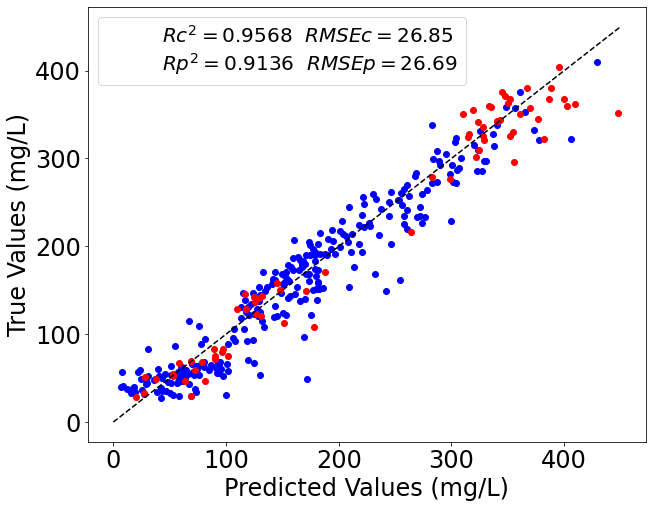

In [71]:
import matplotlib.pyplot as plt
import numpy as np

model.eval()  
with torch.no_grad():
    predictions_cal = model(cal_features_tensor)

with torch.no_grad():
    predictions_test = model(test_features_tensor)

predictions_np_cal = predictions_cal.detach().numpy().flatten()
true_values_np_cal = cal_lables_tensor.detach().numpy().flatten()

predictions_np_test = predictions_test.detach().numpy().flatten()
true_values_np_test = test_lables_tensor.detach().numpy().flatten()

y_true_mean_cal = np.mean(true_values_np_cal)
r2_cal = 1 - (np.sum((true_values_np_cal - predictions_np_cal) ** 2) / np.sum((true_values_np_cal - y_true_mean_cal) ** 2))


rmse_cal = np.sqrt(np.mean((true_values_np_cal - predictions_np_cal) ** 2))


y_true_mean_test = np.mean(true_values_np_test)
r2_test = 1 - (np.sum((true_values_np_test - predictions_np_test) ** 2) / np.sum((true_values_np_test - y_true_mean_test) ** 2))


rmse_test = np.sqrt(np.mean((true_values_np_test - predictions_np_test) ** 2))



plt.figure(figsize=(10, 8))
plt.scatter(predictions_np_cal, true_values_np_cal, color='blue')
plt.scatter(predictions_np_test, true_values_np_test, color='red')


plt.plot([0, 450], [0, 450], 'k--')


plt.xlabel('Predicted Values (mg/L)',fontsize=24)
plt.ylabel('True Values (mg/L)',fontsize=24)
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$Rc^2={:.4f}$' + '  ' + r'$RMSEc={:.2f}$'+ '\n' + r'$Rp^2={:.4f}$'+ '  ' + r'$ RMSEp={:.2f}$').format(r2_test,rmse_test,r2_cal,rmse_cal)], 
           loc='upper left',fontsize=20)
plt.savefig('1DCNN-minmax.svg')

plt.show()

In [72]:
import matplotlib.pyplot as plt

# 绘制训练损失曲线
plt.figure(figsize=(10, 8))
plt.plot(test_history, label='Calibration Loss',color='blue')
plt.plot(cal_history, label='Prediction Loss',color='red')
#plt.title('Training Loss over Epochs')
plt.xlabel('Epochs',fontsize=24)
plt.ylabel('MSE Loss',fontsize=24)
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)
plt.legend(fontsize=20)
plt.savefig('1DCNN-raw-trainloss.svg')
plt.show()

NameError: name 'test_history' is not defined

<Figure size 720x576 with 0 Axes>

In [36]:
torch.save(model.state_dict(), 'model_1DCNN.pth')

#model.load_state_dict(torch.load('model_1DCNN.pth'))

<All keys matched successfully>

## 2.Z-score

In [83]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

class OneDimensionalCNN(nn.Module):
    def __init__(self):
        super(OneDimensionalCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=3, stride=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1)
        self.bn2 = nn.BatchNorm1d(256)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2, 128)  
        self.drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 1)  

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        return x


model = OneDimensionalCNN()


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

data = pd.read_excel('data5.xlsx')
features = data.iloc[:,:14]
lables = data.iloc[:,14]

from sklearn.model_selection import train_test_split
x_train,x_test,y_trin,y_test=train_test_split(features,lables,random_state=2024)

x_train = features
x_test = features

y_train = lables
y_test = lables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

x_train = x_train.reshape(-1, 1, 14)

y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

history = []
start_time = time.time()  

num_epochs = 20000
for epoch in range(num_epochs):
    
    model.train()
    optimizer.zero_grad()
    
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    
    
    outputs = model(x_train_tensor)
    
    
    loss = criterion(outputs, y_train)  
    
    loss.backward()
    optimizer.step()

    
    history.append(loss.item())
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

end_time = time.time()  
total_training_time = end_time - start_time  
print(f'Total training time: {total_training_time:.2f} seconds')

Epoch 1/20000, Loss: 38946.8046875
Epoch 2/20000, Loss: 38289.0625
Epoch 3/20000, Loss: 37644.3125
Epoch 4/20000, Loss: 36985.69921875
Epoch 5/20000, Loss: 36318.69140625
Epoch 6/20000, Loss: 35598.50390625
Epoch 7/20000, Loss: 34917.3203125
Epoch 8/20000, Loss: 34133.8984375
Epoch 9/20000, Loss: 33322.2109375
Epoch 10/20000, Loss: 32484.9140625
Epoch 11/20000, Loss: 31603.525390625
Epoch 12/20000, Loss: 30698.0078125
Epoch 13/20000, Loss: 29787.056640625
Epoch 14/20000, Loss: 28750.56640625
Epoch 15/20000, Loss: 27833.044921875
Epoch 16/20000, Loss: 26727.576171875
Epoch 17/20000, Loss: 25743.123046875
Epoch 18/20000, Loss: 24662.51171875
Epoch 19/20000, Loss: 23612.427734375
Epoch 20/20000, Loss: 22463.412109375
Epoch 21/20000, Loss: 21380.080078125
Epoch 22/20000, Loss: 20262.31640625
Epoch 23/20000, Loss: 19243.412109375
Epoch 24/20000, Loss: 18119.68359375
Epoch 25/20000, Loss: 17174.294921875
Epoch 26/20000, Loss: 16052.6357421875
Epoch 27/20000, Loss: 15012.259765625
Epoch 28/20

Epoch 217/20000, Loss: 3778.43994140625
Epoch 218/20000, Loss: 3835.380615234375
Epoch 219/20000, Loss: 3862.726806640625
Epoch 220/20000, Loss: 4020.281494140625
Epoch 221/20000, Loss: 4075.957763671875
Epoch 222/20000, Loss: 3939.318603515625
Epoch 223/20000, Loss: 3825.76220703125
Epoch 224/20000, Loss: 3820.029296875
Epoch 225/20000, Loss: 3855.8427734375
Epoch 226/20000, Loss: 3785.023681640625
Epoch 227/20000, Loss: 3825.116455078125
Epoch 228/20000, Loss: 4014.56494140625
Epoch 229/20000, Loss: 3861.79296875
Epoch 230/20000, Loss: 4126.13134765625
Epoch 231/20000, Loss: 3860.646484375
Epoch 232/20000, Loss: 3764.33935546875
Epoch 233/20000, Loss: 3829.83544921875
Epoch 234/20000, Loss: 3833.787841796875
Epoch 235/20000, Loss: 3998.97705078125
Epoch 236/20000, Loss: 3844.468994140625
Epoch 237/20000, Loss: 3763.128662109375
Epoch 238/20000, Loss: 3744.2822265625
Epoch 239/20000, Loss: 3792.4228515625
Epoch 240/20000, Loss: 3840.878662109375
Epoch 241/20000, Loss: 3821.88403320312

Epoch 427/20000, Loss: 2487.961181640625
Epoch 428/20000, Loss: 2534.419921875
Epoch 429/20000, Loss: 2472.9482421875
Epoch 430/20000, Loss: 2502.747802734375
Epoch 431/20000, Loss: 2381.9619140625
Epoch 432/20000, Loss: 2401.80419921875
Epoch 433/20000, Loss: 2512.34814453125
Epoch 434/20000, Loss: 2561.20068359375
Epoch 435/20000, Loss: 2616.58544921875
Epoch 436/20000, Loss: 2475.11279296875
Epoch 437/20000, Loss: 2349.216796875
Epoch 438/20000, Loss: 2464.07958984375
Epoch 439/20000, Loss: 2431.88134765625
Epoch 440/20000, Loss: 2424.1611328125
Epoch 441/20000, Loss: 2516.93408203125
Epoch 442/20000, Loss: 2358.014404296875
Epoch 443/20000, Loss: 2331.95703125
Epoch 444/20000, Loss: 2333.48095703125
Epoch 445/20000, Loss: 2410.947998046875
Epoch 446/20000, Loss: 2381.7470703125
Epoch 447/20000, Loss: 2383.056640625
Epoch 448/20000, Loss: 2293.247314453125
Epoch 449/20000, Loss: 2373.7578125
Epoch 450/20000, Loss: 2336.388916015625
Epoch 451/20000, Loss: 2231.785888671875
Epoch 452/

Epoch 633/20000, Loss: 1570.7119140625
Epoch 634/20000, Loss: 1709.1021728515625
Epoch 635/20000, Loss: 2262.52001953125
Epoch 636/20000, Loss: 1947.1319580078125
Epoch 637/20000, Loss: 1647.078369140625
Epoch 638/20000, Loss: 1700.89013671875
Epoch 639/20000, Loss: 1734.1959228515625
Epoch 640/20000, Loss: 1658.6824951171875
Epoch 641/20000, Loss: 1585.47802734375
Epoch 642/20000, Loss: 1651.0662841796875
Epoch 643/20000, Loss: 1622.603271484375
Epoch 644/20000, Loss: 1479.4091796875
Epoch 645/20000, Loss: 1587.0211181640625
Epoch 646/20000, Loss: 1636.0782470703125
Epoch 647/20000, Loss: 1556.2261962890625
Epoch 648/20000, Loss: 1474.3326416015625
Epoch 649/20000, Loss: 1419.8074951171875
Epoch 650/20000, Loss: 1550.956787109375
Epoch 651/20000, Loss: 1737.9835205078125
Epoch 652/20000, Loss: 1534.5111083984375
Epoch 653/20000, Loss: 1573.5054931640625
Epoch 654/20000, Loss: 1602.0968017578125
Epoch 655/20000, Loss: 1508.6947021484375
Epoch 656/20000, Loss: 1586.708740234375
Epoch 65

Epoch 834/20000, Loss: 1120.885498046875
Epoch 835/20000, Loss: 1255.2283935546875
Epoch 836/20000, Loss: 1080.282470703125
Epoch 837/20000, Loss: 1092.671630859375
Epoch 838/20000, Loss: 1038.28173828125
Epoch 839/20000, Loss: 1064.49951171875
Epoch 840/20000, Loss: 966.4102783203125
Epoch 841/20000, Loss: 1026.927734375
Epoch 842/20000, Loss: 963.4447021484375
Epoch 843/20000, Loss: 1020.77294921875
Epoch 844/20000, Loss: 1029.565673828125
Epoch 845/20000, Loss: 1050.51220703125
Epoch 846/20000, Loss: 956.5631103515625
Epoch 847/20000, Loss: 1007.6875
Epoch 848/20000, Loss: 1120.13818359375
Epoch 849/20000, Loss: 1076.9423828125
Epoch 850/20000, Loss: 1147.23681640625
Epoch 851/20000, Loss: 1193.1829833984375
Epoch 852/20000, Loss: 971.21142578125
Epoch 853/20000, Loss: 924.8585815429688
Epoch 854/20000, Loss: 988.435546875
Epoch 855/20000, Loss: 1118.306396484375
Epoch 856/20000, Loss: 1092.018798828125
Epoch 857/20000, Loss: 984.7103271484375
Epoch 858/20000, Loss: 848.492797851562

Epoch 1036/20000, Loss: 781.734130859375
Epoch 1037/20000, Loss: 902.565185546875
Epoch 1038/20000, Loss: 693.9031372070312
Epoch 1039/20000, Loss: 789.1378784179688
Epoch 1040/20000, Loss: 1046.25830078125
Epoch 1041/20000, Loss: 822.39794921875
Epoch 1042/20000, Loss: 791.9171142578125
Epoch 1043/20000, Loss: 777.9417724609375
Epoch 1044/20000, Loss: 705.6475830078125
Epoch 1045/20000, Loss: 861.1060791015625
Epoch 1046/20000, Loss: 872.6188354492188
Epoch 1047/20000, Loss: 642.28857421875
Epoch 1048/20000, Loss: 865.5457153320312
Epoch 1049/20000, Loss: 965.7725830078125
Epoch 1050/20000, Loss: 851.7005615234375
Epoch 1051/20000, Loss: 697.8425903320312
Epoch 1052/20000, Loss: 746.1588134765625
Epoch 1053/20000, Loss: 791.3651733398438
Epoch 1054/20000, Loss: 695.9149780273438
Epoch 1055/20000, Loss: 692.1868896484375
Epoch 1056/20000, Loss: 742.6685180664062
Epoch 1057/20000, Loss: 669.2711791992188
Epoch 1058/20000, Loss: 673.8065795898438
Epoch 1059/20000, Loss: 627.4293823242188

Epoch 1236/20000, Loss: 833.576904296875
Epoch 1237/20000, Loss: 583.7921142578125
Epoch 1238/20000, Loss: 585.2319946289062
Epoch 1239/20000, Loss: 760.9363403320312
Epoch 1240/20000, Loss: 597.0552368164062
Epoch 1241/20000, Loss: 603.0830688476562
Epoch 1242/20000, Loss: 637.94189453125
Epoch 1243/20000, Loss: 546.4951171875
Epoch 1244/20000, Loss: 618.69091796875
Epoch 1245/20000, Loss: 594.1575317382812
Epoch 1246/20000, Loss: 527.9866333007812
Epoch 1247/20000, Loss: 557.651611328125
Epoch 1248/20000, Loss: 636.0582885742188
Epoch 1249/20000, Loss: 585.9576416015625
Epoch 1250/20000, Loss: 460.1363830566406
Epoch 1251/20000, Loss: 608.092529296875
Epoch 1252/20000, Loss: 759.593505859375
Epoch 1253/20000, Loss: 741.8109741210938
Epoch 1254/20000, Loss: 1068.15478515625
Epoch 1255/20000, Loss: 800.9768676757812
Epoch 1256/20000, Loss: 663.5327758789062
Epoch 1257/20000, Loss: 562.4525146484375
Epoch 1258/20000, Loss: 831.9322509765625
Epoch 1259/20000, Loss: 590.2308959960938
Epoc

Epoch 1436/20000, Loss: 430.3758544921875
Epoch 1437/20000, Loss: 413.642822265625
Epoch 1438/20000, Loss: 381.79583740234375
Epoch 1439/20000, Loss: 406.74652099609375
Epoch 1440/20000, Loss: 450.8276672363281
Epoch 1441/20000, Loss: 372.2926025390625
Epoch 1442/20000, Loss: 416.62054443359375
Epoch 1443/20000, Loss: 423.63800048828125
Epoch 1444/20000, Loss: 493.0482482910156
Epoch 1445/20000, Loss: 485.9525451660156
Epoch 1446/20000, Loss: 633.5516357421875
Epoch 1447/20000, Loss: 914.7969360351562
Epoch 1448/20000, Loss: 593.6438598632812
Epoch 1449/20000, Loss: 371.9869689941406
Epoch 1450/20000, Loss: 457.80401611328125
Epoch 1451/20000, Loss: 548.2625732421875
Epoch 1452/20000, Loss: 399.88311767578125
Epoch 1453/20000, Loss: 401.7021789550781
Epoch 1454/20000, Loss: 565.756103515625
Epoch 1455/20000, Loss: 447.77374267578125
Epoch 1456/20000, Loss: 407.9344177246094
Epoch 1457/20000, Loss: 398.89678955078125
Epoch 1458/20000, Loss: 435.2039794921875
Epoch 1459/20000, Loss: 353.

Epoch 1635/20000, Loss: 348.6803894042969
Epoch 1636/20000, Loss: 349.9614562988281
Epoch 1637/20000, Loss: 359.215087890625
Epoch 1638/20000, Loss: 406.6663513183594
Epoch 1639/20000, Loss: 403.7610778808594
Epoch 1640/20000, Loss: 468.418212890625
Epoch 1641/20000, Loss: 351.30938720703125
Epoch 1642/20000, Loss: 402.9397888183594
Epoch 1643/20000, Loss: 393.2180480957031
Epoch 1644/20000, Loss: 354.2909851074219
Epoch 1645/20000, Loss: 410.754638671875
Epoch 1646/20000, Loss: 376.46038818359375
Epoch 1647/20000, Loss: 314.3309020996094
Epoch 1648/20000, Loss: 490.6047668457031
Epoch 1649/20000, Loss: 498.3282165527344
Epoch 1650/20000, Loss: 493.6528625488281
Epoch 1651/20000, Loss: 554.1107788085938
Epoch 1652/20000, Loss: 515.2545166015625
Epoch 1653/20000, Loss: 342.99530029296875
Epoch 1654/20000, Loss: 427.0158996582031
Epoch 1655/20000, Loss: 497.28924560546875
Epoch 1656/20000, Loss: 568.758056640625
Epoch 1657/20000, Loss: 485.08514404296875
Epoch 1658/20000, Loss: 470.76773

Epoch 1832/20000, Loss: 301.13995361328125
Epoch 1833/20000, Loss: 302.8143005371094
Epoch 1834/20000, Loss: 349.86285400390625
Epoch 1835/20000, Loss: 307.4315490722656
Epoch 1836/20000, Loss: 304.400390625
Epoch 1837/20000, Loss: 301.2550354003906
Epoch 1838/20000, Loss: 275.7269287109375
Epoch 1839/20000, Loss: 258.7160949707031
Epoch 1840/20000, Loss: 278.2236022949219
Epoch 1841/20000, Loss: 264.3083801269531
Epoch 1842/20000, Loss: 308.2519836425781
Epoch 1843/20000, Loss: 276.0016784667969
Epoch 1844/20000, Loss: 362.0837707519531
Epoch 1845/20000, Loss: 419.2524108886719
Epoch 1846/20000, Loss: 478.0174865722656
Epoch 1847/20000, Loss: 476.8161926269531
Epoch 1848/20000, Loss: 591.5659790039062
Epoch 1849/20000, Loss: 649.9500732421875
Epoch 1850/20000, Loss: 393.7228698730469
Epoch 1851/20000, Loss: 389.6322326660156
Epoch 1852/20000, Loss: 634.272705078125
Epoch 1853/20000, Loss: 519.6860961914062
Epoch 1854/20000, Loss: 295.44268798828125
Epoch 1855/20000, Loss: 409.87518310

Epoch 2029/20000, Loss: 314.82421875
Epoch 2030/20000, Loss: 298.5272216796875
Epoch 2031/20000, Loss: 292.27178955078125
Epoch 2032/20000, Loss: 291.4703674316406
Epoch 2033/20000, Loss: 358.5606689453125
Epoch 2034/20000, Loss: 401.8994140625
Epoch 2035/20000, Loss: 432.3250427246094
Epoch 2036/20000, Loss: 392.4470520019531
Epoch 2037/20000, Loss: 273.8679504394531
Epoch 2038/20000, Loss: 258.706298828125
Epoch 2039/20000, Loss: 351.3404846191406
Epoch 2040/20000, Loss: 374.9410400390625
Epoch 2041/20000, Loss: 306.0257263183594
Epoch 2042/20000, Loss: 264.76666259765625
Epoch 2043/20000, Loss: 356.38751220703125
Epoch 2044/20000, Loss: 468.6470031738281
Epoch 2045/20000, Loss: 525.7959594726562
Epoch 2046/20000, Loss: 387.94482421875
Epoch 2047/20000, Loss: 323.1418762207031
Epoch 2048/20000, Loss: 402.894287109375
Epoch 2049/20000, Loss: 459.20855712890625
Epoch 2050/20000, Loss: 286.9644470214844
Epoch 2051/20000, Loss: 307.9513244628906
Epoch 2052/20000, Loss: 407.94287109375
Ep

Epoch 2228/20000, Loss: 337.9696960449219
Epoch 2229/20000, Loss: 255.8284149169922
Epoch 2230/20000, Loss: 311.15557861328125
Epoch 2231/20000, Loss: 273.5318298339844
Epoch 2232/20000, Loss: 272.51422119140625
Epoch 2233/20000, Loss: 281.45928955078125
Epoch 2234/20000, Loss: 255.78993225097656
Epoch 2235/20000, Loss: 237.18307495117188
Epoch 2236/20000, Loss: 297.4149475097656
Epoch 2237/20000, Loss: 265.7571716308594
Epoch 2238/20000, Loss: 220.86521911621094
Epoch 2239/20000, Loss: 234.80300903320312
Epoch 2240/20000, Loss: 266.10833740234375
Epoch 2241/20000, Loss: 284.5717468261719
Epoch 2242/20000, Loss: 247.78472900390625
Epoch 2243/20000, Loss: 287.25054931640625
Epoch 2244/20000, Loss: 297.8995666503906
Epoch 2245/20000, Loss: 268.1251220703125
Epoch 2246/20000, Loss: 282.8817443847656
Epoch 2247/20000, Loss: 327.81378173828125
Epoch 2248/20000, Loss: 279.8211975097656
Epoch 2249/20000, Loss: 278.09124755859375
Epoch 2250/20000, Loss: 245.71923828125
Epoch 2251/20000, Loss: 

Epoch 2427/20000, Loss: 302.8725891113281
Epoch 2428/20000, Loss: 380.0877990722656
Epoch 2429/20000, Loss: 295.8467102050781
Epoch 2430/20000, Loss: 309.7208557128906
Epoch 2431/20000, Loss: 412.0702209472656
Epoch 2432/20000, Loss: 359.33428955078125
Epoch 2433/20000, Loss: 304.0315246582031
Epoch 2434/20000, Loss: 263.515869140625
Epoch 2435/20000, Loss: 321.5765075683594
Epoch 2436/20000, Loss: 322.728271484375
Epoch 2437/20000, Loss: 291.2458801269531
Epoch 2438/20000, Loss: 253.63522338867188
Epoch 2439/20000, Loss: 260.099853515625
Epoch 2440/20000, Loss: 213.34423828125
Epoch 2441/20000, Loss: 358.09429931640625
Epoch 2442/20000, Loss: 430.6690979003906
Epoch 2443/20000, Loss: 304.36175537109375
Epoch 2444/20000, Loss: 239.2996826171875
Epoch 2445/20000, Loss: 290.00653076171875
Epoch 2446/20000, Loss: 285.0716857910156
Epoch 2447/20000, Loss: 336.955322265625
Epoch 2448/20000, Loss: 367.02587890625
Epoch 2449/20000, Loss: 244.06472778320312
Epoch 2450/20000, Loss: 305.66601562

Epoch 2628/20000, Loss: 218.90493774414062
Epoch 2629/20000, Loss: 356.6776428222656
Epoch 2630/20000, Loss: 466.0101318359375
Epoch 2631/20000, Loss: 297.4086608886719
Epoch 2632/20000, Loss: 338.9022216796875
Epoch 2633/20000, Loss: 334.4559631347656
Epoch 2634/20000, Loss: 255.87022399902344
Epoch 2635/20000, Loss: 389.66192626953125
Epoch 2636/20000, Loss: 406.309326171875
Epoch 2637/20000, Loss: 304.7486267089844
Epoch 2638/20000, Loss: 276.37353515625
Epoch 2639/20000, Loss: 298.0845642089844
Epoch 2640/20000, Loss: 273.0223388671875
Epoch 2641/20000, Loss: 279.69781494140625
Epoch 2642/20000, Loss: 280.005126953125
Epoch 2643/20000, Loss: 267.5533752441406
Epoch 2644/20000, Loss: 346.3190002441406
Epoch 2645/20000, Loss: 327.8109130859375
Epoch 2646/20000, Loss: 255.85781860351562
Epoch 2647/20000, Loss: 297.92950439453125
Epoch 2648/20000, Loss: 293.279296875
Epoch 2649/20000, Loss: 266.64178466796875
Epoch 2650/20000, Loss: 277.667236328125
Epoch 2651/20000, Loss: 247.82489013

Epoch 2825/20000, Loss: 277.3258972167969
Epoch 2826/20000, Loss: 256.65704345703125
Epoch 2827/20000, Loss: 325.3409423828125
Epoch 2828/20000, Loss: 277.5823669433594
Epoch 2829/20000, Loss: 325.0933837890625
Epoch 2830/20000, Loss: 301.3007507324219
Epoch 2831/20000, Loss: 270.9410705566406
Epoch 2832/20000, Loss: 216.64906311035156
Epoch 2833/20000, Loss: 297.3612365722656
Epoch 2834/20000, Loss: 247.02540588378906
Epoch 2835/20000, Loss: 256.14068603515625
Epoch 2836/20000, Loss: 247.9046630859375
Epoch 2837/20000, Loss: 254.8386993408203
Epoch 2838/20000, Loss: 254.004638671875
Epoch 2839/20000, Loss: 222.87094116210938
Epoch 2840/20000, Loss: 220.12026977539062
Epoch 2841/20000, Loss: 265.7387390136719
Epoch 2842/20000, Loss: 234.60128784179688
Epoch 2843/20000, Loss: 258.13037109375
Epoch 2844/20000, Loss: 233.67210388183594
Epoch 2845/20000, Loss: 248.53538513183594
Epoch 2846/20000, Loss: 227.50636291503906
Epoch 2847/20000, Loss: 245.57937622070312
Epoch 2848/20000, Loss: 28

Epoch 3021/20000, Loss: 263.569580078125
Epoch 3022/20000, Loss: 285.44171142578125
Epoch 3023/20000, Loss: 273.9136962890625
Epoch 3024/20000, Loss: 285.21844482421875
Epoch 3025/20000, Loss: 244.55531311035156
Epoch 3026/20000, Loss: 201.3102264404297
Epoch 3027/20000, Loss: 359.74273681640625
Epoch 3028/20000, Loss: 335.941162109375
Epoch 3029/20000, Loss: 232.0464324951172
Epoch 3030/20000, Loss: 254.5312042236328
Epoch 3031/20000, Loss: 275.1826171875
Epoch 3032/20000, Loss: 218.90548706054688
Epoch 3033/20000, Loss: 270.6257019042969
Epoch 3034/20000, Loss: 259.8395690917969
Epoch 3035/20000, Loss: 240.21058654785156
Epoch 3036/20000, Loss: 256.6461181640625
Epoch 3037/20000, Loss: 233.61660766601562
Epoch 3038/20000, Loss: 223.12277221679688
Epoch 3039/20000, Loss: 235.74740600585938
Epoch 3040/20000, Loss: 251.70518493652344
Epoch 3041/20000, Loss: 251.36575317382812
Epoch 3042/20000, Loss: 265.3076477050781
Epoch 3043/20000, Loss: 305.3579406738281
Epoch 3044/20000, Loss: 291.

Epoch 3219/20000, Loss: 255.0485076904297
Epoch 3220/20000, Loss: 245.85055541992188
Epoch 3221/20000, Loss: 237.4114227294922
Epoch 3222/20000, Loss: 226.9188690185547
Epoch 3223/20000, Loss: 301.41082763671875
Epoch 3224/20000, Loss: 336.6268310546875
Epoch 3225/20000, Loss: 191.05026245117188
Epoch 3226/20000, Loss: 228.6670379638672
Epoch 3227/20000, Loss: 258.2801513671875
Epoch 3228/20000, Loss: 215.6320037841797
Epoch 3229/20000, Loss: 251.61375427246094
Epoch 3230/20000, Loss: 237.8677215576172
Epoch 3231/20000, Loss: 218.47434997558594
Epoch 3232/20000, Loss: 276.2142028808594
Epoch 3233/20000, Loss: 332.7389221191406
Epoch 3234/20000, Loss: 258.07513427734375
Epoch 3235/20000, Loss: 223.65345764160156
Epoch 3236/20000, Loss: 243.00271606445312
Epoch 3237/20000, Loss: 232.74835205078125
Epoch 3238/20000, Loss: 263.1886291503906
Epoch 3239/20000, Loss: 225.44541931152344
Epoch 3240/20000, Loss: 259.6856384277344
Epoch 3241/20000, Loss: 262.92120361328125
Epoch 3242/20000, Loss:

Epoch 3418/20000, Loss: 231.7603302001953
Epoch 3419/20000, Loss: 318.6724548339844
Epoch 3420/20000, Loss: 334.4805603027344
Epoch 3421/20000, Loss: 259.6170349121094
Epoch 3422/20000, Loss: 186.96278381347656
Epoch 3423/20000, Loss: 236.32635498046875
Epoch 3424/20000, Loss: 196.9320526123047
Epoch 3425/20000, Loss: 233.83511352539062
Epoch 3426/20000, Loss: 182.90602111816406
Epoch 3427/20000, Loss: 211.87298583984375
Epoch 3428/20000, Loss: 262.59014892578125
Epoch 3429/20000, Loss: 290.71612548828125
Epoch 3430/20000, Loss: 323.0511474609375
Epoch 3431/20000, Loss: 269.05206298828125
Epoch 3432/20000, Loss: 210.8388671875
Epoch 3433/20000, Loss: 251.22579956054688
Epoch 3434/20000, Loss: 226.1553497314453
Epoch 3435/20000, Loss: 229.49087524414062
Epoch 3436/20000, Loss: 288.1723327636719
Epoch 3437/20000, Loss: 254.34197998046875
Epoch 3438/20000, Loss: 232.41470336914062
Epoch 3439/20000, Loss: 289.9700622558594
Epoch 3440/20000, Loss: 238.63743591308594
Epoch 3441/20000, Loss: 

Epoch 3617/20000, Loss: 278.2234802246094
Epoch 3618/20000, Loss: 206.65866088867188
Epoch 3619/20000, Loss: 201.55825805664062
Epoch 3620/20000, Loss: 227.28919982910156
Epoch 3621/20000, Loss: 288.0212707519531
Epoch 3622/20000, Loss: 291.2063293457031
Epoch 3623/20000, Loss: 209.2389678955078
Epoch 3624/20000, Loss: 298.2555847167969
Epoch 3625/20000, Loss: 277.4476013183594
Epoch 3626/20000, Loss: 239.5555419921875
Epoch 3627/20000, Loss: 242.93856811523438
Epoch 3628/20000, Loss: 235.80516052246094
Epoch 3629/20000, Loss: 336.7585144042969
Epoch 3630/20000, Loss: 202.7764129638672
Epoch 3631/20000, Loss: 345.2325744628906
Epoch 3632/20000, Loss: 266.53680419921875
Epoch 3633/20000, Loss: 276.28009033203125
Epoch 3634/20000, Loss: 237.98272705078125
Epoch 3635/20000, Loss: 270.39117431640625
Epoch 3636/20000, Loss: 230.62254333496094
Epoch 3637/20000, Loss: 393.4987487792969
Epoch 3638/20000, Loss: 234.43003845214844
Epoch 3639/20000, Loss: 251.07423400878906
Epoch 3640/20000, Loss

Epoch 3814/20000, Loss: 245.6035919189453
Epoch 3815/20000, Loss: 193.86990356445312
Epoch 3816/20000, Loss: 269.7899475097656
Epoch 3817/20000, Loss: 226.6179656982422
Epoch 3818/20000, Loss: 233.17152404785156
Epoch 3819/20000, Loss: 232.80142211914062
Epoch 3820/20000, Loss: 259.2333068847656
Epoch 3821/20000, Loss: 295.0913391113281
Epoch 3822/20000, Loss: 223.92413330078125
Epoch 3823/20000, Loss: 296.4275207519531
Epoch 3824/20000, Loss: 276.74786376953125
Epoch 3825/20000, Loss: 190.4326171875
Epoch 3826/20000, Loss: 396.89898681640625
Epoch 3827/20000, Loss: 418.53192138671875
Epoch 3828/20000, Loss: 286.9523010253906
Epoch 3829/20000, Loss: 330.1042785644531
Epoch 3830/20000, Loss: 371.5428466796875
Epoch 3831/20000, Loss: 197.7903594970703
Epoch 3832/20000, Loss: 276.57916259765625
Epoch 3833/20000, Loss: 278.7001037597656
Epoch 3834/20000, Loss: 235.9567413330078
Epoch 3835/20000, Loss: 227.91372680664062
Epoch 3836/20000, Loss: 260.87457275390625
Epoch 3837/20000, Loss: 276

Epoch 4010/20000, Loss: 201.08203125
Epoch 4011/20000, Loss: 212.1693115234375
Epoch 4012/20000, Loss: 210.73947143554688
Epoch 4013/20000, Loss: 209.488037109375
Epoch 4014/20000, Loss: 194.6908416748047
Epoch 4015/20000, Loss: 210.6876983642578
Epoch 4016/20000, Loss: 177.17822265625
Epoch 4017/20000, Loss: 213.83676147460938
Epoch 4018/20000, Loss: 154.92477416992188
Epoch 4019/20000, Loss: 219.76768493652344
Epoch 4020/20000, Loss: 229.95057678222656
Epoch 4021/20000, Loss: 268.7715759277344
Epoch 4022/20000, Loss: 254.01052856445312
Epoch 4023/20000, Loss: 214.53517150878906
Epoch 4024/20000, Loss: 225.3095245361328
Epoch 4025/20000, Loss: 230.00303649902344
Epoch 4026/20000, Loss: 212.79515075683594
Epoch 4027/20000, Loss: 228.8577880859375
Epoch 4028/20000, Loss: 262.6556701660156
Epoch 4029/20000, Loss: 215.13719177246094
Epoch 4030/20000, Loss: 182.0194854736328
Epoch 4031/20000, Loss: 195.2474365234375
Epoch 4032/20000, Loss: 224.69737243652344
Epoch 4033/20000, Loss: 207.581

Epoch 4207/20000, Loss: 230.00946044921875
Epoch 4208/20000, Loss: 179.12672424316406
Epoch 4209/20000, Loss: 208.1747283935547
Epoch 4210/20000, Loss: 232.63914489746094
Epoch 4211/20000, Loss: 192.0220489501953
Epoch 4212/20000, Loss: 227.8302001953125
Epoch 4213/20000, Loss: 201.7407989501953
Epoch 4214/20000, Loss: 222.19598388671875
Epoch 4215/20000, Loss: 220.9393768310547
Epoch 4216/20000, Loss: 205.63446044921875
Epoch 4217/20000, Loss: 203.90176391601562
Epoch 4218/20000, Loss: 219.54859924316406
Epoch 4219/20000, Loss: 194.6598663330078
Epoch 4220/20000, Loss: 177.55076599121094
Epoch 4221/20000, Loss: 179.4112548828125
Epoch 4222/20000, Loss: 225.5670928955078
Epoch 4223/20000, Loss: 183.22608947753906
Epoch 4224/20000, Loss: 196.38174438476562
Epoch 4225/20000, Loss: 237.01373291015625
Epoch 4226/20000, Loss: 258.42999267578125
Epoch 4227/20000, Loss: 237.40382385253906
Epoch 4228/20000, Loss: 211.15826416015625
Epoch 4229/20000, Loss: 183.47731018066406
Epoch 4230/20000, L

Epoch 4406/20000, Loss: 250.68035888671875
Epoch 4407/20000, Loss: 236.96104431152344
Epoch 4408/20000, Loss: 189.8726806640625
Epoch 4409/20000, Loss: 245.2086181640625
Epoch 4410/20000, Loss: 163.80715942382812
Epoch 4411/20000, Loss: 177.9239959716797
Epoch 4412/20000, Loss: 176.34170532226562
Epoch 4413/20000, Loss: 207.81593322753906
Epoch 4414/20000, Loss: 206.79415893554688
Epoch 4415/20000, Loss: 206.59774780273438
Epoch 4416/20000, Loss: 182.74012756347656
Epoch 4417/20000, Loss: 216.52493286132812
Epoch 4418/20000, Loss: 175.16685485839844
Epoch 4419/20000, Loss: 225.40673828125
Epoch 4420/20000, Loss: 187.60208129882812
Epoch 4421/20000, Loss: 218.535888671875
Epoch 4422/20000, Loss: 261.3704833984375
Epoch 4423/20000, Loss: 276.1112365722656
Epoch 4424/20000, Loss: 205.38812255859375
Epoch 4425/20000, Loss: 228.46307373046875
Epoch 4426/20000, Loss: 287.45556640625
Epoch 4427/20000, Loss: 302.1571960449219
Epoch 4428/20000, Loss: 198.4398193359375
Epoch 4429/20000, Loss: 20

Epoch 4600/20000, Loss: 239.84524536132812
Epoch 4601/20000, Loss: 186.0570831298828
Epoch 4602/20000, Loss: 182.3319854736328
Epoch 4603/20000, Loss: 182.0696258544922
Epoch 4604/20000, Loss: 204.58737182617188
Epoch 4605/20000, Loss: 223.03326416015625
Epoch 4606/20000, Loss: 183.2905731201172
Epoch 4607/20000, Loss: 231.64524841308594
Epoch 4608/20000, Loss: 331.0487365722656
Epoch 4609/20000, Loss: 296.4656066894531
Epoch 4610/20000, Loss: 198.1497802734375
Epoch 4611/20000, Loss: 213.6814727783203
Epoch 4612/20000, Loss: 282.0978698730469
Epoch 4613/20000, Loss: 204.79763793945312
Epoch 4614/20000, Loss: 209.9064483642578
Epoch 4615/20000, Loss: 244.40200805664062
Epoch 4616/20000, Loss: 246.52212524414062
Epoch 4617/20000, Loss: 285.66021728515625
Epoch 4618/20000, Loss: 197.08529663085938
Epoch 4619/20000, Loss: 258.89031982421875
Epoch 4620/20000, Loss: 302.22540283203125
Epoch 4621/20000, Loss: 272.3701477050781
Epoch 4622/20000, Loss: 223.62620544433594
Epoch 4623/20000, Loss

Epoch 4797/20000, Loss: 288.1841735839844
Epoch 4798/20000, Loss: 177.34231567382812
Epoch 4799/20000, Loss: 205.48110961914062
Epoch 4800/20000, Loss: 231.6114501953125
Epoch 4801/20000, Loss: 224.32078552246094
Epoch 4802/20000, Loss: 199.7484893798828
Epoch 4803/20000, Loss: 258.8954162597656
Epoch 4804/20000, Loss: 206.6566925048828
Epoch 4805/20000, Loss: 216.49049377441406
Epoch 4806/20000, Loss: 210.9749755859375
Epoch 4807/20000, Loss: 273.3263244628906
Epoch 4808/20000, Loss: 277.0128173828125
Epoch 4809/20000, Loss: 258.5392150878906
Epoch 4810/20000, Loss: 169.03421020507812
Epoch 4811/20000, Loss: 174.67840576171875
Epoch 4812/20000, Loss: 215.37156677246094
Epoch 4813/20000, Loss: 194.55470275878906
Epoch 4814/20000, Loss: 167.1074981689453
Epoch 4815/20000, Loss: 168.67422485351562
Epoch 4816/20000, Loss: 198.41159057617188
Epoch 4817/20000, Loss: 211.768310546875
Epoch 4818/20000, Loss: 203.4870147705078
Epoch 4819/20000, Loss: 210.18898010253906
Epoch 4820/20000, Loss: 

Epoch 4992/20000, Loss: 173.8063507080078
Epoch 4993/20000, Loss: 191.4008331298828
Epoch 4994/20000, Loss: 184.6548614501953
Epoch 4995/20000, Loss: 184.84249877929688
Epoch 4996/20000, Loss: 235.42124938964844
Epoch 4997/20000, Loss: 219.4715118408203
Epoch 4998/20000, Loss: 159.45733642578125
Epoch 4999/20000, Loss: 178.56918334960938
Epoch 5000/20000, Loss: 190.5088348388672
Epoch 5001/20000, Loss: 154.97731018066406
Epoch 5002/20000, Loss: 168.62890625
Epoch 5003/20000, Loss: 159.25039672851562
Epoch 5004/20000, Loss: 185.2921600341797
Epoch 5005/20000, Loss: 186.21212768554688
Epoch 5006/20000, Loss: 171.13693237304688
Epoch 5007/20000, Loss: 225.04295349121094
Epoch 5008/20000, Loss: 223.91064453125
Epoch 5009/20000, Loss: 198.54722595214844
Epoch 5010/20000, Loss: 192.08786010742188
Epoch 5011/20000, Loss: 226.09848022460938
Epoch 5012/20000, Loss: 279.2967529296875
Epoch 5013/20000, Loss: 268.1336975097656
Epoch 5014/20000, Loss: 154.59971618652344
Epoch 5015/20000, Loss: 300.

Epoch 5190/20000, Loss: 164.40377807617188
Epoch 5191/20000, Loss: 244.5453338623047
Epoch 5192/20000, Loss: 227.70172119140625
Epoch 5193/20000, Loss: 207.3841094970703
Epoch 5194/20000, Loss: 224.7258758544922
Epoch 5195/20000, Loss: 288.3688659667969
Epoch 5196/20000, Loss: 215.67697143554688
Epoch 5197/20000, Loss: 206.2686767578125
Epoch 5198/20000, Loss: 149.96046447753906
Epoch 5199/20000, Loss: 204.44334411621094
Epoch 5200/20000, Loss: 199.62826538085938
Epoch 5201/20000, Loss: 175.78372192382812
Epoch 5202/20000, Loss: 208.12216186523438
Epoch 5203/20000, Loss: 243.74757385253906
Epoch 5204/20000, Loss: 270.331298828125
Epoch 5205/20000, Loss: 215.55889892578125
Epoch 5206/20000, Loss: 189.31564331054688
Epoch 5207/20000, Loss: 240.3203125
Epoch 5208/20000, Loss: 223.85736083984375
Epoch 5209/20000, Loss: 257.45330810546875
Epoch 5210/20000, Loss: 191.31227111816406
Epoch 5211/20000, Loss: 226.74305725097656
Epoch 5212/20000, Loss: 148.93682861328125
Epoch 5213/20000, Loss: 1

Epoch 5386/20000, Loss: 196.83584594726562
Epoch 5387/20000, Loss: 218.10296630859375
Epoch 5388/20000, Loss: 238.96754455566406
Epoch 5389/20000, Loss: 197.0216522216797
Epoch 5390/20000, Loss: 207.31838989257812
Epoch 5391/20000, Loss: 182.52447509765625
Epoch 5392/20000, Loss: 196.93609619140625
Epoch 5393/20000, Loss: 230.87672424316406
Epoch 5394/20000, Loss: 210.33035278320312
Epoch 5395/20000, Loss: 232.5234832763672
Epoch 5396/20000, Loss: 240.98477172851562
Epoch 5397/20000, Loss: 253.74232482910156
Epoch 5398/20000, Loss: 271.7788391113281
Epoch 5399/20000, Loss: 269.4694519042969
Epoch 5400/20000, Loss: 218.9053192138672
Epoch 5401/20000, Loss: 396.3976745605469
Epoch 5402/20000, Loss: 329.5740966796875
Epoch 5403/20000, Loss: 343.5469055175781
Epoch 5404/20000, Loss: 331.9035949707031
Epoch 5405/20000, Loss: 253.59925842285156
Epoch 5406/20000, Loss: 317.8835754394531
Epoch 5407/20000, Loss: 296.54364013671875
Epoch 5408/20000, Loss: 225.26036071777344
Epoch 5409/20000, Los

Epoch 5583/20000, Loss: 189.64312744140625
Epoch 5584/20000, Loss: 191.42222595214844
Epoch 5585/20000, Loss: 215.82427978515625
Epoch 5586/20000, Loss: 266.1958312988281
Epoch 5587/20000, Loss: 252.98875427246094
Epoch 5588/20000, Loss: 198.80979919433594
Epoch 5589/20000, Loss: 192.84812927246094
Epoch 5590/20000, Loss: 262.5321350097656
Epoch 5591/20000, Loss: 216.26629638671875
Epoch 5592/20000, Loss: 258.8603515625
Epoch 5593/20000, Loss: 198.6552734375
Epoch 5594/20000, Loss: 229.338623046875
Epoch 5595/20000, Loss: 158.9949951171875
Epoch 5596/20000, Loss: 211.0252227783203
Epoch 5597/20000, Loss: 231.6033935546875
Epoch 5598/20000, Loss: 260.5787353515625
Epoch 5599/20000, Loss: 200.3786163330078
Epoch 5600/20000, Loss: 197.8125
Epoch 5601/20000, Loss: 322.70843505859375
Epoch 5602/20000, Loss: 277.7746276855469
Epoch 5603/20000, Loss: 195.93292236328125
Epoch 5604/20000, Loss: 287.3522644042969
Epoch 5605/20000, Loss: 269.994873046875
Epoch 5606/20000, Loss: 186.43527221679688

Epoch 5777/20000, Loss: 301.8398742675781
Epoch 5778/20000, Loss: 215.7410430908203
Epoch 5779/20000, Loss: 224.95249938964844
Epoch 5780/20000, Loss: 288.6407775878906
Epoch 5781/20000, Loss: 242.2509002685547
Epoch 5782/20000, Loss: 168.59793090820312
Epoch 5783/20000, Loss: 233.8304443359375
Epoch 5784/20000, Loss: 254.29054260253906
Epoch 5785/20000, Loss: 179.24037170410156
Epoch 5786/20000, Loss: 202.68370056152344
Epoch 5787/20000, Loss: 228.7114715576172
Epoch 5788/20000, Loss: 218.63821411132812
Epoch 5789/20000, Loss: 211.40225219726562
Epoch 5790/20000, Loss: 213.11428833007812
Epoch 5791/20000, Loss: 194.0435028076172
Epoch 5792/20000, Loss: 188.8414764404297
Epoch 5793/20000, Loss: 275.2731018066406
Epoch 5794/20000, Loss: 166.14036560058594
Epoch 5795/20000, Loss: 232.7725830078125
Epoch 5796/20000, Loss: 230.555908203125
Epoch 5797/20000, Loss: 210.95680236816406
Epoch 5798/20000, Loss: 168.44232177734375
Epoch 5799/20000, Loss: 225.6552734375
Epoch 5800/20000, Loss: 194

Epoch 5971/20000, Loss: 201.84832763671875
Epoch 5972/20000, Loss: 218.0010528564453
Epoch 5973/20000, Loss: 143.84190368652344
Epoch 5974/20000, Loss: 199.28915405273438
Epoch 5975/20000, Loss: 198.87582397460938
Epoch 5976/20000, Loss: 214.84747314453125
Epoch 5977/20000, Loss: 196.93418884277344
Epoch 5978/20000, Loss: 200.36221313476562
Epoch 5979/20000, Loss: 257.664794921875
Epoch 5980/20000, Loss: 187.97088623046875
Epoch 5981/20000, Loss: 149.8699951171875
Epoch 5982/20000, Loss: 193.50013732910156
Epoch 5983/20000, Loss: 152.3596954345703
Epoch 5984/20000, Loss: 226.99176025390625
Epoch 5985/20000, Loss: 154.64959716796875
Epoch 5986/20000, Loss: 187.89451599121094
Epoch 5987/20000, Loss: 184.85678100585938
Epoch 5988/20000, Loss: 189.35208129882812
Epoch 5989/20000, Loss: 190.32955932617188
Epoch 5990/20000, Loss: 174.76870727539062
Epoch 5991/20000, Loss: 199.82884216308594
Epoch 5992/20000, Loss: 187.7823486328125
Epoch 5993/20000, Loss: 159.49652099609375
Epoch 5994/20000,

Epoch 6165/20000, Loss: 207.6362762451172
Epoch 6166/20000, Loss: 197.0772705078125
Epoch 6167/20000, Loss: 207.51759338378906
Epoch 6168/20000, Loss: 242.01756286621094
Epoch 6169/20000, Loss: 222.87774658203125
Epoch 6170/20000, Loss: 234.01528930664062
Epoch 6171/20000, Loss: 223.28057861328125
Epoch 6172/20000, Loss: 279.2264404296875
Epoch 6173/20000, Loss: 223.57205200195312
Epoch 6174/20000, Loss: 212.18722534179688
Epoch 6175/20000, Loss: 258.6992492675781
Epoch 6176/20000, Loss: 208.83961486816406
Epoch 6177/20000, Loss: 245.2333526611328
Epoch 6178/20000, Loss: 498.73382568359375
Epoch 6179/20000, Loss: 407.0845947265625
Epoch 6180/20000, Loss: 249.5067596435547
Epoch 6181/20000, Loss: 335.2589416503906
Epoch 6182/20000, Loss: 314.8393249511719
Epoch 6183/20000, Loss: 288.45587158203125
Epoch 6184/20000, Loss: 255.19252014160156
Epoch 6185/20000, Loss: 244.23190307617188
Epoch 6186/20000, Loss: 227.0115203857422
Epoch 6187/20000, Loss: 221.7293701171875
Epoch 6188/20000, Loss

Epoch 6553/20000, Loss: 201.83563232421875
Epoch 6554/20000, Loss: 231.11749267578125
Epoch 6555/20000, Loss: 160.44338989257812
Epoch 6556/20000, Loss: 240.5549774169922
Epoch 6557/20000, Loss: 206.7841033935547
Epoch 6558/20000, Loss: 227.4989776611328
Epoch 6559/20000, Loss: 258.88568115234375
Epoch 6560/20000, Loss: 218.56398010253906
Epoch 6561/20000, Loss: 187.79354858398438
Epoch 6562/20000, Loss: 197.57244873046875
Epoch 6563/20000, Loss: 188.32623291015625
Epoch 6564/20000, Loss: 207.4370574951172
Epoch 6565/20000, Loss: 196.6063995361328
Epoch 6566/20000, Loss: 178.11227416992188
Epoch 6567/20000, Loss: 194.63787841796875
Epoch 6568/20000, Loss: 169.47891235351562
Epoch 6569/20000, Loss: 190.89622497558594
Epoch 6570/20000, Loss: 199.54556274414062
Epoch 6571/20000, Loss: 204.6968231201172
Epoch 6572/20000, Loss: 188.97828674316406
Epoch 6573/20000, Loss: 202.1103057861328
Epoch 6574/20000, Loss: 243.8903350830078
Epoch 6575/20000, Loss: 217.6127166748047
Epoch 6576/20000, Lo

Epoch 6749/20000, Loss: 177.68809509277344
Epoch 6750/20000, Loss: 179.9412841796875
Epoch 6751/20000, Loss: 179.05691528320312
Epoch 6752/20000, Loss: 169.34786987304688
Epoch 6753/20000, Loss: 163.38369750976562
Epoch 6754/20000, Loss: 216.9287872314453
Epoch 6755/20000, Loss: 193.3092803955078
Epoch 6756/20000, Loss: 167.8419647216797
Epoch 6757/20000, Loss: 207.96295166015625
Epoch 6758/20000, Loss: 236.22348022460938
Epoch 6759/20000, Loss: 267.3175354003906
Epoch 6760/20000, Loss: 201.02835083007812
Epoch 6761/20000, Loss: 271.13690185546875
Epoch 6762/20000, Loss: 182.4130401611328
Epoch 6763/20000, Loss: 208.757568359375
Epoch 6764/20000, Loss: 203.5414581298828
Epoch 6765/20000, Loss: 267.74505615234375
Epoch 6766/20000, Loss: 204.00421142578125
Epoch 6767/20000, Loss: 213.77256774902344
Epoch 6768/20000, Loss: 209.8801727294922
Epoch 6769/20000, Loss: 202.33279418945312
Epoch 6770/20000, Loss: 248.516845703125
Epoch 6771/20000, Loss: 245.61558532714844
Epoch 6772/20000, Loss:

Epoch 6946/20000, Loss: 172.76913452148438
Epoch 6947/20000, Loss: 203.77513122558594
Epoch 6948/20000, Loss: 194.79095458984375
Epoch 6949/20000, Loss: 192.55209350585938
Epoch 6950/20000, Loss: 181.16265869140625
Epoch 6951/20000, Loss: 226.32205200195312
Epoch 6952/20000, Loss: 214.13571166992188
Epoch 6953/20000, Loss: 154.73431396484375
Epoch 6954/20000, Loss: 177.7490234375
Epoch 6955/20000, Loss: 191.5249481201172
Epoch 6956/20000, Loss: 184.4074249267578
Epoch 6957/20000, Loss: 153.66390991210938
Epoch 6958/20000, Loss: 191.5257568359375
Epoch 6959/20000, Loss: 258.4783020019531
Epoch 6960/20000, Loss: 199.50119018554688
Epoch 6961/20000, Loss: 207.44517517089844
Epoch 6962/20000, Loss: 295.0134582519531
Epoch 6963/20000, Loss: 256.9873046875
Epoch 6964/20000, Loss: 143.6605224609375
Epoch 6965/20000, Loss: 285.9855651855469
Epoch 6966/20000, Loss: 234.98760986328125
Epoch 6967/20000, Loss: 166.4486541748047
Epoch 6968/20000, Loss: 225.70626831054688
Epoch 6969/20000, Loss: 193

Epoch 7145/20000, Loss: 182.99917602539062
Epoch 7146/20000, Loss: 220.3710479736328
Epoch 7147/20000, Loss: 157.57444763183594
Epoch 7148/20000, Loss: 176.793701171875
Epoch 7149/20000, Loss: 138.16287231445312
Epoch 7150/20000, Loss: 173.74879455566406
Epoch 7151/20000, Loss: 194.2313232421875
Epoch 7152/20000, Loss: 179.7391815185547
Epoch 7153/20000, Loss: 160.59579467773438
Epoch 7154/20000, Loss: 173.96859741210938
Epoch 7155/20000, Loss: 153.24354553222656
Epoch 7156/20000, Loss: 157.05960083007812
Epoch 7157/20000, Loss: 156.87771606445312
Epoch 7158/20000, Loss: 145.5555877685547
Epoch 7159/20000, Loss: 136.7524871826172
Epoch 7160/20000, Loss: 184.32240295410156
Epoch 7161/20000, Loss: 235.41627502441406
Epoch 7162/20000, Loss: 226.7001495361328
Epoch 7163/20000, Loss: 172.18785095214844
Epoch 7164/20000, Loss: 189.43739318847656
Epoch 7165/20000, Loss: 222.0219268798828
Epoch 7166/20000, Loss: 174.13893127441406
Epoch 7167/20000, Loss: 164.875244140625
Epoch 7168/20000, Loss

Epoch 7531/20000, Loss: 222.33705139160156
Epoch 7532/20000, Loss: 245.48934936523438
Epoch 7533/20000, Loss: 159.74917602539062
Epoch 7534/20000, Loss: 199.1199493408203
Epoch 7535/20000, Loss: 149.39923095703125
Epoch 7536/20000, Loss: 164.78163146972656
Epoch 7537/20000, Loss: 192.29469299316406
Epoch 7538/20000, Loss: 166.70497131347656
Epoch 7539/20000, Loss: 168.09506225585938
Epoch 7540/20000, Loss: 148.15475463867188
Epoch 7541/20000, Loss: 158.12002563476562
Epoch 7542/20000, Loss: 161.41928100585938
Epoch 7543/20000, Loss: 169.8797607421875
Epoch 7544/20000, Loss: 174.06527709960938
Epoch 7545/20000, Loss: 197.03823852539062
Epoch 7546/20000, Loss: 171.07742309570312
Epoch 7547/20000, Loss: 181.142333984375
Epoch 7548/20000, Loss: 245.9584197998047
Epoch 7549/20000, Loss: 262.4567565917969
Epoch 7550/20000, Loss: 132.9578094482422
Epoch 7551/20000, Loss: 315.182373046875
Epoch 7552/20000, Loss: 451.3139343261719
Epoch 7553/20000, Loss: 249.5418243408203
Epoch 7554/20000, Loss

Epoch 7918/20000, Loss: 164.0578155517578
Epoch 7919/20000, Loss: 215.20120239257812
Epoch 7920/20000, Loss: 159.86265563964844
Epoch 7921/20000, Loss: 153.10037231445312
Epoch 7922/20000, Loss: 179.45579528808594
Epoch 7923/20000, Loss: 170.0352325439453
Epoch 7924/20000, Loss: 180.10731506347656
Epoch 7925/20000, Loss: 211.27603149414062
Epoch 7926/20000, Loss: 156.89480590820312
Epoch 7927/20000, Loss: 163.47509765625
Epoch 7928/20000, Loss: 184.71214294433594
Epoch 7929/20000, Loss: 158.45753479003906
Epoch 7930/20000, Loss: 230.0651397705078
Epoch 7931/20000, Loss: 175.7773895263672
Epoch 7932/20000, Loss: 160.9510040283203
Epoch 7933/20000, Loss: 229.84129333496094
Epoch 7934/20000, Loss: 227.19500732421875
Epoch 7935/20000, Loss: 210.5790557861328
Epoch 7936/20000, Loss: 164.26992797851562
Epoch 7937/20000, Loss: 206.52499389648438
Epoch 7938/20000, Loss: 233.0
Epoch 7939/20000, Loss: 248.34239196777344
Epoch 7940/20000, Loss: 171.20370483398438
Epoch 7941/20000, Loss: 264.75067

Epoch 8114/20000, Loss: 192.46620178222656
Epoch 8115/20000, Loss: 278.72003173828125
Epoch 8116/20000, Loss: 349.1287536621094
Epoch 8117/20000, Loss: 217.64389038085938
Epoch 8118/20000, Loss: 194.66175842285156
Epoch 8119/20000, Loss: 299.2611083984375
Epoch 8120/20000, Loss: 273.4955749511719
Epoch 8121/20000, Loss: 276.8684387207031
Epoch 8122/20000, Loss: 255.453857421875
Epoch 8123/20000, Loss: 331.0372619628906
Epoch 8124/20000, Loss: 198.1911163330078
Epoch 8125/20000, Loss: 221.0229949951172
Epoch 8126/20000, Loss: 334.6895446777344
Epoch 8127/20000, Loss: 177.56130981445312
Epoch 8128/20000, Loss: 244.9681854248047
Epoch 8129/20000, Loss: 169.5498504638672
Epoch 8130/20000, Loss: 225.99295043945312
Epoch 8131/20000, Loss: 216.40460205078125
Epoch 8132/20000, Loss: 239.91526794433594
Epoch 8133/20000, Loss: 176.19888305664062
Epoch 8134/20000, Loss: 202.6350860595703
Epoch 8135/20000, Loss: 288.9713439941406
Epoch 8136/20000, Loss: 262.9803466796875
Epoch 8137/20000, Loss: 19

Epoch 8312/20000, Loss: 238.15867614746094
Epoch 8313/20000, Loss: 296.6304931640625
Epoch 8314/20000, Loss: 256.51629638671875
Epoch 8315/20000, Loss: 257.4884338378906
Epoch 8316/20000, Loss: 373.2986755371094
Epoch 8317/20000, Loss: 235.97560119628906
Epoch 8318/20000, Loss: 267.21978759765625
Epoch 8319/20000, Loss: 409.6458435058594
Epoch 8320/20000, Loss: 233.27902221679688
Epoch 8321/20000, Loss: 234.8694610595703
Epoch 8322/20000, Loss: 337.46435546875
Epoch 8323/20000, Loss: 247.19752502441406
Epoch 8324/20000, Loss: 192.31629943847656
Epoch 8325/20000, Loss: 249.42535400390625
Epoch 8326/20000, Loss: 169.8266143798828
Epoch 8327/20000, Loss: 191.76937866210938
Epoch 8328/20000, Loss: 242.62026977539062
Epoch 8329/20000, Loss: 186.19296264648438
Epoch 8330/20000, Loss: 179.99569702148438
Epoch 8331/20000, Loss: 184.09471130371094
Epoch 8332/20000, Loss: 203.28268432617188
Epoch 8333/20000, Loss: 145.4727020263672
Epoch 8334/20000, Loss: 193.98997497558594
Epoch 8335/20000, Los

Epoch 8510/20000, Loss: 171.36753845214844
Epoch 8511/20000, Loss: 177.28890991210938
Epoch 8512/20000, Loss: 196.192626953125
Epoch 8513/20000, Loss: 186.25607299804688
Epoch 8514/20000, Loss: 155.511962890625
Epoch 8515/20000, Loss: 274.6307678222656
Epoch 8516/20000, Loss: 203.09202575683594
Epoch 8517/20000, Loss: 179.55682373046875
Epoch 8518/20000, Loss: 191.79335021972656
Epoch 8519/20000, Loss: 223.4949951171875
Epoch 8520/20000, Loss: 195.41622924804688
Epoch 8521/20000, Loss: 202.0026397705078
Epoch 8522/20000, Loss: 233.29904174804688
Epoch 8523/20000, Loss: 165.4471435546875
Epoch 8524/20000, Loss: 239.84750366210938
Epoch 8525/20000, Loss: 205.81529235839844
Epoch 8526/20000, Loss: 176.76580810546875
Epoch 8527/20000, Loss: 196.94757080078125
Epoch 8528/20000, Loss: 152.8638916015625
Epoch 8529/20000, Loss: 174.6038055419922
Epoch 8530/20000, Loss: 181.84666442871094
Epoch 8531/20000, Loss: 173.0587158203125
Epoch 8532/20000, Loss: 177.8270263671875
Epoch 8533/20000, Loss:

Epoch 8706/20000, Loss: 171.1478271484375
Epoch 8707/20000, Loss: 160.75726318359375
Epoch 8708/20000, Loss: 147.97911071777344
Epoch 8709/20000, Loss: 183.43190002441406
Epoch 8710/20000, Loss: 144.95352172851562
Epoch 8711/20000, Loss: 157.2984161376953
Epoch 8712/20000, Loss: 150.79254150390625
Epoch 8713/20000, Loss: 171.89035034179688
Epoch 8714/20000, Loss: 155.35523986816406
Epoch 8715/20000, Loss: 178.3092041015625
Epoch 8716/20000, Loss: 191.74330139160156
Epoch 8717/20000, Loss: 142.44981384277344
Epoch 8718/20000, Loss: 181.30410766601562
Epoch 8719/20000, Loss: 212.4425506591797
Epoch 8720/20000, Loss: 189.20655822753906
Epoch 8721/20000, Loss: 186.4793701171875
Epoch 8722/20000, Loss: 188.27001953125
Epoch 8723/20000, Loss: 168.8800048828125
Epoch 8724/20000, Loss: 147.03065490722656
Epoch 8725/20000, Loss: 189.745361328125
Epoch 8726/20000, Loss: 161.8575439453125
Epoch 8727/20000, Loss: 204.37100219726562
Epoch 8728/20000, Loss: 166.02828979492188
Epoch 8729/20000, Loss:

Epoch 8900/20000, Loss: 207.80836486816406
Epoch 8901/20000, Loss: 223.93035888671875
Epoch 8902/20000, Loss: 178.8213653564453
Epoch 8903/20000, Loss: 175.9696807861328
Epoch 8904/20000, Loss: 223.30776977539062
Epoch 8905/20000, Loss: 192.87245178222656
Epoch 8906/20000, Loss: 192.31082153320312
Epoch 8907/20000, Loss: 265.7186279296875
Epoch 8908/20000, Loss: 236.90817260742188
Epoch 8909/20000, Loss: 181.65782165527344
Epoch 8910/20000, Loss: 191.875732421875
Epoch 8911/20000, Loss: 242.52774047851562
Epoch 8912/20000, Loss: 147.93617248535156
Epoch 8913/20000, Loss: 133.98597717285156
Epoch 8914/20000, Loss: 163.19869995117188
Epoch 8915/20000, Loss: 173.85177612304688
Epoch 8916/20000, Loss: 178.60403442382812
Epoch 8917/20000, Loss: 201.49754333496094
Epoch 8918/20000, Loss: 177.70089721679688
Epoch 8919/20000, Loss: 192.6847381591797
Epoch 8920/20000, Loss: 179.71824645996094
Epoch 8921/20000, Loss: 162.96749877929688
Epoch 8922/20000, Loss: 168.7977752685547
Epoch 8923/20000, 

Epoch 9097/20000, Loss: 217.79937744140625
Epoch 9098/20000, Loss: 165.30294799804688
Epoch 9099/20000, Loss: 251.71522521972656
Epoch 9100/20000, Loss: 140.08091735839844
Epoch 9101/20000, Loss: 255.47999572753906
Epoch 9102/20000, Loss: 265.80084228515625
Epoch 9103/20000, Loss: 205.12481689453125
Epoch 9104/20000, Loss: 380.3272705078125
Epoch 9105/20000, Loss: 259.4069519042969
Epoch 9106/20000, Loss: 270.592041015625
Epoch 9107/20000, Loss: 187.79345703125
Epoch 9108/20000, Loss: 214.18209838867188
Epoch 9109/20000, Loss: 281.8646545410156
Epoch 9110/20000, Loss: 183.61245727539062
Epoch 9111/20000, Loss: 348.2079162597656
Epoch 9112/20000, Loss: 274.0905456542969
Epoch 9113/20000, Loss: 208.5086212158203
Epoch 9114/20000, Loss: 193.3291778564453
Epoch 9115/20000, Loss: 211.06967163085938
Epoch 9116/20000, Loss: 207.6745147705078
Epoch 9117/20000, Loss: 207.84075927734375
Epoch 9118/20000, Loss: 194.43011474609375
Epoch 9119/20000, Loss: 216.7710418701172
Epoch 9120/20000, Loss: 1

Epoch 9290/20000, Loss: 155.1493682861328
Epoch 9291/20000, Loss: 192.0886993408203
Epoch 9292/20000, Loss: 160.9283905029297
Epoch 9293/20000, Loss: 192.13189697265625
Epoch 9294/20000, Loss: 197.3302001953125
Epoch 9295/20000, Loss: 137.59010314941406
Epoch 9296/20000, Loss: 148.0408172607422
Epoch 9297/20000, Loss: 154.63133239746094
Epoch 9298/20000, Loss: 185.21522521972656
Epoch 9299/20000, Loss: 182.43539428710938
Epoch 9300/20000, Loss: 150.0162811279297
Epoch 9301/20000, Loss: 246.52439880371094
Epoch 9302/20000, Loss: 213.39163208007812
Epoch 9303/20000, Loss: 143.07293701171875
Epoch 9304/20000, Loss: 222.21633911132812
Epoch 9305/20000, Loss: 179.25453186035156
Epoch 9306/20000, Loss: 166.8999481201172
Epoch 9307/20000, Loss: 200.53097534179688
Epoch 9308/20000, Loss: 152.01304626464844
Epoch 9309/20000, Loss: 166.4413604736328
Epoch 9310/20000, Loss: 199.20741271972656
Epoch 9311/20000, Loss: 151.39056396484375
Epoch 9312/20000, Loss: 145.9991455078125
Epoch 9313/20000, Lo

Epoch 9483/20000, Loss: 282.43402099609375
Epoch 9484/20000, Loss: 182.0396728515625
Epoch 9485/20000, Loss: 189.54147338867188
Epoch 9486/20000, Loss: 217.44921875
Epoch 9487/20000, Loss: 153.83807373046875
Epoch 9488/20000, Loss: 173.41429138183594
Epoch 9489/20000, Loss: 189.12286376953125
Epoch 9490/20000, Loss: 157.06704711914062
Epoch 9491/20000, Loss: 159.5712127685547
Epoch 9492/20000, Loss: 175.83486938476562
Epoch 9493/20000, Loss: 175.1616668701172
Epoch 9494/20000, Loss: 169.4738006591797
Epoch 9495/20000, Loss: 156.18960571289062
Epoch 9496/20000, Loss: 163.9061737060547
Epoch 9497/20000, Loss: 146.54090881347656
Epoch 9498/20000, Loss: 174.83108520507812
Epoch 9499/20000, Loss: 157.51376342773438
Epoch 9500/20000, Loss: 208.4622802734375
Epoch 9501/20000, Loss: 222.6961669921875
Epoch 9502/20000, Loss: 172.05433654785156
Epoch 9503/20000, Loss: 154.39442443847656
Epoch 9504/20000, Loss: 205.64466857910156
Epoch 9505/20000, Loss: 191.74285888671875
Epoch 9506/20000, Loss: 

Epoch 9676/20000, Loss: 167.74159240722656
Epoch 9677/20000, Loss: 204.79576110839844
Epoch 9678/20000, Loss: 185.02920532226562
Epoch 9679/20000, Loss: 171.39117431640625
Epoch 9680/20000, Loss: 178.12562561035156
Epoch 9681/20000, Loss: 199.198486328125
Epoch 9682/20000, Loss: 169.7621612548828
Epoch 9683/20000, Loss: 178.97109985351562
Epoch 9684/20000, Loss: 185.739013671875
Epoch 9685/20000, Loss: 203.18759155273438
Epoch 9686/20000, Loss: 178.38525390625
Epoch 9687/20000, Loss: 148.9272003173828
Epoch 9688/20000, Loss: 192.6275634765625
Epoch 9689/20000, Loss: 151.30258178710938
Epoch 9690/20000, Loss: 168.14205932617188
Epoch 9691/20000, Loss: 160.85494995117188
Epoch 9692/20000, Loss: 167.50982666015625
Epoch 9693/20000, Loss: 177.33924865722656
Epoch 9694/20000, Loss: 128.25326538085938
Epoch 9695/20000, Loss: 172.0831756591797
Epoch 9696/20000, Loss: 160.47206115722656
Epoch 9697/20000, Loss: 170.328857421875
Epoch 9698/20000, Loss: 160.26161193847656
Epoch 9699/20000, Loss: 

Epoch 9869/20000, Loss: 193.5985565185547
Epoch 9870/20000, Loss: 180.2852325439453
Epoch 9871/20000, Loss: 243.2226104736328
Epoch 9872/20000, Loss: 157.8394317626953
Epoch 9873/20000, Loss: 204.97564697265625
Epoch 9874/20000, Loss: 341.07757568359375
Epoch 9875/20000, Loss: 200.3813018798828
Epoch 9876/20000, Loss: 202.8589324951172
Epoch 9877/20000, Loss: 206.10140991210938
Epoch 9878/20000, Loss: 194.32948303222656
Epoch 9879/20000, Loss: 209.43283081054688
Epoch 9880/20000, Loss: 166.0206756591797
Epoch 9881/20000, Loss: 177.37353515625
Epoch 9882/20000, Loss: 171.88275146484375
Epoch 9883/20000, Loss: 167.8844757080078
Epoch 9884/20000, Loss: 156.2434539794922
Epoch 9885/20000, Loss: 158.82057189941406
Epoch 9886/20000, Loss: 147.70962524414062
Epoch 9887/20000, Loss: 162.95278930664062
Epoch 9888/20000, Loss: 183.95639038085938
Epoch 9889/20000, Loss: 170.2292022705078
Epoch 9890/20000, Loss: 191.8202667236328
Epoch 9891/20000, Loss: 158.2864227294922
Epoch 9892/20000, Loss: 19

Epoch 10066/20000, Loss: 168.12741088867188
Epoch 10067/20000, Loss: 231.5961151123047
Epoch 10068/20000, Loss: 164.1207275390625
Epoch 10069/20000, Loss: 260.10736083984375
Epoch 10070/20000, Loss: 198.64559936523438
Epoch 10071/20000, Loss: 169.1223907470703
Epoch 10072/20000, Loss: 169.43431091308594
Epoch 10073/20000, Loss: 146.6757354736328
Epoch 10074/20000, Loss: 184.23023986816406
Epoch 10075/20000, Loss: 176.0421142578125
Epoch 10076/20000, Loss: 156.13723754882812
Epoch 10077/20000, Loss: 177.7961883544922
Epoch 10078/20000, Loss: 167.68199157714844
Epoch 10079/20000, Loss: 147.56594848632812
Epoch 10080/20000, Loss: 232.84494018554688
Epoch 10081/20000, Loss: 197.48861694335938
Epoch 10082/20000, Loss: 177.0048370361328
Epoch 10083/20000, Loss: 151.59588623046875
Epoch 10084/20000, Loss: 165.23626708984375
Epoch 10085/20000, Loss: 160.03350830078125
Epoch 10086/20000, Loss: 179.12973022460938
Epoch 10087/20000, Loss: 157.20509338378906
Epoch 10088/20000, Loss: 187.7610473632

Epoch 10255/20000, Loss: 140.81236267089844
Epoch 10256/20000, Loss: 180.35781860351562
Epoch 10257/20000, Loss: 218.3804473876953
Epoch 10258/20000, Loss: 180.6474151611328
Epoch 10259/20000, Loss: 197.3000946044922
Epoch 10260/20000, Loss: 175.9154052734375
Epoch 10261/20000, Loss: 147.9402618408203
Epoch 10262/20000, Loss: 193.65716552734375
Epoch 10263/20000, Loss: 172.29714965820312
Epoch 10264/20000, Loss: 174.22073364257812
Epoch 10265/20000, Loss: 168.3352508544922
Epoch 10266/20000, Loss: 159.57168579101562
Epoch 10267/20000, Loss: 161.6167449951172
Epoch 10268/20000, Loss: 190.5983428955078
Epoch 10269/20000, Loss: 140.0808868408203
Epoch 10270/20000, Loss: 140.72018432617188
Epoch 10271/20000, Loss: 155.23721313476562
Epoch 10272/20000, Loss: 148.13116455078125
Epoch 10273/20000, Loss: 176.26962280273438
Epoch 10274/20000, Loss: 169.15769958496094
Epoch 10275/20000, Loss: 147.578369140625
Epoch 10276/20000, Loss: 164.1226806640625
Epoch 10277/20000, Loss: 139.53988647460938


Epoch 10446/20000, Loss: 183.3622589111328
Epoch 10447/20000, Loss: 201.15252685546875
Epoch 10448/20000, Loss: 207.8068084716797
Epoch 10449/20000, Loss: 192.16827392578125
Epoch 10450/20000, Loss: 159.79762268066406
Epoch 10451/20000, Loss: 172.41590881347656
Epoch 10452/20000, Loss: 203.8382110595703
Epoch 10453/20000, Loss: 165.3365478515625
Epoch 10454/20000, Loss: 207.9231719970703
Epoch 10455/20000, Loss: 131.69644165039062
Epoch 10456/20000, Loss: 174.03897094726562
Epoch 10457/20000, Loss: 153.57228088378906
Epoch 10458/20000, Loss: 135.36114501953125
Epoch 10459/20000, Loss: 153.12071228027344
Epoch 10460/20000, Loss: 172.29177856445312
Epoch 10461/20000, Loss: 140.0126495361328
Epoch 10462/20000, Loss: 176.42991638183594
Epoch 10463/20000, Loss: 151.1528778076172
Epoch 10464/20000, Loss: 149.20480346679688
Epoch 10465/20000, Loss: 190.53111267089844
Epoch 10466/20000, Loss: 165.66629028320312
Epoch 10467/20000, Loss: 235.61180114746094
Epoch 10468/20000, Loss: 227.0337066650

Epoch 10637/20000, Loss: 171.75848388671875
Epoch 10638/20000, Loss: 178.79660034179688
Epoch 10639/20000, Loss: 170.66014099121094
Epoch 10640/20000, Loss: 240.8643035888672
Epoch 10641/20000, Loss: 216.5225372314453
Epoch 10642/20000, Loss: 183.0874481201172
Epoch 10643/20000, Loss: 198.95721435546875
Epoch 10644/20000, Loss: 189.20584106445312
Epoch 10645/20000, Loss: 186.95571899414062
Epoch 10646/20000, Loss: 252.5416717529297
Epoch 10647/20000, Loss: 205.3364715576172
Epoch 10648/20000, Loss: 187.05245971679688
Epoch 10649/20000, Loss: 159.29843139648438
Epoch 10650/20000, Loss: 129.989501953125
Epoch 10651/20000, Loss: 210.26959228515625
Epoch 10652/20000, Loss: 165.09713745117188
Epoch 10653/20000, Loss: 188.1748046875
Epoch 10654/20000, Loss: 177.53854370117188
Epoch 10655/20000, Loss: 183.69387817382812
Epoch 10656/20000, Loss: 162.7646484375
Epoch 10657/20000, Loss: 188.39491271972656
Epoch 10658/20000, Loss: 172.43307495117188
Epoch 10659/20000, Loss: 175.39048767089844
Epo

Epoch 10826/20000, Loss: 235.9632110595703
Epoch 10827/20000, Loss: 180.6337432861328
Epoch 10828/20000, Loss: 204.99758911132812
Epoch 10829/20000, Loss: 212.6732177734375
Epoch 10830/20000, Loss: 169.889892578125
Epoch 10831/20000, Loss: 205.65414428710938
Epoch 10832/20000, Loss: 131.8627471923828
Epoch 10833/20000, Loss: 177.56564331054688
Epoch 10834/20000, Loss: 130.2142333984375
Epoch 10835/20000, Loss: 177.16262817382812
Epoch 10836/20000, Loss: 131.40194702148438
Epoch 10837/20000, Loss: 130.9621124267578
Epoch 10838/20000, Loss: 148.2698974609375
Epoch 10839/20000, Loss: 152.09228515625
Epoch 10840/20000, Loss: 219.04441833496094
Epoch 10841/20000, Loss: 156.42617797851562
Epoch 10842/20000, Loss: 184.90554809570312
Epoch 10843/20000, Loss: 143.3877716064453
Epoch 10844/20000, Loss: 160.2470245361328
Epoch 10845/20000, Loss: 186.7222137451172
Epoch 10846/20000, Loss: 189.6823272705078
Epoch 10847/20000, Loss: 143.20091247558594
Epoch 10848/20000, Loss: 200.61285400390625
Epoc

Epoch 11016/20000, Loss: 165.93374633789062
Epoch 11017/20000, Loss: 184.6438446044922
Epoch 11018/20000, Loss: 216.08888244628906
Epoch 11019/20000, Loss: 189.6559600830078
Epoch 11020/20000, Loss: 170.104248046875
Epoch 11021/20000, Loss: 214.58116149902344
Epoch 11022/20000, Loss: 161.98251342773438
Epoch 11023/20000, Loss: 158.23953247070312
Epoch 11024/20000, Loss: 202.1815185546875
Epoch 11025/20000, Loss: 139.10028076171875
Epoch 11026/20000, Loss: 219.36636352539062
Epoch 11027/20000, Loss: 169.9187774658203
Epoch 11028/20000, Loss: 167.55966186523438
Epoch 11029/20000, Loss: 219.54806518554688
Epoch 11030/20000, Loss: 190.4411163330078
Epoch 11031/20000, Loss: 136.1001739501953
Epoch 11032/20000, Loss: 251.28164672851562
Epoch 11033/20000, Loss: 177.38197326660156
Epoch 11034/20000, Loss: 154.9764404296875
Epoch 11035/20000, Loss: 205.13980102539062
Epoch 11036/20000, Loss: 127.77425384521484
Epoch 11037/20000, Loss: 200.0369415283203
Epoch 11038/20000, Loss: 171.3529510498047

Epoch 11206/20000, Loss: 228.2591094970703
Epoch 11207/20000, Loss: 145.03514099121094
Epoch 11208/20000, Loss: 217.47898864746094
Epoch 11209/20000, Loss: 172.62684631347656
Epoch 11210/20000, Loss: 208.13937377929688
Epoch 11211/20000, Loss: 232.2492218017578
Epoch 11212/20000, Loss: 130.91220092773438
Epoch 11213/20000, Loss: 263.5057373046875
Epoch 11214/20000, Loss: 194.32594299316406
Epoch 11215/20000, Loss: 174.7624053955078
Epoch 11216/20000, Loss: 226.43618774414062
Epoch 11217/20000, Loss: 165.5014190673828
Epoch 11218/20000, Loss: 181.119873046875
Epoch 11219/20000, Loss: 149.520263671875
Epoch 11220/20000, Loss: 203.2689666748047
Epoch 11221/20000, Loss: 164.98410034179688
Epoch 11222/20000, Loss: 151.5137939453125
Epoch 11223/20000, Loss: 162.02291870117188
Epoch 11224/20000, Loss: 181.5613555908203
Epoch 11225/20000, Loss: 185.06346130371094
Epoch 11226/20000, Loss: 179.74378967285156
Epoch 11227/20000, Loss: 191.3312530517578
Epoch 11228/20000, Loss: 141.39654541015625
E

Epoch 11395/20000, Loss: 164.65367126464844
Epoch 11396/20000, Loss: 203.36538696289062
Epoch 11397/20000, Loss: 225.7473602294922
Epoch 11398/20000, Loss: 231.87413024902344
Epoch 11399/20000, Loss: 195.24952697753906
Epoch 11400/20000, Loss: 199.3148193359375
Epoch 11401/20000, Loss: 271.1860656738281
Epoch 11402/20000, Loss: 142.33578491210938
Epoch 11403/20000, Loss: 225.2399139404297
Epoch 11404/20000, Loss: 211.4932098388672
Epoch 11405/20000, Loss: 210.62051391601562
Epoch 11406/20000, Loss: 191.0013885498047
Epoch 11407/20000, Loss: 264.52239990234375
Epoch 11408/20000, Loss: 166.52284240722656
Epoch 11409/20000, Loss: 233.21803283691406
Epoch 11410/20000, Loss: 226.17105102539062
Epoch 11411/20000, Loss: 168.2307586669922
Epoch 11412/20000, Loss: 180.08995056152344
Epoch 11413/20000, Loss: 174.9691925048828
Epoch 11414/20000, Loss: 165.0068359375
Epoch 11415/20000, Loss: 185.5240020751953
Epoch 11416/20000, Loss: 172.6887969970703
Epoch 11417/20000, Loss: 147.37767028808594
Ep

Epoch 11586/20000, Loss: 145.58383178710938
Epoch 11587/20000, Loss: 155.967041015625
Epoch 11588/20000, Loss: 164.28848266601562
Epoch 11589/20000, Loss: 120.30169677734375
Epoch 11590/20000, Loss: 168.27723693847656
Epoch 11591/20000, Loss: 145.0249786376953
Epoch 11592/20000, Loss: 149.7392578125
Epoch 11593/20000, Loss: 166.5129852294922
Epoch 11594/20000, Loss: 131.64776611328125
Epoch 11595/20000, Loss: 123.86622619628906
Epoch 11596/20000, Loss: 140.3031463623047
Epoch 11597/20000, Loss: 170.4291534423828
Epoch 11598/20000, Loss: 125.50653839111328
Epoch 11599/20000, Loss: 156.2311248779297
Epoch 11600/20000, Loss: 139.4866485595703
Epoch 11601/20000, Loss: 168.5478515625
Epoch 11602/20000, Loss: 142.60089111328125
Epoch 11603/20000, Loss: 178.19097900390625
Epoch 11604/20000, Loss: 148.89529418945312
Epoch 11605/20000, Loss: 155.47264099121094
Epoch 11606/20000, Loss: 179.2103729248047
Epoch 11607/20000, Loss: 168.69100952148438
Epoch 11608/20000, Loss: 206.8393096923828
Epoch 

Epoch 11777/20000, Loss: 198.49166870117188
Epoch 11778/20000, Loss: 226.02732849121094
Epoch 11779/20000, Loss: 149.1597442626953
Epoch 11780/20000, Loss: 226.4416046142578
Epoch 11781/20000, Loss: 223.96604919433594
Epoch 11782/20000, Loss: 149.47476196289062
Epoch 11783/20000, Loss: 257.68115234375
Epoch 11784/20000, Loss: 224.47607421875
Epoch 11785/20000, Loss: 148.44595336914062
Epoch 11786/20000, Loss: 190.4051971435547
Epoch 11787/20000, Loss: 138.62933349609375
Epoch 11788/20000, Loss: 186.953369140625
Epoch 11789/20000, Loss: 145.3248748779297
Epoch 11790/20000, Loss: 145.5760955810547
Epoch 11791/20000, Loss: 178.78494262695312
Epoch 11792/20000, Loss: 118.8901138305664
Epoch 11793/20000, Loss: 141.5594482421875
Epoch 11794/20000, Loss: 170.8056640625
Epoch 11795/20000, Loss: 176.95135498046875
Epoch 11796/20000, Loss: 148.41656494140625
Epoch 11797/20000, Loss: 156.84657287597656
Epoch 11798/20000, Loss: 165.17306518554688
Epoch 11799/20000, Loss: 153.30738830566406
Epoch 1

Epoch 11968/20000, Loss: 239.99647521972656
Epoch 11969/20000, Loss: 193.4281768798828
Epoch 11970/20000, Loss: 169.9168243408203
Epoch 11971/20000, Loss: 202.6400909423828
Epoch 11972/20000, Loss: 188.11569213867188
Epoch 11973/20000, Loss: 186.72991943359375
Epoch 11974/20000, Loss: 237.4387969970703
Epoch 11975/20000, Loss: 172.74142456054688
Epoch 11976/20000, Loss: 168.07760620117188
Epoch 11977/20000, Loss: 234.25906372070312
Epoch 11978/20000, Loss: 202.90692138671875
Epoch 11979/20000, Loss: 117.97870635986328
Epoch 11980/20000, Loss: 190.3463897705078
Epoch 11981/20000, Loss: 165.4735870361328
Epoch 11982/20000, Loss: 144.6709442138672
Epoch 11983/20000, Loss: 186.04273986816406
Epoch 11984/20000, Loss: 174.86886596679688
Epoch 11985/20000, Loss: 159.45018005371094
Epoch 11986/20000, Loss: 154.74008178710938
Epoch 11987/20000, Loss: 163.42086791992188
Epoch 11988/20000, Loss: 196.18539428710938
Epoch 11989/20000, Loss: 165.98464965820312
Epoch 11990/20000, Loss: 158.2624816894

Epoch 12159/20000, Loss: 134.89431762695312
Epoch 12160/20000, Loss: 137.02304077148438
Epoch 12161/20000, Loss: 157.09426879882812
Epoch 12162/20000, Loss: 129.0060272216797
Epoch 12163/20000, Loss: 207.30819702148438
Epoch 12164/20000, Loss: 184.5959014892578
Epoch 12165/20000, Loss: 167.848876953125
Epoch 12166/20000, Loss: 190.78890991210938
Epoch 12167/20000, Loss: 169.3979034423828
Epoch 12168/20000, Loss: 155.41221618652344
Epoch 12169/20000, Loss: 160.55934143066406
Epoch 12170/20000, Loss: 171.73056030273438
Epoch 12171/20000, Loss: 121.48336029052734
Epoch 12172/20000, Loss: 147.39976501464844
Epoch 12173/20000, Loss: 139.91310119628906
Epoch 12174/20000, Loss: 156.4735565185547
Epoch 12175/20000, Loss: 165.48809814453125
Epoch 12176/20000, Loss: 142.98959350585938
Epoch 12177/20000, Loss: 221.58592224121094
Epoch 12178/20000, Loss: 177.6842498779297
Epoch 12179/20000, Loss: 153.89080810546875
Epoch 12180/20000, Loss: 150.7760772705078
Epoch 12181/20000, Loss: 176.63432312011

Epoch 12349/20000, Loss: 160.54165649414062
Epoch 12350/20000, Loss: 165.983154296875
Epoch 12351/20000, Loss: 129.39877319335938
Epoch 12352/20000, Loss: 228.6135711669922
Epoch 12353/20000, Loss: 159.43927001953125
Epoch 12354/20000, Loss: 168.9479217529297
Epoch 12355/20000, Loss: 183.20309448242188
Epoch 12356/20000, Loss: 175.0402374267578
Epoch 12357/20000, Loss: 175.42515563964844
Epoch 12358/20000, Loss: 165.8648223876953
Epoch 12359/20000, Loss: 147.445068359375
Epoch 12360/20000, Loss: 157.1360626220703
Epoch 12361/20000, Loss: 180.52462768554688
Epoch 12362/20000, Loss: 132.85598754882812
Epoch 12363/20000, Loss: 137.7718963623047
Epoch 12364/20000, Loss: 134.43386840820312
Epoch 12365/20000, Loss: 152.779296875
Epoch 12366/20000, Loss: 165.43051147460938
Epoch 12367/20000, Loss: 160.67489624023438
Epoch 12368/20000, Loss: 157.56484985351562
Epoch 12369/20000, Loss: 151.22525024414062
Epoch 12370/20000, Loss: 166.3739471435547
Epoch 12371/20000, Loss: 159.82933044433594
Epoc

Epoch 12540/20000, Loss: 120.9064712524414
Epoch 12541/20000, Loss: 163.52545166015625
Epoch 12542/20000, Loss: 149.2645721435547
Epoch 12543/20000, Loss: 152.62576293945312
Epoch 12544/20000, Loss: 138.7105712890625
Epoch 12545/20000, Loss: 117.31816864013672
Epoch 12546/20000, Loss: 158.79307556152344
Epoch 12547/20000, Loss: 157.31837463378906
Epoch 12548/20000, Loss: 136.12904357910156
Epoch 12549/20000, Loss: 188.98260498046875
Epoch 12550/20000, Loss: 151.06201171875
Epoch 12551/20000, Loss: 189.46495056152344
Epoch 12552/20000, Loss: 190.72482299804688
Epoch 12553/20000, Loss: 151.1068115234375
Epoch 12554/20000, Loss: 234.90228271484375
Epoch 12555/20000, Loss: 188.35276794433594
Epoch 12556/20000, Loss: 191.80824279785156
Epoch 12557/20000, Loss: 213.14462280273438
Epoch 12558/20000, Loss: 156.2197265625
Epoch 12559/20000, Loss: 177.8179931640625
Epoch 12560/20000, Loss: 177.95562744140625
Epoch 12561/20000, Loss: 156.522216796875
Epoch 12562/20000, Loss: 144.34983825683594
Ep

Epoch 12733/20000, Loss: 136.87332153320312
Epoch 12734/20000, Loss: 192.95596313476562
Epoch 12735/20000, Loss: 116.52310180664062
Epoch 12736/20000, Loss: 186.7257537841797
Epoch 12737/20000, Loss: 125.80012512207031
Epoch 12738/20000, Loss: 181.46719360351562
Epoch 12739/20000, Loss: 196.46551513671875
Epoch 12740/20000, Loss: 133.72300720214844
Epoch 12741/20000, Loss: 257.92877197265625
Epoch 12742/20000, Loss: 143.856689453125
Epoch 12743/20000, Loss: 170.0799560546875
Epoch 12744/20000, Loss: 159.38803100585938
Epoch 12745/20000, Loss: 154.10804748535156
Epoch 12746/20000, Loss: 134.18003845214844
Epoch 12747/20000, Loss: 151.88510131835938
Epoch 12748/20000, Loss: 130.01589965820312
Epoch 12749/20000, Loss: 215.2439727783203
Epoch 12750/20000, Loss: 131.04116821289062
Epoch 12751/20000, Loss: 172.8933563232422
Epoch 12752/20000, Loss: 206.5897979736328
Epoch 12753/20000, Loss: 143.9132537841797
Epoch 12754/20000, Loss: 173.7937469482422
Epoch 12755/20000, Loss: 181.336654663085

Epoch 12924/20000, Loss: 145.6476287841797
Epoch 12925/20000, Loss: 129.53993225097656
Epoch 12926/20000, Loss: 125.96379089355469
Epoch 12927/20000, Loss: 154.1437530517578
Epoch 12928/20000, Loss: 126.88005828857422
Epoch 12929/20000, Loss: 152.43768310546875
Epoch 12930/20000, Loss: 175.60586547851562
Epoch 12931/20000, Loss: 130.95120239257812
Epoch 12932/20000, Loss: 137.73704528808594
Epoch 12933/20000, Loss: 183.07815551757812
Epoch 12934/20000, Loss: 171.93798828125
Epoch 12935/20000, Loss: 151.33575439453125
Epoch 12936/20000, Loss: 182.81964111328125
Epoch 12937/20000, Loss: 182.03419494628906
Epoch 12938/20000, Loss: 173.18353271484375
Epoch 12939/20000, Loss: 199.5653533935547
Epoch 12940/20000, Loss: 171.4010009765625
Epoch 12941/20000, Loss: 165.8008575439453
Epoch 12942/20000, Loss: 161.91893005371094
Epoch 12943/20000, Loss: 162.41993713378906
Epoch 12944/20000, Loss: 116.1577377319336
Epoch 12945/20000, Loss: 160.8594207763672
Epoch 12946/20000, Loss: 158.8682250976562

Epoch 13116/20000, Loss: 195.29568481445312
Epoch 13117/20000, Loss: 169.7496337890625
Epoch 13118/20000, Loss: 177.53648376464844
Epoch 13119/20000, Loss: 160.62924194335938
Epoch 13120/20000, Loss: 158.9521484375
Epoch 13121/20000, Loss: 167.1076202392578
Epoch 13122/20000, Loss: 166.8162078857422
Epoch 13123/20000, Loss: 168.1292724609375
Epoch 13124/20000, Loss: 172.98362731933594
Epoch 13125/20000, Loss: 144.8666534423828
Epoch 13126/20000, Loss: 137.28787231445312
Epoch 13127/20000, Loss: 156.66641235351562
Epoch 13128/20000, Loss: 146.48500061035156
Epoch 13129/20000, Loss: 169.06686401367188
Epoch 13130/20000, Loss: 161.7151336669922
Epoch 13131/20000, Loss: 153.36212158203125
Epoch 13132/20000, Loss: 156.77035522460938
Epoch 13133/20000, Loss: 169.48013305664062
Epoch 13134/20000, Loss: 153.35647583007812
Epoch 13135/20000, Loss: 177.68760681152344
Epoch 13136/20000, Loss: 160.05169677734375
Epoch 13137/20000, Loss: 153.55511474609375
Epoch 13138/20000, Loss: 148.4881286621093

Epoch 13308/20000, Loss: 176.60736083984375
Epoch 13309/20000, Loss: 190.75845336914062
Epoch 13310/20000, Loss: 195.85540771484375
Epoch 13311/20000, Loss: 132.90142822265625
Epoch 13312/20000, Loss: 218.55819702148438
Epoch 13313/20000, Loss: 134.8422393798828
Epoch 13314/20000, Loss: 212.72328186035156
Epoch 13315/20000, Loss: 147.0605926513672
Epoch 13316/20000, Loss: 174.8346710205078
Epoch 13317/20000, Loss: 188.6720733642578
Epoch 13318/20000, Loss: 159.30776977539062
Epoch 13319/20000, Loss: 143.311767578125
Epoch 13320/20000, Loss: 160.2663116455078
Epoch 13321/20000, Loss: 138.38363647460938
Epoch 13322/20000, Loss: 165.68368530273438
Epoch 13323/20000, Loss: 142.7594451904297
Epoch 13324/20000, Loss: 183.1963653564453
Epoch 13325/20000, Loss: 147.5731201171875
Epoch 13326/20000, Loss: 177.82305908203125
Epoch 13327/20000, Loss: 151.0010986328125
Epoch 13328/20000, Loss: 148.9549560546875
Epoch 13329/20000, Loss: 145.40211486816406
Epoch 13330/20000, Loss: 161.712646484375
Ep

Epoch 13498/20000, Loss: 157.49610900878906
Epoch 13499/20000, Loss: 114.35517120361328
Epoch 13500/20000, Loss: 156.33970642089844
Epoch 13501/20000, Loss: 144.00357055664062
Epoch 13502/20000, Loss: 193.53350830078125
Epoch 13503/20000, Loss: 132.12171936035156
Epoch 13504/20000, Loss: 200.6572265625
Epoch 13505/20000, Loss: 150.1455535888672
Epoch 13506/20000, Loss: 185.13339233398438
Epoch 13507/20000, Loss: 180.83676147460938
Epoch 13508/20000, Loss: 228.30323791503906
Epoch 13509/20000, Loss: 132.32766723632812
Epoch 13510/20000, Loss: 280.61236572265625
Epoch 13511/20000, Loss: 184.62850952148438
Epoch 13512/20000, Loss: 173.30441284179688
Epoch 13513/20000, Loss: 359.9714050292969
Epoch 13514/20000, Loss: 182.4232635498047
Epoch 13515/20000, Loss: 203.5248260498047
Epoch 13516/20000, Loss: 204.1163787841797
Epoch 13517/20000, Loss: 148.57028198242188
Epoch 13518/20000, Loss: 190.35830688476562
Epoch 13519/20000, Loss: 156.93966674804688
Epoch 13520/20000, Loss: 187.339508056640

Epoch 13686/20000, Loss: 184.9930877685547
Epoch 13687/20000, Loss: 178.09426879882812
Epoch 13688/20000, Loss: 171.1434326171875
Epoch 13689/20000, Loss: 153.09011840820312
Epoch 13690/20000, Loss: 221.02059936523438
Epoch 13691/20000, Loss: 140.91085815429688
Epoch 13692/20000, Loss: 170.98126220703125
Epoch 13693/20000, Loss: 175.5653839111328
Epoch 13694/20000, Loss: 165.1886444091797
Epoch 13695/20000, Loss: 185.50355529785156
Epoch 13696/20000, Loss: 171.51878356933594
Epoch 13697/20000, Loss: 192.40228271484375
Epoch 13698/20000, Loss: 157.78750610351562
Epoch 13699/20000, Loss: 166.5326385498047
Epoch 13700/20000, Loss: 181.37820434570312
Epoch 13701/20000, Loss: 182.6018829345703
Epoch 13702/20000, Loss: 202.90963745117188
Epoch 13703/20000, Loss: 179.20660400390625
Epoch 13704/20000, Loss: 192.80111694335938
Epoch 13705/20000, Loss: 195.14544677734375
Epoch 13706/20000, Loss: 171.5508270263672
Epoch 13707/20000, Loss: 164.6230926513672
Epoch 13708/20000, Loss: 215.16537475585

Epoch 13879/20000, Loss: 143.35287475585938
Epoch 13880/20000, Loss: 167.6280059814453
Epoch 13881/20000, Loss: 171.2633056640625
Epoch 13882/20000, Loss: 179.92141723632812
Epoch 13883/20000, Loss: 157.2509765625
Epoch 13884/20000, Loss: 174.4879913330078
Epoch 13885/20000, Loss: 161.63079833984375
Epoch 13886/20000, Loss: 116.22113800048828
Epoch 13887/20000, Loss: 153.90948486328125
Epoch 13888/20000, Loss: 131.89602661132812
Epoch 13889/20000, Loss: 187.36105346679688
Epoch 13890/20000, Loss: 163.12332153320312
Epoch 13891/20000, Loss: 141.4256591796875
Epoch 13892/20000, Loss: 206.55116271972656
Epoch 13893/20000, Loss: 153.34274291992188
Epoch 13894/20000, Loss: 142.18594360351562
Epoch 13895/20000, Loss: 155.82070922851562
Epoch 13896/20000, Loss: 136.7511444091797
Epoch 13897/20000, Loss: 123.04545593261719
Epoch 13898/20000, Loss: 135.55258178710938
Epoch 13899/20000, Loss: 138.36692810058594
Epoch 13900/20000, Loss: 125.71257019042969
Epoch 13901/20000, Loss: 124.523368835449

Epoch 14071/20000, Loss: 133.8765411376953
Epoch 14072/20000, Loss: 169.17335510253906
Epoch 14073/20000, Loss: 137.3018035888672
Epoch 14074/20000, Loss: 128.78924560546875
Epoch 14075/20000, Loss: 146.71029663085938
Epoch 14076/20000, Loss: 161.46157836914062
Epoch 14077/20000, Loss: 123.0688247680664
Epoch 14078/20000, Loss: 166.6186981201172
Epoch 14079/20000, Loss: 153.0372772216797
Epoch 14080/20000, Loss: 206.5481719970703
Epoch 14081/20000, Loss: 171.52682495117188
Epoch 14082/20000, Loss: 148.7942352294922
Epoch 14083/20000, Loss: 173.9133758544922
Epoch 14084/20000, Loss: 121.7308349609375
Epoch 14085/20000, Loss: 216.24127197265625
Epoch 14086/20000, Loss: 165.1317901611328
Epoch 14087/20000, Loss: 167.9731903076172
Epoch 14088/20000, Loss: 198.46209716796875
Epoch 14089/20000, Loss: 154.9644012451172
Epoch 14090/20000, Loss: 134.71340942382812
Epoch 14091/20000, Loss: 204.49879455566406
Epoch 14092/20000, Loss: 159.1551971435547
Epoch 14093/20000, Loss: 169.3398895263672
Ep

Epoch 14262/20000, Loss: 141.31082153320312
Epoch 14263/20000, Loss: 152.86679077148438
Epoch 14264/20000, Loss: 151.27345275878906
Epoch 14265/20000, Loss: 159.56015014648438
Epoch 14266/20000, Loss: 207.7515869140625
Epoch 14267/20000, Loss: 142.99082946777344
Epoch 14268/20000, Loss: 140.5118408203125
Epoch 14269/20000, Loss: 142.19862365722656
Epoch 14270/20000, Loss: 177.36724853515625
Epoch 14271/20000, Loss: 160.08428955078125
Epoch 14272/20000, Loss: 136.45106506347656
Epoch 14273/20000, Loss: 145.4561004638672
Epoch 14274/20000, Loss: 146.52182006835938
Epoch 14275/20000, Loss: 140.1950225830078
Epoch 14276/20000, Loss: 127.24546813964844
Epoch 14277/20000, Loss: 163.33758544921875
Epoch 14278/20000, Loss: 134.2041473388672
Epoch 14279/20000, Loss: 158.27439880371094
Epoch 14280/20000, Loss: 140.39645385742188
Epoch 14281/20000, Loss: 165.4200897216797
Epoch 14282/20000, Loss: 141.60470581054688
Epoch 14283/20000, Loss: 160.62445068359375
Epoch 14284/20000, Loss: 141.636657714

Epoch 14639/20000, Loss: 178.42774963378906
Epoch 14640/20000, Loss: 155.75050354003906
Epoch 14641/20000, Loss: 145.9219970703125
Epoch 14642/20000, Loss: 151.5089111328125
Epoch 14643/20000, Loss: 153.96456909179688
Epoch 14644/20000, Loss: 159.85748291015625
Epoch 14645/20000, Loss: 175.93460083007812
Epoch 14646/20000, Loss: 137.3116912841797
Epoch 14647/20000, Loss: 157.73651123046875
Epoch 14648/20000, Loss: 165.03387451171875
Epoch 14649/20000, Loss: 127.42216491699219
Epoch 14650/20000, Loss: 156.82412719726562
Epoch 14651/20000, Loss: 125.6208724975586
Epoch 14652/20000, Loss: 147.7788543701172
Epoch 14653/20000, Loss: 156.58053588867188
Epoch 14654/20000, Loss: 144.50961303710938
Epoch 14655/20000, Loss: 198.01234436035156
Epoch 14656/20000, Loss: 151.94529724121094
Epoch 14657/20000, Loss: 167.02610778808594
Epoch 14658/20000, Loss: 152.05419921875
Epoch 14659/20000, Loss: 135.71189880371094
Epoch 14660/20000, Loss: 156.35035705566406
Epoch 14661/20000, Loss: 137.41181945800

Epoch 14829/20000, Loss: 144.94061279296875
Epoch 14830/20000, Loss: 135.9584197998047
Epoch 14831/20000, Loss: 160.17059326171875
Epoch 14832/20000, Loss: 141.54151916503906
Epoch 14833/20000, Loss: 128.76751708984375
Epoch 14834/20000, Loss: 109.23758697509766
Epoch 14835/20000, Loss: 127.21529388427734
Epoch 14836/20000, Loss: 138.05470275878906
Epoch 14837/20000, Loss: 107.71815490722656
Epoch 14838/20000, Loss: 146.25808715820312
Epoch 14839/20000, Loss: 157.84495544433594
Epoch 14840/20000, Loss: 134.89906311035156
Epoch 14841/20000, Loss: 158.32884216308594
Epoch 14842/20000, Loss: 122.21170806884766
Epoch 14843/20000, Loss: 122.4194564819336
Epoch 14844/20000, Loss: 135.41183471679688
Epoch 14845/20000, Loss: 129.85513305664062
Epoch 14846/20000, Loss: 146.2188262939453
Epoch 14847/20000, Loss: 134.8477783203125
Epoch 14848/20000, Loss: 132.0968475341797
Epoch 14849/20000, Loss: 123.28510284423828
Epoch 14850/20000, Loss: 156.5252227783203
Epoch 14851/20000, Loss: 143.916000366

Epoch 15022/20000, Loss: 181.20962524414062
Epoch 15023/20000, Loss: 154.76475524902344
Epoch 15024/20000, Loss: 191.65296936035156
Epoch 15025/20000, Loss: 194.26419067382812
Epoch 15026/20000, Loss: 174.03170776367188
Epoch 15027/20000, Loss: 191.84837341308594
Epoch 15028/20000, Loss: 172.18243408203125
Epoch 15029/20000, Loss: 159.08482360839844
Epoch 15030/20000, Loss: 204.89476013183594
Epoch 15031/20000, Loss: 264.470947265625
Epoch 15032/20000, Loss: 103.0433120727539
Epoch 15033/20000, Loss: 187.94650268554688
Epoch 15034/20000, Loss: 146.06002807617188
Epoch 15035/20000, Loss: 187.50674438476562
Epoch 15036/20000, Loss: 201.64649963378906
Epoch 15037/20000, Loss: 171.3079833984375
Epoch 15038/20000, Loss: 164.9477081298828
Epoch 15039/20000, Loss: 178.53883361816406
Epoch 15040/20000, Loss: 177.54315185546875
Epoch 15041/20000, Loss: 160.4781036376953
Epoch 15042/20000, Loss: 187.51622009277344
Epoch 15043/20000, Loss: 163.998291015625
Epoch 15044/20000, Loss: 138.4072265625


Epoch 15211/20000, Loss: 169.6715850830078
Epoch 15212/20000, Loss: 141.90676879882812
Epoch 15213/20000, Loss: 127.82321166992188
Epoch 15214/20000, Loss: 123.47279357910156
Epoch 15215/20000, Loss: 129.7645721435547
Epoch 15216/20000, Loss: 144.37448120117188
Epoch 15217/20000, Loss: 133.6471405029297
Epoch 15218/20000, Loss: 157.6844024658203
Epoch 15219/20000, Loss: 150.48318481445312
Epoch 15220/20000, Loss: 156.48365783691406
Epoch 15221/20000, Loss: 149.62484741210938
Epoch 15222/20000, Loss: 162.54855346679688
Epoch 15223/20000, Loss: 144.588623046875
Epoch 15224/20000, Loss: 175.0774383544922
Epoch 15225/20000, Loss: 145.22637939453125
Epoch 15226/20000, Loss: 127.5101089477539
Epoch 15227/20000, Loss: 190.8133544921875
Epoch 15228/20000, Loss: 132.10690307617188
Epoch 15229/20000, Loss: 159.7864990234375
Epoch 15230/20000, Loss: 125.82402801513672
Epoch 15231/20000, Loss: 175.84823608398438
Epoch 15232/20000, Loss: 111.54060363769531
Epoch 15233/20000, Loss: 178.7648162841797

Epoch 15402/20000, Loss: 141.21153259277344
Epoch 15403/20000, Loss: 138.40847778320312
Epoch 15404/20000, Loss: 154.95809936523438
Epoch 15405/20000, Loss: 128.10154724121094
Epoch 15406/20000, Loss: 156.2180938720703
Epoch 15407/20000, Loss: 138.8832550048828
Epoch 15408/20000, Loss: 153.76181030273438
Epoch 15409/20000, Loss: 137.1593780517578
Epoch 15410/20000, Loss: 134.97109985351562
Epoch 15411/20000, Loss: 141.6276092529297
Epoch 15412/20000, Loss: 132.90249633789062
Epoch 15413/20000, Loss: 160.96034240722656
Epoch 15414/20000, Loss: 146.16970825195312
Epoch 15415/20000, Loss: 139.89389038085938
Epoch 15416/20000, Loss: 156.7380828857422
Epoch 15417/20000, Loss: 126.08831787109375
Epoch 15418/20000, Loss: 153.75833129882812
Epoch 15419/20000, Loss: 135.4961395263672
Epoch 15420/20000, Loss: 134.47547912597656
Epoch 15421/20000, Loss: 151.7431640625
Epoch 15422/20000, Loss: 124.1383056640625
Epoch 15423/20000, Loss: 175.4169921875
Epoch 15424/20000, Loss: 170.04861450195312
Epo

Epoch 15594/20000, Loss: 166.33340454101562
Epoch 15595/20000, Loss: 135.64910888671875
Epoch 15596/20000, Loss: 151.86740112304688
Epoch 15597/20000, Loss: 147.23736572265625
Epoch 15598/20000, Loss: 151.08599853515625
Epoch 15599/20000, Loss: 142.62078857421875
Epoch 15600/20000, Loss: 140.24746704101562
Epoch 15601/20000, Loss: 167.8971710205078
Epoch 15602/20000, Loss: 149.19125366210938
Epoch 15603/20000, Loss: 187.0739288330078
Epoch 15604/20000, Loss: 168.65798950195312
Epoch 15605/20000, Loss: 160.7003173828125
Epoch 15606/20000, Loss: 153.11056518554688
Epoch 15607/20000, Loss: 155.78765869140625
Epoch 15608/20000, Loss: 155.65469360351562
Epoch 15609/20000, Loss: 146.10079956054688
Epoch 15610/20000, Loss: 156.78683471679688
Epoch 15611/20000, Loss: 105.20201110839844
Epoch 15612/20000, Loss: 173.63482666015625
Epoch 15613/20000, Loss: 158.6239776611328
Epoch 15614/20000, Loss: 143.9442901611328
Epoch 15615/20000, Loss: 135.8451385498047
Epoch 15616/20000, Loss: 134.708999633

Epoch 15783/20000, Loss: 140.5030517578125
Epoch 15784/20000, Loss: 120.59722900390625
Epoch 15785/20000, Loss: 135.87701416015625
Epoch 15786/20000, Loss: 149.2682342529297
Epoch 15787/20000, Loss: 112.75585174560547
Epoch 15788/20000, Loss: 197.21388244628906
Epoch 15789/20000, Loss: 121.51126861572266
Epoch 15790/20000, Loss: 141.11866760253906
Epoch 15791/20000, Loss: 122.85957336425781
Epoch 15792/20000, Loss: 154.6897735595703
Epoch 15793/20000, Loss: 135.10389709472656
Epoch 15794/20000, Loss: 115.97899627685547
Epoch 15795/20000, Loss: 149.00192260742188
Epoch 15796/20000, Loss: 127.42704010009766
Epoch 15797/20000, Loss: 176.66619873046875
Epoch 15798/20000, Loss: 154.175048828125
Epoch 15799/20000, Loss: 133.85540771484375
Epoch 15800/20000, Loss: 172.44749450683594
Epoch 15801/20000, Loss: 152.21263122558594
Epoch 15802/20000, Loss: 165.00808715820312
Epoch 15803/20000, Loss: 137.01797485351562
Epoch 15804/20000, Loss: 203.4903564453125
Epoch 15805/20000, Loss: 164.328613281

Epoch 15975/20000, Loss: 165.1392364501953
Epoch 15976/20000, Loss: 124.66787719726562
Epoch 15977/20000, Loss: 152.47357177734375
Epoch 15978/20000, Loss: 133.11875915527344
Epoch 15979/20000, Loss: 154.3283233642578
Epoch 15980/20000, Loss: 140.30743408203125
Epoch 15981/20000, Loss: 153.56520080566406
Epoch 15982/20000, Loss: 127.66016387939453
Epoch 15983/20000, Loss: 154.789306640625
Epoch 15984/20000, Loss: 139.50750732421875
Epoch 15985/20000, Loss: 171.08889770507812
Epoch 15986/20000, Loss: 140.28939819335938
Epoch 15987/20000, Loss: 182.04249572753906
Epoch 15988/20000, Loss: 149.1022491455078
Epoch 15989/20000, Loss: 123.78465270996094
Epoch 15990/20000, Loss: 130.6357879638672
Epoch 15991/20000, Loss: 159.1624298095703
Epoch 15992/20000, Loss: 142.1540069580078
Epoch 15993/20000, Loss: 137.4127197265625
Epoch 15994/20000, Loss: 130.44142150878906
Epoch 15995/20000, Loss: 157.5042266845703
Epoch 15996/20000, Loss: 154.61956787109375
Epoch 15997/20000, Loss: 149.5039978027343

Epoch 16168/20000, Loss: 220.26544189453125
Epoch 16169/20000, Loss: 159.86715698242188
Epoch 16170/20000, Loss: 181.6326446533203
Epoch 16171/20000, Loss: 163.66416931152344
Epoch 16172/20000, Loss: 194.3661651611328
Epoch 16173/20000, Loss: 183.33193969726562
Epoch 16174/20000, Loss: 149.141845703125
Epoch 16175/20000, Loss: 200.96267700195312
Epoch 16176/20000, Loss: 142.27976989746094
Epoch 16177/20000, Loss: 146.6753387451172
Epoch 16178/20000, Loss: 154.43556213378906
Epoch 16179/20000, Loss: 127.85157012939453
Epoch 16180/20000, Loss: 166.98794555664062
Epoch 16181/20000, Loss: 153.1957550048828
Epoch 16182/20000, Loss: 118.38052368164062
Epoch 16183/20000, Loss: 171.5032958984375
Epoch 16184/20000, Loss: 150.82318115234375
Epoch 16185/20000, Loss: 127.22368621826172
Epoch 16186/20000, Loss: 133.194580078125
Epoch 16187/20000, Loss: 143.08155822753906
Epoch 16188/20000, Loss: 114.36125946044922
Epoch 16189/20000, Loss: 152.18211364746094
Epoch 16190/20000, Loss: 134.492141723632

Epoch 16357/20000, Loss: 169.2484130859375
Epoch 16358/20000, Loss: 148.38914489746094
Epoch 16359/20000, Loss: 130.42620849609375
Epoch 16360/20000, Loss: 177.07476806640625
Epoch 16361/20000, Loss: 164.16197204589844
Epoch 16362/20000, Loss: 144.32937622070312
Epoch 16363/20000, Loss: 217.9496612548828
Epoch 16364/20000, Loss: 124.57077026367188
Epoch 16365/20000, Loss: 216.46316528320312
Epoch 16366/20000, Loss: 147.27906799316406
Epoch 16367/20000, Loss: 165.0841522216797
Epoch 16368/20000, Loss: 151.1138153076172
Epoch 16369/20000, Loss: 144.20164489746094
Epoch 16370/20000, Loss: 182.61134338378906
Epoch 16371/20000, Loss: 128.56011962890625
Epoch 16372/20000, Loss: 234.16709899902344
Epoch 16373/20000, Loss: 196.55628967285156
Epoch 16374/20000, Loss: 161.6265869140625
Epoch 16375/20000, Loss: 236.08424377441406
Epoch 16376/20000, Loss: 173.0497283935547
Epoch 16377/20000, Loss: 197.06243896484375
Epoch 16378/20000, Loss: 194.51861572265625
Epoch 16379/20000, Loss: 155.862747192

Epoch 16546/20000, Loss: 167.69703674316406
Epoch 16547/20000, Loss: 139.93910217285156
Epoch 16548/20000, Loss: 146.5464324951172
Epoch 16549/20000, Loss: 138.67173767089844
Epoch 16550/20000, Loss: 134.33982849121094
Epoch 16551/20000, Loss: 121.90084075927734
Epoch 16552/20000, Loss: 144.67507934570312
Epoch 16553/20000, Loss: 140.89608764648438
Epoch 16554/20000, Loss: 118.4730224609375
Epoch 16555/20000, Loss: 119.33883666992188
Epoch 16556/20000, Loss: 125.57076263427734
Epoch 16557/20000, Loss: 123.53638458251953
Epoch 16558/20000, Loss: 121.71697235107422
Epoch 16559/20000, Loss: 130.50372314453125
Epoch 16560/20000, Loss: 140.43927001953125
Epoch 16561/20000, Loss: 140.7080535888672
Epoch 16562/20000, Loss: 147.30615234375
Epoch 16563/20000, Loss: 127.88756561279297
Epoch 16564/20000, Loss: 168.1598663330078
Epoch 16565/20000, Loss: 124.53279876708984
Epoch 16566/20000, Loss: 125.39004516601562
Epoch 16567/20000, Loss: 123.53578186035156
Epoch 16568/20000, Loss: 132.3947601318

Epoch 16739/20000, Loss: 156.3429412841797
Epoch 16740/20000, Loss: 245.62838745117188
Epoch 16741/20000, Loss: 155.44520568847656
Epoch 16742/20000, Loss: 134.2026824951172
Epoch 16743/20000, Loss: 151.0199737548828
Epoch 16744/20000, Loss: 167.37344360351562
Epoch 16745/20000, Loss: 135.90640258789062
Epoch 16746/20000, Loss: 158.3460693359375
Epoch 16747/20000, Loss: 131.7161102294922
Epoch 16748/20000, Loss: 118.47663116455078
Epoch 16749/20000, Loss: 124.84795379638672
Epoch 16750/20000, Loss: 156.4991455078125
Epoch 16751/20000, Loss: 141.82432556152344
Epoch 16752/20000, Loss: 124.490478515625
Epoch 16753/20000, Loss: 132.0738525390625
Epoch 16754/20000, Loss: 113.39952087402344
Epoch 16755/20000, Loss: 149.73208618164062
Epoch 16756/20000, Loss: 130.69583129882812
Epoch 16757/20000, Loss: 154.44764709472656
Epoch 16758/20000, Loss: 144.773193359375
Epoch 16759/20000, Loss: 124.3831558227539
Epoch 16760/20000, Loss: 166.16073608398438
Epoch 16761/20000, Loss: 127.25692749023438


Epoch 16930/20000, Loss: 124.87409973144531
Epoch 16931/20000, Loss: 162.69029235839844
Epoch 16932/20000, Loss: 154.07540893554688
Epoch 16933/20000, Loss: 135.72679138183594
Epoch 16934/20000, Loss: 125.25106811523438
Epoch 16935/20000, Loss: 150.0324249267578
Epoch 16936/20000, Loss: 180.92343139648438
Epoch 16937/20000, Loss: 118.78560638427734
Epoch 16938/20000, Loss: 141.87901306152344
Epoch 16939/20000, Loss: 134.50437927246094
Epoch 16940/20000, Loss: 159.4447479248047
Epoch 16941/20000, Loss: 147.4545135498047
Epoch 16942/20000, Loss: 173.42539978027344
Epoch 16943/20000, Loss: 127.4223403930664
Epoch 16944/20000, Loss: 155.9557647705078
Epoch 16945/20000, Loss: 146.2085418701172
Epoch 16946/20000, Loss: 161.61483764648438
Epoch 16947/20000, Loss: 158.7720947265625
Epoch 16948/20000, Loss: 160.88584899902344
Epoch 16949/20000, Loss: 167.703125
Epoch 16950/20000, Loss: 145.29196166992188
Epoch 16951/20000, Loss: 172.64239501953125
Epoch 16952/20000, Loss: 111.09654235839844
Epo

Epoch 17120/20000, Loss: 135.9228057861328
Epoch 17121/20000, Loss: 170.44493103027344
Epoch 17122/20000, Loss: 130.8525390625
Epoch 17123/20000, Loss: 145.54159545898438
Epoch 17124/20000, Loss: 134.66046142578125
Epoch 17125/20000, Loss: 197.49008178710938
Epoch 17126/20000, Loss: 188.09437561035156
Epoch 17127/20000, Loss: 133.31382751464844
Epoch 17128/20000, Loss: 152.59283447265625
Epoch 17129/20000, Loss: 157.89297485351562
Epoch 17130/20000, Loss: 135.88528442382812
Epoch 17131/20000, Loss: 175.37184143066406
Epoch 17132/20000, Loss: 116.18412017822266
Epoch 17133/20000, Loss: 145.66372680664062
Epoch 17134/20000, Loss: 184.0203094482422
Epoch 17135/20000, Loss: 165.3671417236328
Epoch 17136/20000, Loss: 193.4369659423828
Epoch 17137/20000, Loss: 186.8269500732422
Epoch 17138/20000, Loss: 137.4351043701172
Epoch 17139/20000, Loss: 144.15000915527344
Epoch 17140/20000, Loss: 202.0844268798828
Epoch 17141/20000, Loss: 199.15293884277344
Epoch 17142/20000, Loss: 195.94921875
Epoch

Epoch 17313/20000, Loss: 192.44178771972656
Epoch 17314/20000, Loss: 165.040283203125
Epoch 17315/20000, Loss: 178.73011779785156
Epoch 17316/20000, Loss: 145.65550231933594
Epoch 17317/20000, Loss: 161.6455535888672
Epoch 17318/20000, Loss: 202.2296905517578
Epoch 17319/20000, Loss: 129.957763671875
Epoch 17320/20000, Loss: 160.57583618164062
Epoch 17321/20000, Loss: 140.31231689453125
Epoch 17322/20000, Loss: 166.6023712158203
Epoch 17323/20000, Loss: 135.19940185546875
Epoch 17324/20000, Loss: 144.89036560058594
Epoch 17325/20000, Loss: 158.66378784179688
Epoch 17326/20000, Loss: 172.0485076904297
Epoch 17327/20000, Loss: 196.60252380371094
Epoch 17328/20000, Loss: 167.3320770263672
Epoch 17329/20000, Loss: 201.8654022216797
Epoch 17330/20000, Loss: 152.20547485351562
Epoch 17331/20000, Loss: 196.78660583496094
Epoch 17332/20000, Loss: 177.1978759765625
Epoch 17333/20000, Loss: 168.36285400390625
Epoch 17334/20000, Loss: 160.55812072753906
Epoch 17335/20000, Loss: 186.7248077392578


Epoch 17507/20000, Loss: 145.2899932861328
Epoch 17508/20000, Loss: 135.80445861816406
Epoch 17509/20000, Loss: 126.53658294677734
Epoch 17510/20000, Loss: 122.18376159667969
Epoch 17511/20000, Loss: 132.55487060546875
Epoch 17512/20000, Loss: 116.30679321289062
Epoch 17513/20000, Loss: 168.4556427001953
Epoch 17514/20000, Loss: 114.81001281738281
Epoch 17515/20000, Loss: 173.64404296875
Epoch 17516/20000, Loss: 139.25733947753906
Epoch 17517/20000, Loss: 172.64759826660156
Epoch 17518/20000, Loss: 167.4352264404297
Epoch 17519/20000, Loss: 164.08624267578125
Epoch 17520/20000, Loss: 193.03408813476562
Epoch 17521/20000, Loss: 162.78741455078125
Epoch 17522/20000, Loss: 228.519775390625
Epoch 17523/20000, Loss: 150.43141174316406
Epoch 17524/20000, Loss: 191.5712890625
Epoch 17525/20000, Loss: 148.62814331054688
Epoch 17526/20000, Loss: 167.52178955078125
Epoch 17527/20000, Loss: 142.95089721679688
Epoch 17528/20000, Loss: 188.7435760498047
Epoch 17529/20000, Loss: 142.37315368652344
E

Epoch 17697/20000, Loss: 103.68328094482422
Epoch 17698/20000, Loss: 152.62705993652344
Epoch 17699/20000, Loss: 124.22373962402344
Epoch 17700/20000, Loss: 149.4644012451172
Epoch 17701/20000, Loss: 167.00180053710938
Epoch 17702/20000, Loss: 131.72377014160156
Epoch 17703/20000, Loss: 111.15933990478516
Epoch 17704/20000, Loss: 122.76661682128906
Epoch 17705/20000, Loss: 170.46815490722656
Epoch 17706/20000, Loss: 144.17745971679688
Epoch 17707/20000, Loss: 138.5185546875
Epoch 17708/20000, Loss: 109.02661895751953
Epoch 17709/20000, Loss: 121.1567611694336
Epoch 17710/20000, Loss: 148.8245086669922
Epoch 17711/20000, Loss: 145.4378204345703
Epoch 17712/20000, Loss: 126.26524353027344
Epoch 17713/20000, Loss: 147.1180419921875
Epoch 17714/20000, Loss: 118.18055725097656
Epoch 17715/20000, Loss: 172.51173400878906
Epoch 17716/20000, Loss: 156.0489959716797
Epoch 17717/20000, Loss: 123.44546508789062
Epoch 17718/20000, Loss: 145.8717498779297
Epoch 17719/20000, Loss: 147.29763793945312

Epoch 17887/20000, Loss: 122.32347869873047
Epoch 17888/20000, Loss: 160.75160217285156
Epoch 17889/20000, Loss: 161.9853973388672
Epoch 17890/20000, Loss: 150.2635498046875
Epoch 17891/20000, Loss: 168.50364685058594
Epoch 17892/20000, Loss: 134.74835205078125
Epoch 17893/20000, Loss: 153.0166473388672
Epoch 17894/20000, Loss: 149.55784606933594
Epoch 17895/20000, Loss: 121.71062469482422
Epoch 17896/20000, Loss: 166.59347534179688
Epoch 17897/20000, Loss: 155.9481964111328
Epoch 17898/20000, Loss: 116.52777099609375
Epoch 17899/20000, Loss: 156.8294219970703
Epoch 17900/20000, Loss: 126.32523345947266
Epoch 17901/20000, Loss: 155.17230224609375
Epoch 17902/20000, Loss: 141.47134399414062
Epoch 17903/20000, Loss: 154.83985900878906
Epoch 17904/20000, Loss: 157.4194793701172
Epoch 17905/20000, Loss: 163.61151123046875
Epoch 17906/20000, Loss: 130.45126342773438
Epoch 17907/20000, Loss: 121.30461120605469
Epoch 17908/20000, Loss: 131.28555297851562
Epoch 17909/20000, Loss: 120.244857788

Epoch 18077/20000, Loss: 152.96920776367188
Epoch 18078/20000, Loss: 179.6251220703125
Epoch 18079/20000, Loss: 161.81942749023438
Epoch 18080/20000, Loss: 164.30294799804688
Epoch 18081/20000, Loss: 146.49757385253906
Epoch 18082/20000, Loss: 165.87045288085938
Epoch 18083/20000, Loss: 170.0682830810547
Epoch 18084/20000, Loss: 167.29832458496094
Epoch 18085/20000, Loss: 167.9634552001953
Epoch 18086/20000, Loss: 175.7938995361328
Epoch 18087/20000, Loss: 148.54908752441406
Epoch 18088/20000, Loss: 191.25640869140625
Epoch 18089/20000, Loss: 136.32406616210938
Epoch 18090/20000, Loss: 165.63754272460938
Epoch 18091/20000, Loss: 152.63037109375
Epoch 18092/20000, Loss: 140.5435791015625
Epoch 18093/20000, Loss: 136.0209197998047
Epoch 18094/20000, Loss: 157.5673370361328
Epoch 18095/20000, Loss: 184.12171936035156
Epoch 18096/20000, Loss: 145.1939697265625
Epoch 18097/20000, Loss: 139.93753051757812
Epoch 18098/20000, Loss: 164.43690490722656
Epoch 18099/20000, Loss: 156.10662841796875

Epoch 18267/20000, Loss: 132.08035278320312
Epoch 18268/20000, Loss: 158.06385803222656
Epoch 18269/20000, Loss: 144.94134521484375
Epoch 18270/20000, Loss: 140.8297576904297
Epoch 18271/20000, Loss: 209.81394958496094
Epoch 18272/20000, Loss: 207.4269256591797
Epoch 18273/20000, Loss: 160.4822998046875
Epoch 18274/20000, Loss: 248.41932678222656
Epoch 18275/20000, Loss: 232.0967254638672
Epoch 18276/20000, Loss: 132.08712768554688
Epoch 18277/20000, Loss: 238.34197998046875
Epoch 18278/20000, Loss: 144.27565002441406
Epoch 18279/20000, Loss: 173.22071838378906
Epoch 18280/20000, Loss: 167.65655517578125
Epoch 18281/20000, Loss: 139.46023559570312
Epoch 18282/20000, Loss: 176.3268585205078
Epoch 18283/20000, Loss: 151.7948455810547
Epoch 18284/20000, Loss: 152.59202575683594
Epoch 18285/20000, Loss: 128.77520751953125
Epoch 18286/20000, Loss: 152.546142578125
Epoch 18287/20000, Loss: 152.1767120361328
Epoch 18288/20000, Loss: 140.93539428710938
Epoch 18289/20000, Loss: 151.785263061523

Epoch 18456/20000, Loss: 121.9709243774414
Epoch 18457/20000, Loss: 140.83824157714844
Epoch 18458/20000, Loss: 128.81089782714844
Epoch 18459/20000, Loss: 161.2227325439453
Epoch 18460/20000, Loss: 146.484375
Epoch 18461/20000, Loss: 158.7523956298828
Epoch 18462/20000, Loss: 156.3318328857422
Epoch 18463/20000, Loss: 137.98379516601562
Epoch 18464/20000, Loss: 175.00592041015625
Epoch 18465/20000, Loss: 139.1108856201172
Epoch 18466/20000, Loss: 198.46011352539062
Epoch 18467/20000, Loss: 132.90245056152344
Epoch 18468/20000, Loss: 160.97879028320312
Epoch 18469/20000, Loss: 159.03326416015625
Epoch 18470/20000, Loss: 144.4966583251953
Epoch 18471/20000, Loss: 149.75379943847656
Epoch 18472/20000, Loss: 168.39041137695312
Epoch 18473/20000, Loss: 175.802978515625
Epoch 18474/20000, Loss: 149.3330535888672
Epoch 18475/20000, Loss: 149.9755096435547
Epoch 18476/20000, Loss: 146.94488525390625
Epoch 18477/20000, Loss: 158.95277404785156
Epoch 18478/20000, Loss: 139.7571563720703
Epoch 1

Epoch 18645/20000, Loss: 152.27926635742188
Epoch 18646/20000, Loss: 164.05633544921875
Epoch 18647/20000, Loss: 137.1161651611328
Epoch 18648/20000, Loss: 191.45375061035156
Epoch 18649/20000, Loss: 152.19529724121094
Epoch 18650/20000, Loss: 157.11106872558594
Epoch 18651/20000, Loss: 138.73550415039062
Epoch 18652/20000, Loss: 132.91998291015625
Epoch 18653/20000, Loss: 127.25322723388672
Epoch 18654/20000, Loss: 134.15469360351562
Epoch 18655/20000, Loss: 136.20953369140625
Epoch 18656/20000, Loss: 168.1498565673828
Epoch 18657/20000, Loss: 140.35948181152344
Epoch 18658/20000, Loss: 126.82801055908203
Epoch 18659/20000, Loss: 135.52365112304688
Epoch 18660/20000, Loss: 124.77517700195312
Epoch 18661/20000, Loss: 149.4269256591797
Epoch 18662/20000, Loss: 160.9307403564453
Epoch 18663/20000, Loss: 145.19700622558594
Epoch 18664/20000, Loss: 137.58811950683594
Epoch 18665/20000, Loss: 115.57271575927734
Epoch 18666/20000, Loss: 165.44989013671875
Epoch 18667/20000, Loss: 128.9235382

Epoch 18834/20000, Loss: 198.0179901123047
Epoch 18835/20000, Loss: 159.05828857421875
Epoch 18836/20000, Loss: 141.3525390625
Epoch 18837/20000, Loss: 144.10504150390625
Epoch 18838/20000, Loss: 162.9743194580078
Epoch 18839/20000, Loss: 128.66331481933594
Epoch 18840/20000, Loss: 219.5050506591797
Epoch 18841/20000, Loss: 141.15245056152344
Epoch 18842/20000, Loss: 217.2840576171875
Epoch 18843/20000, Loss: 169.51776123046875
Epoch 18844/20000, Loss: 179.1879425048828
Epoch 18845/20000, Loss: 141.12669372558594
Epoch 18846/20000, Loss: 163.9462127685547
Epoch 18847/20000, Loss: 146.9146270751953
Epoch 18848/20000, Loss: 163.50009155273438
Epoch 18849/20000, Loss: 138.54550170898438
Epoch 18850/20000, Loss: 155.2398681640625
Epoch 18851/20000, Loss: 158.95314025878906
Epoch 18852/20000, Loss: 135.7208251953125
Epoch 18853/20000, Loss: 154.87319946289062
Epoch 18854/20000, Loss: 118.7185287475586
Epoch 18855/20000, Loss: 168.18655395507812
Epoch 18856/20000, Loss: 142.8354034423828
Epo

Epoch 19026/20000, Loss: 137.64288330078125
Epoch 19027/20000, Loss: 119.75796508789062
Epoch 19028/20000, Loss: 140.13864135742188
Epoch 19029/20000, Loss: 137.02981567382812
Epoch 19030/20000, Loss: 129.00576782226562
Epoch 19031/20000, Loss: 160.3764190673828
Epoch 19032/20000, Loss: 150.89524841308594
Epoch 19033/20000, Loss: 129.18556213378906
Epoch 19034/20000, Loss: 147.02767944335938
Epoch 19035/20000, Loss: 135.1737518310547
Epoch 19036/20000, Loss: 161.64268493652344
Epoch 19037/20000, Loss: 141.18402099609375
Epoch 19038/20000, Loss: 111.35474395751953
Epoch 19039/20000, Loss: 124.85990905761719
Epoch 19040/20000, Loss: 141.258544921875
Epoch 19041/20000, Loss: 143.26942443847656
Epoch 19042/20000, Loss: 143.60829162597656
Epoch 19043/20000, Loss: 119.1129379272461
Epoch 19044/20000, Loss: 124.46890258789062
Epoch 19045/20000, Loss: 150.31671142578125
Epoch 19046/20000, Loss: 158.1348419189453
Epoch 19047/20000, Loss: 218.29934692382812
Epoch 19048/20000, Loss: 123.324668884

Epoch 19217/20000, Loss: 159.64227294921875
Epoch 19218/20000, Loss: 166.03330993652344
Epoch 19219/20000, Loss: 138.48159790039062
Epoch 19220/20000, Loss: 114.41533660888672
Epoch 19221/20000, Loss: 202.9781951904297
Epoch 19222/20000, Loss: 120.65227508544922
Epoch 19223/20000, Loss: 141.73667907714844
Epoch 19224/20000, Loss: 132.75680541992188
Epoch 19225/20000, Loss: 131.48252868652344
Epoch 19226/20000, Loss: 172.69850158691406
Epoch 19227/20000, Loss: 125.5709457397461
Epoch 19228/20000, Loss: 122.1191635131836
Epoch 19229/20000, Loss: 143.38870239257812
Epoch 19230/20000, Loss: 132.7745361328125
Epoch 19231/20000, Loss: 155.60960388183594
Epoch 19232/20000, Loss: 112.22542572021484
Epoch 19233/20000, Loss: 112.19707489013672
Epoch 19234/20000, Loss: 142.0564727783203
Epoch 19235/20000, Loss: 138.8413543701172
Epoch 19236/20000, Loss: 135.05990600585938
Epoch 19237/20000, Loss: 146.6316375732422
Epoch 19238/20000, Loss: 144.6999969482422
Epoch 19239/20000, Loss: 120.50821685791

Epoch 19408/20000, Loss: 150.1175537109375
Epoch 19409/20000, Loss: 139.5671844482422
Epoch 19410/20000, Loss: 148.5994873046875
Epoch 19411/20000, Loss: 161.3114776611328
Epoch 19412/20000, Loss: 144.93881225585938
Epoch 19413/20000, Loss: 116.31558990478516
Epoch 19414/20000, Loss: 143.8264923095703
Epoch 19415/20000, Loss: 148.7886199951172
Epoch 19416/20000, Loss: 169.96031188964844
Epoch 19417/20000, Loss: 126.17582702636719
Epoch 19418/20000, Loss: 138.87327575683594
Epoch 19419/20000, Loss: 132.57736206054688
Epoch 19420/20000, Loss: 141.70310974121094
Epoch 19421/20000, Loss: 108.59571075439453
Epoch 19422/20000, Loss: 160.3136444091797
Epoch 19423/20000, Loss: 197.7180633544922
Epoch 19424/20000, Loss: 103.51183319091797
Epoch 19425/20000, Loss: 183.86831665039062
Epoch 19426/20000, Loss: 147.1233673095703
Epoch 19427/20000, Loss: 138.065673828125
Epoch 19428/20000, Loss: 175.4769744873047
Epoch 19429/20000, Loss: 122.13396453857422
Epoch 19430/20000, Loss: 124.35867309570312


Epoch 19601/20000, Loss: 103.13568878173828
Epoch 19602/20000, Loss: 121.08328247070312
Epoch 19603/20000, Loss: 130.8661651611328
Epoch 19604/20000, Loss: 136.2056884765625
Epoch 19605/20000, Loss: 128.6529998779297
Epoch 19606/20000, Loss: 107.81841278076172
Epoch 19607/20000, Loss: 161.3814239501953
Epoch 19608/20000, Loss: 100.1739730834961
Epoch 19609/20000, Loss: 143.27926635742188
Epoch 19610/20000, Loss: 148.36468505859375
Epoch 19611/20000, Loss: 151.9789276123047
Epoch 19612/20000, Loss: 165.62057495117188
Epoch 19613/20000, Loss: 119.01359558105469
Epoch 19614/20000, Loss: 156.00794982910156
Epoch 19615/20000, Loss: 149.70162963867188
Epoch 19616/20000, Loss: 135.71685791015625
Epoch 19617/20000, Loss: 142.4185791015625
Epoch 19618/20000, Loss: 119.09732055664062
Epoch 19619/20000, Loss: 166.26930236816406
Epoch 19620/20000, Loss: 128.29476928710938
Epoch 19621/20000, Loss: 145.0420684814453
Epoch 19622/20000, Loss: 137.252197265625
Epoch 19623/20000, Loss: 128.4848480224609

Epoch 19976/20000, Loss: 154.239501953125
Epoch 19977/20000, Loss: 105.09303283691406
Epoch 19978/20000, Loss: 157.2166290283203
Epoch 19979/20000, Loss: 128.5908966064453
Epoch 19980/20000, Loss: 126.30723571777344
Epoch 19981/20000, Loss: 133.38645935058594
Epoch 19982/20000, Loss: 142.08985900878906
Epoch 19983/20000, Loss: 139.31692504882812
Epoch 19984/20000, Loss: 122.96197509765625
Epoch 19985/20000, Loss: 145.12359619140625
Epoch 19986/20000, Loss: 148.0515594482422
Epoch 19987/20000, Loss: 151.9520263671875
Epoch 19988/20000, Loss: 156.6572265625
Epoch 19989/20000, Loss: 133.97613525390625
Epoch 19990/20000, Loss: 131.07266235351562
Epoch 19991/20000, Loss: 162.37640380859375
Epoch 19992/20000, Loss: 118.2362289428711
Epoch 19993/20000, Loss: 182.6039581298828
Epoch 19994/20000, Loss: 126.14368438720703
Epoch 19995/20000, Loss: 176.0347137451172
Epoch 19996/20000, Loss: 148.00030517578125
Epoch 19997/20000, Loss: 153.94039916992188
Epoch 19998/20000, Loss: 190.3035430908203
Ep

In [62]:
x_test = x_test.reshape(-1, 1, 14)

y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [63]:
def evaluate_model(model, x_test, y_test):
    model.eval()  
    with torch.no_grad():  
        predictions = model(x_test)
        loss = criterion(predictions, y_test)  
    return loss.item()


x_test_tensor = torch.tensor(x_test, dtype=torch.float32)


test_loss = evaluate_model(model, x_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss}')

Test Loss: 137.10020446777344


In [77]:
model.load_state_dict(torch.load('model_1DCNN-zscore.pth'))

<All keys matched successfully>

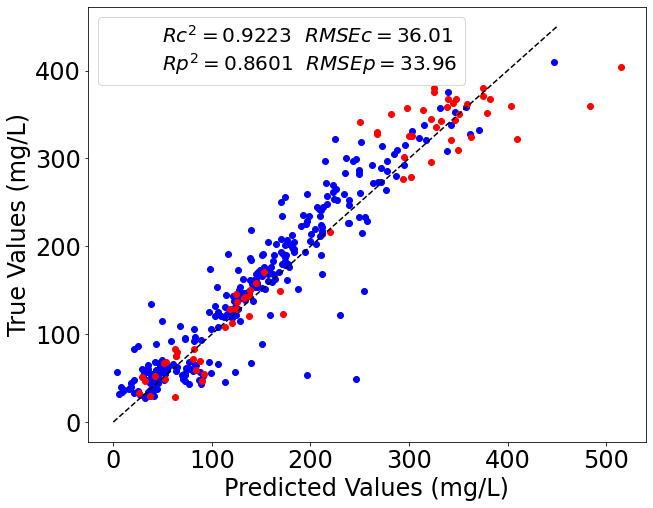

In [84]:
Cal_data = pd.read_excel('Cal-data.xlsx')
cal_features = Cal_data.iloc[:,:14]
cal_lables = Cal_data.iloc[:,14]


Test_data = pd.read_excel('Test-data.xlsx')
test_features = Test_data.iloc[:,:14]
test_lables = Test_data.iloc[:,14]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cal_features)
cal_features=scaler.transform(cal_features)
test_features=scaler.transform(test_features)

cal_features_tensor = torch.tensor(cal_features, dtype=torch.float32).unsqueeze(1)
cal_lables_tensor = torch.tensor(cal_lables.values, dtype=torch.float32).unsqueeze(1)

test_features_tensor = torch.tensor(test_features, dtype=torch.float32).unsqueeze(1)
test_lables_tensor = torch.tensor(test_lables.values, dtype=torch.float32).unsqueeze(1)


import matplotlib.pyplot as plt
import numpy as np

model.eval()  
with torch.no_grad():
    predictions_cal = model(cal_features_tensor)

with torch.no_grad():
    predictions_test = model(test_features_tensor)
    

predictions_np_cal = predictions_cal.detach().numpy().flatten()
true_values_np_cal = cal_lables_tensor.detach().numpy().flatten()

predictions_np_test = predictions_test.detach().numpy().flatten()
true_values_np_test = test_lables_tensor.detach().numpy().flatten()

y_true_mean_cal = np.mean(true_values_np_cal)
r2_cal = 1 - (np.sum((true_values_np_cal - predictions_np_cal) ** 2) / np.sum((true_values_np_cal - y_true_mean_cal) ** 2))


rmse_cal = np.sqrt(np.mean((true_values_np_cal - predictions_np_cal) ** 2))


y_true_mean_test = np.mean(true_values_np_test)
r2_test = 1 - (np.sum((true_values_np_test - predictions_np_test) ** 2) / np.sum((true_values_np_test - y_true_mean_test) ** 2))


rmse_test = np.sqrt(np.mean((true_values_np_test - predictions_np_test) ** 2))



plt.figure(figsize=(10, 8))
plt.scatter(predictions_np_cal, true_values_np_cal, color='blue')
plt.scatter(predictions_np_test, true_values_np_test, color='red')


plt.plot([0, 450], [0, 450], 'k--')


plt.xlabel('Predicted Values (mg/L)',fontsize=24)
plt.ylabel('True Values (mg/L)',fontsize=24)
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$Rc^2={:.4f}$' + '  ' + r'$RMSEc={:.2f}$'+ '\n' + r'$Rp^2={:.4f}$'+ '  ' + r'$ RMSEp={:.2f}$').format(r2_test,rmse_test,r2_cal,rmse_cal)], 
           loc='upper left',fontsize=20)
plt.savefig('1DCNN-raw.svg')

plt.show()

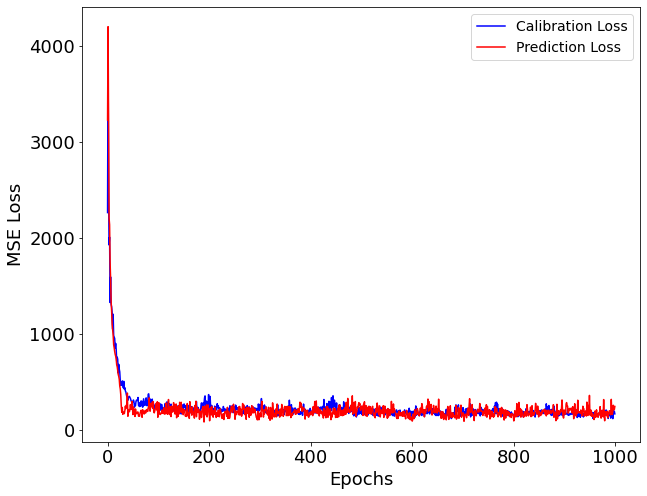

In [214]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
plt.plot(cal_history, label='Calibration Loss',color='blue')
plt.plot(test_history, label='Prediction Loss',color='red')

plt.xlabel('Epochs',fontsize=18)
plt.ylabel('MSE Loss',fontsize=18)
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
plt.savefig('1DCNN-zscore-trainloss.svg')
plt.show()

In [66]:
torch.save(model.state_dict(), 'model_1DCNN-zscore.pth')

#model.load_state_dict(torch.load('model_1DCNN-zscore.pth'))

## 3.MinMax

In [110]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

class OneDimensionalCNN(nn.Module):
    def __init__(self):
        super(OneDimensionalCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=3, stride=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1)
        self.bn2 = nn.BatchNorm1d(256)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2, 128)  
        self.drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 1)  

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        return x


model = OneDimensionalCNN()


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

data = pd.read_excel('data5.xlsx')
features = data.iloc[:,:14]
lables = data.iloc[:,14]

x_train = features
x_test = features

y_train = lables
y_test = lables

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

x_train = x_train.reshape(-1, 1, 14)

y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

history = []
start_time = time.time()  

num_epochs = 20000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    outputs = model(x_train_tensor)
    
    loss = criterion(outputs, y_train)  
    
    loss.backward()
    optimizer.step()

    
    history.append(loss.item())
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

end_time = time.time()  
total_training_time = end_time - start_time
print(f'Total training time: {total_training_time:.2f} seconds')

Epoch 1/20000, Loss: 39071.6875
Epoch 2/20000, Loss: 38966.3984375
Epoch 3/20000, Loss: 38859.3828125
Epoch 4/20000, Loss: 38757.26953125
Epoch 5/20000, Loss: 38650.4140625
Epoch 6/20000, Loss: 38555.015625
Epoch 7/20000, Loss: 38446.4609375
Epoch 8/20000, Loss: 38344.0546875
Epoch 9/20000, Loss: 38244.265625
Epoch 10/20000, Loss: 38139.0625
Epoch 11/20000, Loss: 38038.69140625
Epoch 12/20000, Loss: 37948.29296875
Epoch 13/20000, Loss: 37856.6796875
Epoch 14/20000, Loss: 37742.2421875
Epoch 15/20000, Loss: 37650.3671875
Epoch 16/20000, Loss: 37550.34375
Epoch 17/20000, Loss: 37445.57421875
Epoch 18/20000, Loss: 37352.23046875
Epoch 19/20000, Loss: 37256.97265625
Epoch 20/20000, Loss: 37155.3671875
Epoch 21/20000, Loss: 37056.47265625
Epoch 22/20000, Loss: 36953.4921875
Epoch 23/20000, Loss: 36864.61328125
Epoch 24/20000, Loss: 36764.515625
Epoch 25/20000, Loss: 36667.59765625
Epoch 26/20000, Loss: 36578.69140625
Epoch 27/20000, Loss: 36457.078125
Epoch 28/20000, Loss: 36362.859375
Epoc

Epoch 223/20000, Loss: 12184.1396484375
Epoch 224/20000, Loss: 11935.9296875
Epoch 225/20000, Loss: 11888.3095703125
Epoch 226/20000, Loss: 11839.033203125
Epoch 227/20000, Loss: 11768.529296875
Epoch 228/20000, Loss: 11650.8583984375
Epoch 229/20000, Loss: 11559.2568359375
Epoch 230/20000, Loss: 11438.2939453125
Epoch 231/20000, Loss: 11426.4423828125
Epoch 232/20000, Loss: 11308.4287109375
Epoch 233/20000, Loss: 11291.802734375
Epoch 234/20000, Loss: 11210.7724609375
Epoch 235/20000, Loss: 11171.5908203125
Epoch 236/20000, Loss: 11138.8564453125
Epoch 237/20000, Loss: 10977.302734375
Epoch 238/20000, Loss: 10896.83203125
Epoch 239/20000, Loss: 10913.39453125
Epoch 240/20000, Loss: 10662.34765625
Epoch 241/20000, Loss: 10824.0791015625
Epoch 242/20000, Loss: 10605.2431640625
Epoch 243/20000, Loss: 10597.7998046875
Epoch 244/20000, Loss: 10605.9130859375
Epoch 245/20000, Loss: 10475.34375
Epoch 246/20000, Loss: 10492.587890625
Epoch 247/20000, Loss: 10283.361328125
Epoch 248/20000, Los

Epoch 439/20000, Loss: 5932.9306640625
Epoch 440/20000, Loss: 5937.1826171875
Epoch 441/20000, Loss: 5918.3955078125
Epoch 442/20000, Loss: 5826.1845703125
Epoch 443/20000, Loss: 5902.27099609375
Epoch 444/20000, Loss: 5957.876953125
Epoch 445/20000, Loss: 5927.06640625
Epoch 446/20000, Loss: 5763.96484375
Epoch 447/20000, Loss: 5858.4287109375
Epoch 448/20000, Loss: 5820.5810546875
Epoch 449/20000, Loss: 5881.8486328125
Epoch 450/20000, Loss: 5825.60888671875
Epoch 451/20000, Loss: 5746.34375
Epoch 452/20000, Loss: 5792.43896484375
Epoch 453/20000, Loss: 5809.8291015625
Epoch 454/20000, Loss: 5722.4365234375
Epoch 455/20000, Loss: 5639.79931640625
Epoch 456/20000, Loss: 5729.330078125
Epoch 457/20000, Loss: 5571.98828125
Epoch 458/20000, Loss: 5863.22412109375
Epoch 459/20000, Loss: 5719.109375
Epoch 460/20000, Loss: 5811.99267578125
Epoch 461/20000, Loss: 5696.78125
Epoch 462/20000, Loss: 5656.07666015625
Epoch 463/20000, Loss: 5762.81396484375
Epoch 464/20000, Loss: 5731.2890625
Epo

Epoch 653/20000, Loss: 4186.77880859375
Epoch 654/20000, Loss: 4429.42431640625
Epoch 655/20000, Loss: 4196.3388671875
Epoch 656/20000, Loss: 4311.4609375
Epoch 657/20000, Loss: 4243.02587890625
Epoch 658/20000, Loss: 4362.7509765625
Epoch 659/20000, Loss: 4314.294921875
Epoch 660/20000, Loss: 4361.60595703125
Epoch 661/20000, Loss: 4272.8486328125
Epoch 662/20000, Loss: 4366.13232421875
Epoch 663/20000, Loss: 4251.1201171875
Epoch 664/20000, Loss: 4310.62890625
Epoch 665/20000, Loss: 4208.15771484375
Epoch 666/20000, Loss: 4273.71630859375
Epoch 667/20000, Loss: 4297.90625
Epoch 668/20000, Loss: 4233.97900390625
Epoch 669/20000, Loss: 4219.0078125
Epoch 670/20000, Loss: 4256.60302734375
Epoch 671/20000, Loss: 4277.09130859375
Epoch 672/20000, Loss: 4234.388671875
Epoch 673/20000, Loss: 4134.65380859375
Epoch 674/20000, Loss: 4281.43896484375
Epoch 675/20000, Loss: 4118.498046875
Epoch 676/20000, Loss: 4247.7294921875
Epoch 677/20000, Loss: 4242.29150390625
Epoch 678/20000, Loss: 4067.

Epoch 863/20000, Loss: 3525.25927734375
Epoch 864/20000, Loss: 3497.226318359375
Epoch 865/20000, Loss: 3472.7861328125
Epoch 866/20000, Loss: 3432.447509765625
Epoch 867/20000, Loss: 3438.588134765625
Epoch 868/20000, Loss: 3429.968505859375
Epoch 869/20000, Loss: 3465.027587890625
Epoch 870/20000, Loss: 3353.768310546875
Epoch 871/20000, Loss: 3430.25830078125
Epoch 872/20000, Loss: 3326.08154296875
Epoch 873/20000, Loss: 3339.881103515625
Epoch 874/20000, Loss: 3354.931396484375
Epoch 875/20000, Loss: 3374.145751953125
Epoch 876/20000, Loss: 3571.20751953125
Epoch 877/20000, Loss: 3501.1025390625
Epoch 878/20000, Loss: 3439.500244140625
Epoch 879/20000, Loss: 3469.92822265625
Epoch 880/20000, Loss: 3480.38134765625
Epoch 881/20000, Loss: 3417.82958984375
Epoch 882/20000, Loss: 3430.81005859375
Epoch 883/20000, Loss: 3387.189697265625
Epoch 884/20000, Loss: 3406.3017578125
Epoch 885/20000, Loss: 3329.361328125
Epoch 886/20000, Loss: 3315.7314453125
Epoch 887/20000, Loss: 3382.2631835

Epoch 1068/20000, Loss: 2939.30126953125
Epoch 1069/20000, Loss: 2971.410400390625
Epoch 1070/20000, Loss: 3079.4365234375
Epoch 1071/20000, Loss: 2987.79150390625
Epoch 1072/20000, Loss: 3022.428955078125
Epoch 1073/20000, Loss: 3006.983154296875
Epoch 1074/20000, Loss: 2946.175537109375
Epoch 1075/20000, Loss: 2898.18017578125
Epoch 1076/20000, Loss: 2942.3798828125
Epoch 1077/20000, Loss: 2791.876220703125
Epoch 1078/20000, Loss: 2908.950439453125
Epoch 1079/20000, Loss: 2928.383544921875
Epoch 1080/20000, Loss: 2916.7548828125
Epoch 1081/20000, Loss: 2853.67578125
Epoch 1082/20000, Loss: 2955.64794921875
Epoch 1083/20000, Loss: 2965.0927734375
Epoch 1084/20000, Loss: 2924.392578125
Epoch 1085/20000, Loss: 3008.5703125
Epoch 1086/20000, Loss: 2929.0966796875
Epoch 1087/20000, Loss: 2897.768798828125
Epoch 1088/20000, Loss: 2899.884765625
Epoch 1089/20000, Loss: 2960.514892578125
Epoch 1090/20000, Loss: 2930.690673828125
Epoch 1091/20000, Loss: 3020.8681640625
Epoch 1092/20000, Loss:

Epoch 1277/20000, Loss: 2583.031982421875
Epoch 1278/20000, Loss: 2629.099853515625
Epoch 1279/20000, Loss: 2509.28857421875
Epoch 1280/20000, Loss: 2590.241943359375
Epoch 1281/20000, Loss: 2520.19189453125
Epoch 1282/20000, Loss: 2569.84619140625
Epoch 1283/20000, Loss: 2598.871826171875
Epoch 1284/20000, Loss: 2592.5634765625
Epoch 1285/20000, Loss: 2525.9462890625
Epoch 1286/20000, Loss: 2542.536865234375
Epoch 1287/20000, Loss: 2582.758544921875
Epoch 1288/20000, Loss: 2627.6953125
Epoch 1289/20000, Loss: 2636.326904296875
Epoch 1290/20000, Loss: 2569.35009765625
Epoch 1291/20000, Loss: 2464.7841796875
Epoch 1292/20000, Loss: 2536.947021484375
Epoch 1293/20000, Loss: 2579.707275390625
Epoch 1294/20000, Loss: 2586.14794921875
Epoch 1295/20000, Loss: 2491.571533203125
Epoch 1296/20000, Loss: 2545.675537109375
Epoch 1297/20000, Loss: 2509.0224609375
Epoch 1298/20000, Loss: 2552.288330078125
Epoch 1299/20000, Loss: 2560.45703125
Epoch 1300/20000, Loss: 2524.45556640625
Epoch 1301/2000

Epoch 1479/20000, Loss: 2262.957275390625
Epoch 1480/20000, Loss: 2240.928466796875
Epoch 1481/20000, Loss: 2278.453125
Epoch 1482/20000, Loss: 2327.83642578125
Epoch 1483/20000, Loss: 2232.5185546875
Epoch 1484/20000, Loss: 2315.017578125
Epoch 1485/20000, Loss: 2275.78662109375
Epoch 1486/20000, Loss: 2300.424560546875
Epoch 1487/20000, Loss: 2223.74365234375
Epoch 1488/20000, Loss: 2213.4560546875
Epoch 1489/20000, Loss: 2232.51611328125
Epoch 1490/20000, Loss: 2234.80126953125
Epoch 1491/20000, Loss: 2225.304443359375
Epoch 1492/20000, Loss: 2284.60302734375
Epoch 1493/20000, Loss: 2283.586669921875
Epoch 1494/20000, Loss: 2276.238525390625
Epoch 1495/20000, Loss: 2318.25390625
Epoch 1496/20000, Loss: 2313.24560546875
Epoch 1497/20000, Loss: 2267.502197265625
Epoch 1498/20000, Loss: 2242.0751953125
Epoch 1499/20000, Loss: 2285.68212890625
Epoch 1500/20000, Loss: 2248.5517578125
Epoch 1501/20000, Loss: 2250.482177734375
Epoch 1502/20000, Loss: 2221.28564453125
Epoch 1503/20000, Loss

Epoch 1685/20000, Loss: 1967.33642578125
Epoch 1686/20000, Loss: 2021.8465576171875
Epoch 1687/20000, Loss: 1962.6492919921875
Epoch 1688/20000, Loss: 2075.310791015625
Epoch 1689/20000, Loss: 2030.9775390625
Epoch 1690/20000, Loss: 1899.8541259765625
Epoch 1691/20000, Loss: 1996.3927001953125
Epoch 1692/20000, Loss: 2063.024169921875
Epoch 1693/20000, Loss: 2002.993896484375
Epoch 1694/20000, Loss: 1963.5
Epoch 1695/20000, Loss: 1993.1005859375
Epoch 1696/20000, Loss: 2085.23046875
Epoch 1697/20000, Loss: 2017.9637451171875
Epoch 1698/20000, Loss: 1958.0181884765625
Epoch 1699/20000, Loss: 2050.240478515625
Epoch 1700/20000, Loss: 2017.8681640625
Epoch 1701/20000, Loss: 1919.0845947265625
Epoch 1702/20000, Loss: 2011.493408203125
Epoch 1703/20000, Loss: 2031.6710205078125
Epoch 1704/20000, Loss: 2008.785400390625
Epoch 1705/20000, Loss: 2178.59130859375
Epoch 1706/20000, Loss: 1964.175537109375
Epoch 1707/20000, Loss: 1919.93359375
Epoch 1708/20000, Loss: 2063.177490234375
Epoch 1709/

Epoch 1891/20000, Loss: 1721.2821044921875
Epoch 1892/20000, Loss: 1783.42138671875
Epoch 1893/20000, Loss: 1821.5667724609375
Epoch 1894/20000, Loss: 1701.6087646484375
Epoch 1895/20000, Loss: 1820.7469482421875
Epoch 1896/20000, Loss: 1868.83447265625
Epoch 1897/20000, Loss: 1755.19482421875
Epoch 1898/20000, Loss: 1769.966064453125
Epoch 1899/20000, Loss: 1751.631103515625
Epoch 1900/20000, Loss: 1820.1634521484375
Epoch 1901/20000, Loss: 1679.2371826171875
Epoch 1902/20000, Loss: 1748.58251953125
Epoch 1903/20000, Loss: 1684.3704833984375
Epoch 1904/20000, Loss: 1803.5238037109375
Epoch 1905/20000, Loss: 1722.658203125
Epoch 1906/20000, Loss: 1787.845947265625
Epoch 1907/20000, Loss: 1782.09716796875
Epoch 1908/20000, Loss: 1734.383056640625
Epoch 1909/20000, Loss: 1692.789306640625
Epoch 1910/20000, Loss: 1727.4185791015625
Epoch 1911/20000, Loss: 1680.252197265625
Epoch 1912/20000, Loss: 1739.6168212890625
Epoch 1913/20000, Loss: 1815.289794921875
Epoch 1914/20000, Loss: 1735.309

Epoch 2093/20000, Loss: 1564.381103515625
Epoch 2094/20000, Loss: 1656.53515625
Epoch 2095/20000, Loss: 1593.313232421875
Epoch 2096/20000, Loss: 1494.26171875
Epoch 2097/20000, Loss: 1556.0682373046875
Epoch 2098/20000, Loss: 1543.1328125
Epoch 2099/20000, Loss: 1549.7296142578125
Epoch 2100/20000, Loss: 1584.5570068359375
Epoch 2101/20000, Loss: 1544.0936279296875
Epoch 2102/20000, Loss: 1557.3814697265625
Epoch 2103/20000, Loss: 1539.3826904296875
Epoch 2104/20000, Loss: 1610.3818359375
Epoch 2105/20000, Loss: 1560.0169677734375
Epoch 2106/20000, Loss: 1612.4927978515625
Epoch 2107/20000, Loss: 1594.9039306640625
Epoch 2108/20000, Loss: 1481.6085205078125
Epoch 2109/20000, Loss: 1581.1453857421875
Epoch 2110/20000, Loss: 1620.502197265625
Epoch 2111/20000, Loss: 1518.9615478515625
Epoch 2112/20000, Loss: 1565.7662353515625
Epoch 2113/20000, Loss: 1520.4949951171875
Epoch 2114/20000, Loss: 1463.5509033203125
Epoch 2115/20000, Loss: 1560.7967529296875
Epoch 2116/20000, Loss: 1596.0378

Epoch 2289/20000, Loss: 1560.725341796875
Epoch 2290/20000, Loss: 1356.3702392578125
Epoch 2291/20000, Loss: 1379.4835205078125
Epoch 2292/20000, Loss: 1409.489501953125
Epoch 2293/20000, Loss: 1403.4537353515625
Epoch 2294/20000, Loss: 1398.4151611328125
Epoch 2295/20000, Loss: 1426.609375
Epoch 2296/20000, Loss: 1347.780517578125
Epoch 2297/20000, Loss: 1393.1824951171875
Epoch 2298/20000, Loss: 1307.73681640625
Epoch 2299/20000, Loss: 1372.2967529296875
Epoch 2300/20000, Loss: 1418.89404296875
Epoch 2301/20000, Loss: 1423.912841796875
Epoch 2302/20000, Loss: 1456.7535400390625
Epoch 2303/20000, Loss: 1322.157470703125
Epoch 2304/20000, Loss: 1459.130126953125
Epoch 2305/20000, Loss: 1328.0650634765625
Epoch 2306/20000, Loss: 1430.290771484375
Epoch 2307/20000, Loss: 1305.8704833984375
Epoch 2308/20000, Loss: 1464.5604248046875
Epoch 2309/20000, Loss: 1440.513671875
Epoch 2310/20000, Loss: 1385.02587890625
Epoch 2311/20000, Loss: 1389.368408203125
Epoch 2312/20000, Loss: 1412.1280517

Epoch 2486/20000, Loss: 1325.359130859375
Epoch 2487/20000, Loss: 1317.015380859375
Epoch 2488/20000, Loss: 1271.14208984375
Epoch 2489/20000, Loss: 1297.12646484375
Epoch 2490/20000, Loss: 1299.4246826171875
Epoch 2491/20000, Loss: 1253.62255859375
Epoch 2492/20000, Loss: 1229.4017333984375
Epoch 2493/20000, Loss: 1274.7169189453125
Epoch 2494/20000, Loss: 1275.2879638671875
Epoch 2495/20000, Loss: 1306.02978515625
Epoch 2496/20000, Loss: 1196.3026123046875
Epoch 2497/20000, Loss: 1258.8431396484375
Epoch 2498/20000, Loss: 1242.3330078125
Epoch 2499/20000, Loss: 1190.3353271484375
Epoch 2500/20000, Loss: 1305.8914794921875
Epoch 2501/20000, Loss: 1242.628173828125
Epoch 2502/20000, Loss: 1203.418701171875
Epoch 2503/20000, Loss: 1247.980712890625
Epoch 2504/20000, Loss: 1219.4349365234375
Epoch 2505/20000, Loss: 1271.01904296875
Epoch 2506/20000, Loss: 1283.278564453125
Epoch 2507/20000, Loss: 1267.761474609375
Epoch 2508/20000, Loss: 1224.0943603515625
Epoch 2509/20000, Loss: 1258.81

Epoch 2690/20000, Loss: 1139.11083984375
Epoch 2691/20000, Loss: 1135.576904296875
Epoch 2692/20000, Loss: 1169.330322265625
Epoch 2693/20000, Loss: 1102.4613037109375
Epoch 2694/20000, Loss: 1128.40673828125
Epoch 2695/20000, Loss: 1071.340576171875
Epoch 2696/20000, Loss: 1143.3924560546875
Epoch 2697/20000, Loss: 1064.98779296875
Epoch 2698/20000, Loss: 1054.589599609375
Epoch 2699/20000, Loss: 1111.4180908203125
Epoch 2700/20000, Loss: 1109.947998046875
Epoch 2701/20000, Loss: 1076.960205078125
Epoch 2702/20000, Loss: 1156.7718505859375
Epoch 2703/20000, Loss: 1126.81591796875
Epoch 2704/20000, Loss: 1187.3760986328125
Epoch 2705/20000, Loss: 1140.8870849609375
Epoch 2706/20000, Loss: 1065.3868408203125
Epoch 2707/20000, Loss: 1080.1622314453125
Epoch 2708/20000, Loss: 1100.279541015625
Epoch 2709/20000, Loss: 1102.002197265625
Epoch 2710/20000, Loss: 1087.6866455078125
Epoch 2711/20000, Loss: 1117.5008544921875
Epoch 2712/20000, Loss: 1102.42431640625
Epoch 2713/20000, Loss: 1132.

Epoch 2891/20000, Loss: 1068.736572265625
Epoch 2892/20000, Loss: 1017.6751708984375
Epoch 2893/20000, Loss: 996.0831298828125
Epoch 2894/20000, Loss: 978.2652587890625
Epoch 2895/20000, Loss: 1053.5389404296875
Epoch 2896/20000, Loss: 985.239990234375
Epoch 2897/20000, Loss: 985.602783203125
Epoch 2898/20000, Loss: 1013.3423461914062
Epoch 2899/20000, Loss: 1033.9453125
Epoch 2900/20000, Loss: 1038.669677734375
Epoch 2901/20000, Loss: 984.7269897460938
Epoch 2902/20000, Loss: 1062.2886962890625
Epoch 2903/20000, Loss: 977.009033203125
Epoch 2904/20000, Loss: 1009.411865234375
Epoch 2905/20000, Loss: 996.0669555664062
Epoch 2906/20000, Loss: 1034.4178466796875
Epoch 2907/20000, Loss: 979.1695556640625
Epoch 2908/20000, Loss: 1013.67724609375
Epoch 2909/20000, Loss: 995.2218627929688
Epoch 2910/20000, Loss: 1053.78564453125
Epoch 2911/20000, Loss: 1031.177734375
Epoch 2912/20000, Loss: 967.1604614257812
Epoch 2913/20000, Loss: 1021.3280639648438
Epoch 2914/20000, Loss: 1056.180053710937

Epoch 3088/20000, Loss: 924.9566040039062
Epoch 3089/20000, Loss: 916.9443969726562
Epoch 3090/20000, Loss: 938.0635986328125
Epoch 3091/20000, Loss: 947.5978393554688
Epoch 3092/20000, Loss: 933.499267578125
Epoch 3093/20000, Loss: 950.1221313476562
Epoch 3094/20000, Loss: 942.58154296875
Epoch 3095/20000, Loss: 948.1660766601562
Epoch 3096/20000, Loss: 944.5001831054688
Epoch 3097/20000, Loss: 879.625
Epoch 3098/20000, Loss: 938.2987670898438
Epoch 3099/20000, Loss: 897.6552734375
Epoch 3100/20000, Loss: 940.8524780273438
Epoch 3101/20000, Loss: 950.3536376953125
Epoch 3102/20000, Loss: 933.997314453125
Epoch 3103/20000, Loss: 894.9411010742188
Epoch 3104/20000, Loss: 918.4041137695312
Epoch 3105/20000, Loss: 915.5791015625
Epoch 3106/20000, Loss: 874.13037109375
Epoch 3107/20000, Loss: 911.127685546875
Epoch 3108/20000, Loss: 879.7718505859375
Epoch 3109/20000, Loss: 983.5723266601562
Epoch 3110/20000, Loss: 890.8280639648438
Epoch 3111/20000, Loss: 825.8607788085938
Epoch 3112/2000

Epoch 3291/20000, Loss: 834.1149291992188
Epoch 3292/20000, Loss: 805.95703125
Epoch 3293/20000, Loss: 850.1404418945312
Epoch 3294/20000, Loss: 857.8694458007812
Epoch 3295/20000, Loss: 855.3223876953125
Epoch 3296/20000, Loss: 893.9116821289062
Epoch 3297/20000, Loss: 779.3715209960938
Epoch 3298/20000, Loss: 875.6934814453125
Epoch 3299/20000, Loss: 869.47412109375
Epoch 3300/20000, Loss: 794.4556274414062
Epoch 3301/20000, Loss: 792.3291015625
Epoch 3302/20000, Loss: 890.5188598632812
Epoch 3303/20000, Loss: 824.616943359375
Epoch 3304/20000, Loss: 911.5968627929688
Epoch 3305/20000, Loss: 898.2772216796875
Epoch 3306/20000, Loss: 839.6624145507812
Epoch 3307/20000, Loss: 820.6062622070312
Epoch 3308/20000, Loss: 874.8004760742188
Epoch 3309/20000, Loss: 851.4730224609375
Epoch 3310/20000, Loss: 893.1190795898438
Epoch 3311/20000, Loss: 789.2797241210938
Epoch 3312/20000, Loss: 866.245361328125
Epoch 3313/20000, Loss: 842.4412231445312
Epoch 3314/20000, Loss: 859.0000610351562
Epoc

Epoch 3493/20000, Loss: 891.8275146484375
Epoch 3494/20000, Loss: 839.7693481445312
Epoch 3495/20000, Loss: 799.5700073242188
Epoch 3496/20000, Loss: 871.909912109375
Epoch 3497/20000, Loss: 919.5560913085938
Epoch 3498/20000, Loss: 841.4776611328125
Epoch 3499/20000, Loss: 762.1209106445312
Epoch 3500/20000, Loss: 805.087158203125
Epoch 3501/20000, Loss: 787.787841796875
Epoch 3502/20000, Loss: 714.1329956054688
Epoch 3503/20000, Loss: 774.3411865234375
Epoch 3504/20000, Loss: 741.9845581054688
Epoch 3505/20000, Loss: 761.4832153320312
Epoch 3506/20000, Loss: 766.9631958007812
Epoch 3507/20000, Loss: 798.6834716796875
Epoch 3508/20000, Loss: 793.9610595703125
Epoch 3509/20000, Loss: 825.0235595703125
Epoch 3510/20000, Loss: 802.516845703125
Epoch 3511/20000, Loss: 752.0489501953125
Epoch 3512/20000, Loss: 762.5051879882812
Epoch 3513/20000, Loss: 802.5380249023438
Epoch 3514/20000, Loss: 784.3688354492188
Epoch 3515/20000, Loss: 770.8848266601562
Epoch 3516/20000, Loss: 849.6317749023

Epoch 3699/20000, Loss: 713.2173461914062
Epoch 3700/20000, Loss: 695.04296875
Epoch 3701/20000, Loss: 710.3460693359375
Epoch 3702/20000, Loss: 695.3786010742188
Epoch 3703/20000, Loss: 711.6949462890625
Epoch 3704/20000, Loss: 670.0914306640625
Epoch 3705/20000, Loss: 740.5924072265625
Epoch 3706/20000, Loss: 676.6593627929688
Epoch 3707/20000, Loss: 707.196044921875
Epoch 3708/20000, Loss: 650.3997192382812
Epoch 3709/20000, Loss: 618.424072265625
Epoch 3710/20000, Loss: 710.1506958007812
Epoch 3711/20000, Loss: 711.6917724609375
Epoch 3712/20000, Loss: 636.8922119140625
Epoch 3713/20000, Loss: 659.83837890625
Epoch 3714/20000, Loss: 703.6634521484375
Epoch 3715/20000, Loss: 680.8281860351562
Epoch 3716/20000, Loss: 683.7520141601562
Epoch 3717/20000, Loss: 671.3348388671875
Epoch 3718/20000, Loss: 669.140869140625
Epoch 3719/20000, Loss: 649.4554443359375
Epoch 3720/20000, Loss: 718.59912109375
Epoch 3721/20000, Loss: 725.047607421875
Epoch 3722/20000, Loss: 695.5808715820312
Epoch

Epoch 3904/20000, Loss: 650.5670166015625
Epoch 3905/20000, Loss: 653.7572631835938
Epoch 3906/20000, Loss: 611.7467651367188
Epoch 3907/20000, Loss: 630.2933349609375
Epoch 3908/20000, Loss: 627.3158569335938
Epoch 3909/20000, Loss: 599.7982177734375
Epoch 3910/20000, Loss: 628.9097290039062
Epoch 3911/20000, Loss: 683.3707885742188
Epoch 3912/20000, Loss: 693.7999267578125
Epoch 3913/20000, Loss: 611.6089477539062
Epoch 3914/20000, Loss: 641.9735717773438
Epoch 3915/20000, Loss: 669.2463989257812
Epoch 3916/20000, Loss: 685.064697265625
Epoch 3917/20000, Loss: 619.5425415039062
Epoch 3918/20000, Loss: 670.7748413085938
Epoch 3919/20000, Loss: 631.3654174804688
Epoch 3920/20000, Loss: 663.2529907226562
Epoch 3921/20000, Loss: 628.9024047851562
Epoch 3922/20000, Loss: 639.05517578125
Epoch 3923/20000, Loss: 682.8563232421875
Epoch 3924/20000, Loss: 639.2604370117188
Epoch 3925/20000, Loss: 598.5173950195312
Epoch 3926/20000, Loss: 630.7757568359375
Epoch 3927/20000, Loss: 639.211181640

Epoch 4107/20000, Loss: 587.266357421875
Epoch 4108/20000, Loss: 626.000732421875
Epoch 4109/20000, Loss: 615.3658447265625
Epoch 4110/20000, Loss: 550.2410888671875
Epoch 4111/20000, Loss: 573.4425659179688
Epoch 4112/20000, Loss: 627.3192138671875
Epoch 4113/20000, Loss: 627.031494140625
Epoch 4114/20000, Loss: 576.7061157226562
Epoch 4115/20000, Loss: 594.2765502929688
Epoch 4116/20000, Loss: 606.457275390625
Epoch 4117/20000, Loss: 612.3547973632812
Epoch 4118/20000, Loss: 599.319580078125
Epoch 4119/20000, Loss: 567.9349975585938
Epoch 4120/20000, Loss: 550.2338256835938
Epoch 4121/20000, Loss: 597.899658203125
Epoch 4122/20000, Loss: 740.5195922851562
Epoch 4123/20000, Loss: 583.9724731445312
Epoch 4124/20000, Loss: 636.734619140625
Epoch 4125/20000, Loss: 720.2973022460938
Epoch 4126/20000, Loss: 687.7278442382812
Epoch 4127/20000, Loss: 609.9227905273438
Epoch 4128/20000, Loss: 579.6664428710938
Epoch 4129/20000, Loss: 648.6295776367188
Epoch 4130/20000, Loss: 642.8897705078125

Epoch 4305/20000, Loss: 574.0945434570312
Epoch 4306/20000, Loss: 506.0501403808594
Epoch 4307/20000, Loss: 528.2109985351562
Epoch 4308/20000, Loss: 569.74169921875
Epoch 4309/20000, Loss: 586.9342041015625
Epoch 4310/20000, Loss: 578.86328125
Epoch 4311/20000, Loss: 562.6016235351562
Epoch 4312/20000, Loss: 537.5203857421875
Epoch 4313/20000, Loss: 568.6556396484375
Epoch 4314/20000, Loss: 531.4815063476562
Epoch 4315/20000, Loss: 554.907470703125
Epoch 4316/20000, Loss: 599.7459716796875
Epoch 4317/20000, Loss: 534.6797485351562
Epoch 4318/20000, Loss: 524.6727905273438
Epoch 4319/20000, Loss: 566.9573364257812
Epoch 4320/20000, Loss: 543.9581909179688
Epoch 4321/20000, Loss: 552.925537109375
Epoch 4322/20000, Loss: 527.0791015625
Epoch 4323/20000, Loss: 568.1531982421875
Epoch 4324/20000, Loss: 537.1387329101562
Epoch 4325/20000, Loss: 571.821044921875
Epoch 4326/20000, Loss: 512.4808959960938
Epoch 4327/20000, Loss: 555.8707885742188
Epoch 4328/20000, Loss: 584.5038452148438
Epoch

Epoch 4507/20000, Loss: 566.94482421875
Epoch 4508/20000, Loss: 559.6990356445312
Epoch 4509/20000, Loss: 601.730712890625
Epoch 4510/20000, Loss: 604.4577026367188
Epoch 4511/20000, Loss: 525.2348022460938
Epoch 4512/20000, Loss: 536.894287109375
Epoch 4513/20000, Loss: 543.2144775390625
Epoch 4514/20000, Loss: 529.3037719726562
Epoch 4515/20000, Loss: 538.1309204101562
Epoch 4516/20000, Loss: 516.3892211914062
Epoch 4517/20000, Loss: 533.9861450195312
Epoch 4518/20000, Loss: 504.77008056640625
Epoch 4519/20000, Loss: 539.6834106445312
Epoch 4520/20000, Loss: 541.8226928710938
Epoch 4521/20000, Loss: 470.5255432128906
Epoch 4522/20000, Loss: 492.0238342285156
Epoch 4523/20000, Loss: 478.8525085449219
Epoch 4524/20000, Loss: 431.0740661621094
Epoch 4525/20000, Loss: 554.53759765625
Epoch 4526/20000, Loss: 508.3407897949219
Epoch 4527/20000, Loss: 515.3424682617188
Epoch 4528/20000, Loss: 493.9397888183594
Epoch 4529/20000, Loss: 539.06005859375
Epoch 4530/20000, Loss: 553.7206420898438

Epoch 4711/20000, Loss: 510.7032165527344
Epoch 4712/20000, Loss: 469.7309265136719
Epoch 4713/20000, Loss: 466.7028503417969
Epoch 4714/20000, Loss: 499.1023254394531
Epoch 4715/20000, Loss: 472.65887451171875
Epoch 4716/20000, Loss: 481.9776306152344
Epoch 4717/20000, Loss: 506.42547607421875
Epoch 4718/20000, Loss: 469.0216064453125
Epoch 4719/20000, Loss: 477.5096740722656
Epoch 4720/20000, Loss: 509.9561462402344
Epoch 4721/20000, Loss: 511.9942321777344
Epoch 4722/20000, Loss: 529.2969360351562
Epoch 4723/20000, Loss: 523.2780151367188
Epoch 4724/20000, Loss: 519.792236328125
Epoch 4725/20000, Loss: 503.62078857421875
Epoch 4726/20000, Loss: 514.5147094726562
Epoch 4727/20000, Loss: 475.9001770019531
Epoch 4728/20000, Loss: 446.0547790527344
Epoch 4729/20000, Loss: 484.9075012207031
Epoch 4730/20000, Loss: 543.2266235351562
Epoch 4731/20000, Loss: 505.3258056640625
Epoch 4732/20000, Loss: 481.2257080078125
Epoch 4733/20000, Loss: 513.0319213867188
Epoch 4734/20000, Loss: 478.9570

Epoch 4907/20000, Loss: 503.4927978515625
Epoch 4908/20000, Loss: 433.3388366699219
Epoch 4909/20000, Loss: 492.11517333984375
Epoch 4910/20000, Loss: 524.9645385742188
Epoch 4911/20000, Loss: 438.8381652832031
Epoch 4912/20000, Loss: 435.208740234375
Epoch 4913/20000, Loss: 530.9506225585938
Epoch 4914/20000, Loss: 488.73370361328125
Epoch 4915/20000, Loss: 435.166259765625
Epoch 4916/20000, Loss: 479.96990966796875
Epoch 4917/20000, Loss: 510.1129455566406
Epoch 4918/20000, Loss: 495.10260009765625
Epoch 4919/20000, Loss: 444.0825500488281
Epoch 4920/20000, Loss: 448.9068298339844
Epoch 4921/20000, Loss: 519.3119506835938
Epoch 4922/20000, Loss: 467.0106201171875
Epoch 4923/20000, Loss: 492.87884521484375
Epoch 4924/20000, Loss: 481.43017578125
Epoch 4925/20000, Loss: 499.25531005859375
Epoch 4926/20000, Loss: 432.31781005859375
Epoch 4927/20000, Loss: 434.1499938964844
Epoch 4928/20000, Loss: 540.097900390625
Epoch 4929/20000, Loss: 456.16143798828125
Epoch 4930/20000, Loss: 464.768

Epoch 5105/20000, Loss: 462.71209716796875
Epoch 5106/20000, Loss: 501.87481689453125
Epoch 5107/20000, Loss: 505.4296569824219
Epoch 5108/20000, Loss: 462.2518005371094
Epoch 5109/20000, Loss: 465.494873046875
Epoch 5110/20000, Loss: 488.4236755371094
Epoch 5111/20000, Loss: 472.8775329589844
Epoch 5112/20000, Loss: 491.51580810546875
Epoch 5113/20000, Loss: 459.4896545410156
Epoch 5114/20000, Loss: 450.23388671875
Epoch 5115/20000, Loss: 418.1194152832031
Epoch 5116/20000, Loss: 421.9397888183594
Epoch 5117/20000, Loss: 405.7325744628906
Epoch 5118/20000, Loss: 438.88818359375
Epoch 5119/20000, Loss: 448.59490966796875
Epoch 5120/20000, Loss: 406.3741455078125
Epoch 5121/20000, Loss: 460.2915954589844
Epoch 5122/20000, Loss: 435.32159423828125
Epoch 5123/20000, Loss: 442.1180419921875
Epoch 5124/20000, Loss: 424.4222412109375
Epoch 5125/20000, Loss: 430.2200927734375
Epoch 5126/20000, Loss: 428.66357421875
Epoch 5127/20000, Loss: 446.8193664550781
Epoch 5128/20000, Loss: 416.85037231

Epoch 5307/20000, Loss: 480.9681396484375
Epoch 5308/20000, Loss: 393.81793212890625
Epoch 5309/20000, Loss: 441.98382568359375
Epoch 5310/20000, Loss: 452.3056335449219
Epoch 5311/20000, Loss: 417.2542724609375
Epoch 5312/20000, Loss: 400.5201721191406
Epoch 5313/20000, Loss: 427.1939392089844
Epoch 5314/20000, Loss: 430.01806640625
Epoch 5315/20000, Loss: 449.99786376953125
Epoch 5316/20000, Loss: 439.373291015625
Epoch 5317/20000, Loss: 427.1407165527344
Epoch 5318/20000, Loss: 487.8594665527344
Epoch 5319/20000, Loss: 493.8753662109375
Epoch 5320/20000, Loss: 492.60540771484375
Epoch 5321/20000, Loss: 421.93280029296875
Epoch 5322/20000, Loss: 506.81561279296875
Epoch 5323/20000, Loss: 443.7347412109375
Epoch 5324/20000, Loss: 428.69891357421875
Epoch 5325/20000, Loss: 557.543701171875
Epoch 5326/20000, Loss: 436.70159912109375
Epoch 5327/20000, Loss: 475.32513427734375
Epoch 5328/20000, Loss: 476.800537109375
Epoch 5329/20000, Loss: 490.3724670410156
Epoch 5330/20000, Loss: 392.63

Epoch 5504/20000, Loss: 425.3543701171875
Epoch 5505/20000, Loss: 421.1939697265625
Epoch 5506/20000, Loss: 377.994384765625
Epoch 5507/20000, Loss: 381.1902160644531
Epoch 5508/20000, Loss: 410.3759765625
Epoch 5509/20000, Loss: 403.05767822265625
Epoch 5510/20000, Loss: 400.8617858886719
Epoch 5511/20000, Loss: 431.6873779296875
Epoch 5512/20000, Loss: 399.93389892578125
Epoch 5513/20000, Loss: 403.43212890625
Epoch 5514/20000, Loss: 396.9142761230469
Epoch 5515/20000, Loss: 413.4849853515625
Epoch 5516/20000, Loss: 416.644287109375
Epoch 5517/20000, Loss: 366.324951171875
Epoch 5518/20000, Loss: 437.12603759765625
Epoch 5519/20000, Loss: 483.9151916503906
Epoch 5520/20000, Loss: 499.9383544921875
Epoch 5521/20000, Loss: 455.026611328125
Epoch 5522/20000, Loss: 428.3809509277344
Epoch 5523/20000, Loss: 445.2309875488281
Epoch 5524/20000, Loss: 403.3805236816406
Epoch 5525/20000, Loss: 435.7977600097656
Epoch 5526/20000, Loss: 491.0037536621094
Epoch 5527/20000, Loss: 388.094635009765

Epoch 5705/20000, Loss: 428.3103942871094
Epoch 5706/20000, Loss: 386.9530334472656
Epoch 5707/20000, Loss: 420.0190124511719
Epoch 5708/20000, Loss: 355.6809387207031
Epoch 5709/20000, Loss: 401.2873229980469
Epoch 5710/20000, Loss: 399.572998046875
Epoch 5711/20000, Loss: 392.299072265625
Epoch 5712/20000, Loss: 342.9301452636719
Epoch 5713/20000, Loss: 418.9935607910156
Epoch 5714/20000, Loss: 414.4107971191406
Epoch 5715/20000, Loss: 349.8929138183594
Epoch 5716/20000, Loss: 472.9765319824219
Epoch 5717/20000, Loss: 453.8275451660156
Epoch 5718/20000, Loss: 413.5831298828125
Epoch 5719/20000, Loss: 404.0601806640625
Epoch 5720/20000, Loss: 406.2948303222656
Epoch 5721/20000, Loss: 415.3903503417969
Epoch 5722/20000, Loss: 415.4287414550781
Epoch 5723/20000, Loss: 350.48809814453125
Epoch 5724/20000, Loss: 456.5966491699219
Epoch 5725/20000, Loss: 368.3793029785156
Epoch 5726/20000, Loss: 427.3047790527344
Epoch 5727/20000, Loss: 363.0594177246094
Epoch 5728/20000, Loss: 374.9634704

Epoch 5901/20000, Loss: 425.9981689453125
Epoch 5902/20000, Loss: 443.58697509765625
Epoch 5903/20000, Loss: 367.7554931640625
Epoch 5904/20000, Loss: 445.0664367675781
Epoch 5905/20000, Loss: 471.74847412109375
Epoch 5906/20000, Loss: 360.5791015625
Epoch 5907/20000, Loss: 406.6448974609375
Epoch 5908/20000, Loss: 503.18865966796875
Epoch 5909/20000, Loss: 432.4204406738281
Epoch 5910/20000, Loss: 384.84075927734375
Epoch 5911/20000, Loss: 405.9432678222656
Epoch 5912/20000, Loss: 440.729248046875
Epoch 5913/20000, Loss: 392.9932556152344
Epoch 5914/20000, Loss: 348.2598571777344
Epoch 5915/20000, Loss: 430.4393615722656
Epoch 5916/20000, Loss: 303.49041748046875
Epoch 5917/20000, Loss: 375.9515075683594
Epoch 5918/20000, Loss: 435.8548278808594
Epoch 5919/20000, Loss: 409.4218444824219
Epoch 5920/20000, Loss: 380.36737060546875
Epoch 5921/20000, Loss: 410.0064392089844
Epoch 5922/20000, Loss: 471.05767822265625
Epoch 5923/20000, Loss: 374.2818603515625
Epoch 5924/20000, Loss: 404.164

Epoch 6104/20000, Loss: 434.0326232910156
Epoch 6105/20000, Loss: 495.05572509765625
Epoch 6106/20000, Loss: 349.9711608886719
Epoch 6107/20000, Loss: 355.82501220703125
Epoch 6108/20000, Loss: 441.98919677734375
Epoch 6109/20000, Loss: 400.5851745605469
Epoch 6110/20000, Loss: 326.7884521484375
Epoch 6111/20000, Loss: 436.66156005859375
Epoch 6112/20000, Loss: 460.6251220703125
Epoch 6113/20000, Loss: 412.369140625
Epoch 6114/20000, Loss: 331.09429931640625
Epoch 6115/20000, Loss: 365.166015625
Epoch 6116/20000, Loss: 435.7046813964844
Epoch 6117/20000, Loss: 392.1936950683594
Epoch 6118/20000, Loss: 363.23876953125
Epoch 6119/20000, Loss: 433.7991638183594
Epoch 6120/20000, Loss: 412.2931213378906
Epoch 6121/20000, Loss: 362.9161071777344
Epoch 6122/20000, Loss: 355.6253662109375
Epoch 6123/20000, Loss: 354.75848388671875
Epoch 6124/20000, Loss: 329.9118347167969
Epoch 6125/20000, Loss: 336.44818115234375
Epoch 6126/20000, Loss: 371.229736328125
Epoch 6127/20000, Loss: 344.1735534667

Epoch 6302/20000, Loss: 394.0494689941406
Epoch 6303/20000, Loss: 411.7568664550781
Epoch 6304/20000, Loss: 440.3691101074219
Epoch 6305/20000, Loss: 391.2679138183594
Epoch 6306/20000, Loss: 362.34521484375
Epoch 6307/20000, Loss: 442.69281005859375
Epoch 6308/20000, Loss: 442.3836975097656
Epoch 6309/20000, Loss: 353.7911071777344
Epoch 6310/20000, Loss: 357.1656188964844
Epoch 6311/20000, Loss: 330.6048583984375
Epoch 6312/20000, Loss: 401.2450866699219
Epoch 6313/20000, Loss: 356.6315612792969
Epoch 6314/20000, Loss: 343.9207763671875
Epoch 6315/20000, Loss: 419.3910827636719
Epoch 6316/20000, Loss: 416.2461242675781
Epoch 6317/20000, Loss: 383.24853515625
Epoch 6318/20000, Loss: 402.98541259765625
Epoch 6319/20000, Loss: 395.33428955078125
Epoch 6320/20000, Loss: 353.8371276855469
Epoch 6321/20000, Loss: 356.4342956542969
Epoch 6322/20000, Loss: 365.9661560058594
Epoch 6323/20000, Loss: 402.65838623046875
Epoch 6324/20000, Loss: 360.9649963378906
Epoch 6325/20000, Loss: 382.755310

Epoch 6501/20000, Loss: 357.7808532714844
Epoch 6502/20000, Loss: 389.7095031738281
Epoch 6503/20000, Loss: 519.7108764648438
Epoch 6504/20000, Loss: 461.395263671875
Epoch 6505/20000, Loss: 353.6961975097656
Epoch 6506/20000, Loss: 378.8592834472656
Epoch 6507/20000, Loss: 434.7333068847656
Epoch 6508/20000, Loss: 324.95245361328125
Epoch 6509/20000, Loss: 384.88250732421875
Epoch 6510/20000, Loss: 425.7808837890625
Epoch 6511/20000, Loss: 350.7796630859375
Epoch 6512/20000, Loss: 325.7371826171875
Epoch 6513/20000, Loss: 425.40374755859375
Epoch 6514/20000, Loss: 283.9473571777344
Epoch 6515/20000, Loss: 363.6470947265625
Epoch 6516/20000, Loss: 319.80584716796875
Epoch 6517/20000, Loss: 334.1898193359375
Epoch 6518/20000, Loss: 337.41357421875
Epoch 6519/20000, Loss: 349.0845947265625
Epoch 6520/20000, Loss: 336.5242614746094
Epoch 6521/20000, Loss: 356.0638732910156
Epoch 6522/20000, Loss: 360.4577331542969
Epoch 6523/20000, Loss: 405.06195068359375
Epoch 6524/20000, Loss: 327.6440

Epoch 6697/20000, Loss: 340.14422607421875
Epoch 6698/20000, Loss: 284.4779968261719
Epoch 6699/20000, Loss: 304.9682922363281
Epoch 6700/20000, Loss: 327.40362548828125
Epoch 6701/20000, Loss: 326.4771728515625
Epoch 6702/20000, Loss: 298.8581237792969
Epoch 6703/20000, Loss: 283.424560546875
Epoch 6704/20000, Loss: 313.3343200683594
Epoch 6705/20000, Loss: 322.9273681640625
Epoch 6706/20000, Loss: 344.3110046386719
Epoch 6707/20000, Loss: 282.3474426269531
Epoch 6708/20000, Loss: 297.806396484375
Epoch 6709/20000, Loss: 366.3191223144531
Epoch 6710/20000, Loss: 335.63226318359375
Epoch 6711/20000, Loss: 355.10955810546875
Epoch 6712/20000, Loss: 299.624267578125
Epoch 6713/20000, Loss: 315.80615234375
Epoch 6714/20000, Loss: 345.6636962890625
Epoch 6715/20000, Loss: 325.1322326660156
Epoch 6716/20000, Loss: 282.5946960449219
Epoch 6717/20000, Loss: 356.6545715332031
Epoch 6718/20000, Loss: 304.2214050292969
Epoch 6719/20000, Loss: 336.07806396484375
Epoch 6720/20000, Loss: 313.186126

Epoch 6894/20000, Loss: 281.2955627441406
Epoch 6895/20000, Loss: 265.3445739746094
Epoch 6896/20000, Loss: 310.9995422363281
Epoch 6897/20000, Loss: 340.25958251953125
Epoch 6898/20000, Loss: 423.534423828125
Epoch 6899/20000, Loss: 312.7673645019531
Epoch 6900/20000, Loss: 286.5894775390625
Epoch 6901/20000, Loss: 377.10009765625
Epoch 6902/20000, Loss: 393.8237609863281
Epoch 6903/20000, Loss: 304.249267578125
Epoch 6904/20000, Loss: 334.0942077636719
Epoch 6905/20000, Loss: 304.4383239746094
Epoch 6906/20000, Loss: 320.6716613769531
Epoch 6907/20000, Loss: 307.77008056640625
Epoch 6908/20000, Loss: 335.9696350097656
Epoch 6909/20000, Loss: 347.0799255371094
Epoch 6910/20000, Loss: 271.59942626953125
Epoch 6911/20000, Loss: 321.44366455078125
Epoch 6912/20000, Loss: 305.9654541015625
Epoch 6913/20000, Loss: 342.2369384765625
Epoch 6914/20000, Loss: 290.78558349609375
Epoch 6915/20000, Loss: 331.2792053222656
Epoch 6916/20000, Loss: 333.0579833984375
Epoch 6917/20000, Loss: 265.39059

Epoch 7090/20000, Loss: 367.35748291015625
Epoch 7091/20000, Loss: 390.8283386230469
Epoch 7092/20000, Loss: 352.9988708496094
Epoch 7093/20000, Loss: 331.490478515625
Epoch 7094/20000, Loss: 374.73785400390625
Epoch 7095/20000, Loss: 298.2305603027344
Epoch 7096/20000, Loss: 300.5195007324219
Epoch 7097/20000, Loss: 292.653076171875
Epoch 7098/20000, Loss: 379.07659912109375
Epoch 7099/20000, Loss: 338.86712646484375
Epoch 7100/20000, Loss: 297.771484375
Epoch 7101/20000, Loss: 285.46240234375
Epoch 7102/20000, Loss: 324.6692810058594
Epoch 7103/20000, Loss: 319.39215087890625
Epoch 7104/20000, Loss: 347.66845703125
Epoch 7105/20000, Loss: 435.72943115234375
Epoch 7106/20000, Loss: 347.54705810546875
Epoch 7107/20000, Loss: 303.5527648925781
Epoch 7108/20000, Loss: 368.3830871582031
Epoch 7109/20000, Loss: 367.6298522949219
Epoch 7110/20000, Loss: 323.83880615234375
Epoch 7111/20000, Loss: 297.84088134765625
Epoch 7112/20000, Loss: 304.33258056640625
Epoch 7113/20000, Loss: 300.856109

Epoch 7291/20000, Loss: 281.5021057128906
Epoch 7292/20000, Loss: 276.7175598144531
Epoch 7293/20000, Loss: 296.2521667480469
Epoch 7294/20000, Loss: 296.1156921386719
Epoch 7295/20000, Loss: 327.83465576171875
Epoch 7296/20000, Loss: 286.2000427246094
Epoch 7297/20000, Loss: 273.5162658691406
Epoch 7298/20000, Loss: 278.06951904296875
Epoch 7299/20000, Loss: 291.6741943359375
Epoch 7300/20000, Loss: 240.24034118652344
Epoch 7301/20000, Loss: 305.71807861328125
Epoch 7302/20000, Loss: 295.8181457519531
Epoch 7303/20000, Loss: 303.79022216796875
Epoch 7304/20000, Loss: 349.80670166015625
Epoch 7305/20000, Loss: 265.8808288574219
Epoch 7306/20000, Loss: 259.69134521484375
Epoch 7307/20000, Loss: 309.0477600097656
Epoch 7308/20000, Loss: 341.7773742675781
Epoch 7309/20000, Loss: 269.1535339355469
Epoch 7310/20000, Loss: 317.222900390625
Epoch 7311/20000, Loss: 320.8993835449219
Epoch 7312/20000, Loss: 263.4137878417969
Epoch 7313/20000, Loss: 320.79388427734375
Epoch 7314/20000, Loss: 299

Epoch 7486/20000, Loss: 263.851806640625
Epoch 7487/20000, Loss: 249.17355346679688
Epoch 7488/20000, Loss: 268.23388671875
Epoch 7489/20000, Loss: 244.463623046875
Epoch 7490/20000, Loss: 247.98248291015625
Epoch 7491/20000, Loss: 296.8586730957031
Epoch 7492/20000, Loss: 258.61614990234375
Epoch 7493/20000, Loss: 274.84228515625
Epoch 7494/20000, Loss: 269.891357421875
Epoch 7495/20000, Loss: 320.8765869140625
Epoch 7496/20000, Loss: 284.89605712890625
Epoch 7497/20000, Loss: 248.6620330810547
Epoch 7498/20000, Loss: 250.0001983642578
Epoch 7499/20000, Loss: 271.17291259765625
Epoch 7500/20000, Loss: 253.6434326171875
Epoch 7501/20000, Loss: 250.38690185546875
Epoch 7502/20000, Loss: 294.6681823730469
Epoch 7503/20000, Loss: 256.9544677734375
Epoch 7504/20000, Loss: 284.63983154296875
Epoch 7505/20000, Loss: 316.3460693359375
Epoch 7506/20000, Loss: 349.9091491699219
Epoch 7507/20000, Loss: 324.1183776855469
Epoch 7508/20000, Loss: 297.564697265625
Epoch 7509/20000, Loss: 291.4963989

Epoch 7686/20000, Loss: 353.6147155761719
Epoch 7687/20000, Loss: 358.289306640625
Epoch 7688/20000, Loss: 312.17694091796875
Epoch 7689/20000, Loss: 267.3457946777344
Epoch 7690/20000, Loss: 476.8536682128906
Epoch 7691/20000, Loss: 519.4179077148438
Epoch 7692/20000, Loss: 374.80963134765625
Epoch 7693/20000, Loss: 281.0667724609375
Epoch 7694/20000, Loss: 447.7515563964844
Epoch 7695/20000, Loss: 413.2918701171875
Epoch 7696/20000, Loss: 292.00811767578125
Epoch 7697/20000, Loss: 335.4021911621094
Epoch 7698/20000, Loss: 440.9085693359375
Epoch 7699/20000, Loss: 359.7566223144531
Epoch 7700/20000, Loss: 315.19677734375
Epoch 7701/20000, Loss: 361.3437194824219
Epoch 7702/20000, Loss: 323.8768615722656
Epoch 7703/20000, Loss: 269.6597900390625
Epoch 7704/20000, Loss: 289.82281494140625
Epoch 7705/20000, Loss: 369.294677734375
Epoch 7706/20000, Loss: 293.83673095703125
Epoch 7707/20000, Loss: 303.50714111328125
Epoch 7708/20000, Loss: 280.5462646484375
Epoch 7709/20000, Loss: 344.8091

Epoch 7882/20000, Loss: 262.7262878417969
Epoch 7883/20000, Loss: 225.17596435546875
Epoch 7884/20000, Loss: 233.92205810546875
Epoch 7885/20000, Loss: 286.92181396484375
Epoch 7886/20000, Loss: 287.720947265625
Epoch 7887/20000, Loss: 247.6286163330078
Epoch 7888/20000, Loss: 264.4295654296875
Epoch 7889/20000, Loss: 265.0960388183594
Epoch 7890/20000, Loss: 244.67977905273438
Epoch 7891/20000, Loss: 255.21864318847656
Epoch 7892/20000, Loss: 275.216796875
Epoch 7893/20000, Loss: 245.2845916748047
Epoch 7894/20000, Loss: 280.6820068359375
Epoch 7895/20000, Loss: 235.7184600830078
Epoch 7896/20000, Loss: 279.97161865234375
Epoch 7897/20000, Loss: 285.4452819824219
Epoch 7898/20000, Loss: 266.2059326171875
Epoch 7899/20000, Loss: 295.8044128417969
Epoch 7900/20000, Loss: 262.11212158203125
Epoch 7901/20000, Loss: 286.42864990234375
Epoch 7902/20000, Loss: 273.3581848144531
Epoch 7903/20000, Loss: 267.6075439453125
Epoch 7904/20000, Loss: 284.2415771484375
Epoch 7905/20000, Loss: 278.706

Epoch 8082/20000, Loss: 207.75222778320312
Epoch 8083/20000, Loss: 265.3352355957031
Epoch 8084/20000, Loss: 292.6888732910156
Epoch 8085/20000, Loss: 301.4992980957031
Epoch 8086/20000, Loss: 218.40481567382812
Epoch 8087/20000, Loss: 266.9457092285156
Epoch 8088/20000, Loss: 274.81195068359375
Epoch 8089/20000, Loss: 334.4776916503906
Epoch 8090/20000, Loss: 321.2587585449219
Epoch 8091/20000, Loss: 243.8297576904297
Epoch 8092/20000, Loss: 291.9591979980469
Epoch 8093/20000, Loss: 337.85394287109375
Epoch 8094/20000, Loss: 241.94082641601562
Epoch 8095/20000, Loss: 247.96632385253906
Epoch 8096/20000, Loss: 351.5535583496094
Epoch 8097/20000, Loss: 360.9602355957031
Epoch 8098/20000, Loss: 288.7109375
Epoch 8099/20000, Loss: 366.3251037597656
Epoch 8100/20000, Loss: 439.1462097167969
Epoch 8101/20000, Loss: 285.83331298828125
Epoch 8102/20000, Loss: 311.2272644042969
Epoch 8103/20000, Loss: 416.151123046875
Epoch 8104/20000, Loss: 288.6322937011719
Epoch 8105/20000, Loss: 294.267333

Epoch 8277/20000, Loss: 236.2513885498047
Epoch 8278/20000, Loss: 212.99990844726562
Epoch 8279/20000, Loss: 255.5124053955078
Epoch 8280/20000, Loss: 282.06396484375
Epoch 8281/20000, Loss: 251.2798614501953
Epoch 8282/20000, Loss: 235.05262756347656
Epoch 8283/20000, Loss: 261.32177734375
Epoch 8284/20000, Loss: 264.3347473144531
Epoch 8285/20000, Loss: 245.84808349609375
Epoch 8286/20000, Loss: 228.73826599121094
Epoch 8287/20000, Loss: 286.74822998046875
Epoch 8288/20000, Loss: 271.6806335449219
Epoch 8289/20000, Loss: 260.0657043457031
Epoch 8290/20000, Loss: 208.4416961669922
Epoch 8291/20000, Loss: 221.7931671142578
Epoch 8292/20000, Loss: 218.74832153320312
Epoch 8293/20000, Loss: 223.1609649658203
Epoch 8294/20000, Loss: 233.3583526611328
Epoch 8295/20000, Loss: 228.7403564453125
Epoch 8296/20000, Loss: 221.79754638671875
Epoch 8297/20000, Loss: 241.50338745117188
Epoch 8298/20000, Loss: 240.33790588378906
Epoch 8299/20000, Loss: 245.71063232421875
Epoch 8300/20000, Loss: 217.

Epoch 8472/20000, Loss: 253.67674255371094
Epoch 8473/20000, Loss: 207.20513916015625
Epoch 8474/20000, Loss: 234.2956085205078
Epoch 8475/20000, Loss: 295.0185852050781
Epoch 8476/20000, Loss: 321.2176208496094
Epoch 8477/20000, Loss: 238.07716369628906
Epoch 8478/20000, Loss: 288.3438720703125
Epoch 8479/20000, Loss: 321.7746887207031
Epoch 8480/20000, Loss: 256.9803161621094
Epoch 8481/20000, Loss: 279.24029541015625
Epoch 8482/20000, Loss: 325.208251953125
Epoch 8483/20000, Loss: 424.8578186035156
Epoch 8484/20000, Loss: 310.4101867675781
Epoch 8485/20000, Loss: 254.59234619140625
Epoch 8486/20000, Loss: 332.0380859375
Epoch 8487/20000, Loss: 408.8917541503906
Epoch 8488/20000, Loss: 250.62403869628906
Epoch 8489/20000, Loss: 233.13494873046875
Epoch 8490/20000, Loss: 345.3746337890625
Epoch 8491/20000, Loss: 276.78338623046875
Epoch 8492/20000, Loss: 226.47415161132812
Epoch 8493/20000, Loss: 282.5345764160156
Epoch 8494/20000, Loss: 288.81195068359375
Epoch 8495/20000, Loss: 237.

Epoch 8670/20000, Loss: 227.0966339111328
Epoch 8671/20000, Loss: 211.2994842529297
Epoch 8672/20000, Loss: 246.65359497070312
Epoch 8673/20000, Loss: 221.3265380859375
Epoch 8674/20000, Loss: 232.4817352294922
Epoch 8675/20000, Loss: 218.98468017578125
Epoch 8676/20000, Loss: 278.9579162597656
Epoch 8677/20000, Loss: 222.98374938964844
Epoch 8678/20000, Loss: 240.07566833496094
Epoch 8679/20000, Loss: 222.18731689453125
Epoch 8680/20000, Loss: 203.0434112548828
Epoch 8681/20000, Loss: 221.6507568359375
Epoch 8682/20000, Loss: 215.6299591064453
Epoch 8683/20000, Loss: 234.68321228027344
Epoch 8684/20000, Loss: 238.79812622070312
Epoch 8685/20000, Loss: 194.92843627929688
Epoch 8686/20000, Loss: 192.60220336914062
Epoch 8687/20000, Loss: 219.88870239257812
Epoch 8688/20000, Loss: 216.3133087158203
Epoch 8689/20000, Loss: 234.0835723876953
Epoch 8690/20000, Loss: 200.10879516601562
Epoch 8691/20000, Loss: 191.71676635742188
Epoch 8692/20000, Loss: 186.27398681640625
Epoch 8693/20000, Los

Epoch 8867/20000, Loss: 232.11471557617188
Epoch 8868/20000, Loss: 245.65802001953125
Epoch 8869/20000, Loss: 231.37672424316406
Epoch 8870/20000, Loss: 218.41439819335938
Epoch 8871/20000, Loss: 277.5167541503906
Epoch 8872/20000, Loss: 221.5613555908203
Epoch 8873/20000, Loss: 221.7310028076172
Epoch 8874/20000, Loss: 203.57778930664062
Epoch 8875/20000, Loss: 260.9934387207031
Epoch 8876/20000, Loss: 236.49217224121094
Epoch 8877/20000, Loss: 235.56924438476562
Epoch 8878/20000, Loss: 210.06149291992188
Epoch 8879/20000, Loss: 275.71087646484375
Epoch 8880/20000, Loss: 248.95944213867188
Epoch 8881/20000, Loss: 264.7816467285156
Epoch 8882/20000, Loss: 198.65377807617188
Epoch 8883/20000, Loss: 242.84402465820312
Epoch 8884/20000, Loss: 292.8136291503906
Epoch 8885/20000, Loss: 298.559326171875
Epoch 8886/20000, Loss: 189.3208465576172
Epoch 8887/20000, Loss: 205.75357055664062
Epoch 8888/20000, Loss: 229.40335083007812
Epoch 8889/20000, Loss: 241.20506286621094
Epoch 8890/20000, Lo

Epoch 9062/20000, Loss: 219.95111083984375
Epoch 9063/20000, Loss: 241.48406982421875
Epoch 9064/20000, Loss: 265.34649658203125
Epoch 9065/20000, Loss: 238.8088836669922
Epoch 9066/20000, Loss: 211.2168731689453
Epoch 9067/20000, Loss: 209.04214477539062
Epoch 9068/20000, Loss: 235.46875
Epoch 9069/20000, Loss: 201.13189697265625
Epoch 9070/20000, Loss: 205.29148864746094
Epoch 9071/20000, Loss: 202.88258361816406
Epoch 9072/20000, Loss: 212.90504455566406
Epoch 9073/20000, Loss: 198.91458129882812
Epoch 9074/20000, Loss: 260.4248046875
Epoch 9075/20000, Loss: 282.4514465332031
Epoch 9076/20000, Loss: 230.17938232421875
Epoch 9077/20000, Loss: 195.23797607421875
Epoch 9078/20000, Loss: 269.42608642578125
Epoch 9079/20000, Loss: 212.2958984375
Epoch 9080/20000, Loss: 226.24203491210938
Epoch 9081/20000, Loss: 213.1585235595703
Epoch 9082/20000, Loss: 248.359375
Epoch 9083/20000, Loss: 236.4085235595703
Epoch 9084/20000, Loss: 270.8614501953125
Epoch 9085/20000, Loss: 268.7844543457031


Epoch 9257/20000, Loss: 225.8630828857422
Epoch 9258/20000, Loss: 228.32992553710938
Epoch 9259/20000, Loss: 245.534423828125
Epoch 9260/20000, Loss: 217.2511444091797
Epoch 9261/20000, Loss: 194.1677703857422
Epoch 9262/20000, Loss: 194.55377197265625
Epoch 9263/20000, Loss: 213.56813049316406
Epoch 9264/20000, Loss: 227.32244873046875
Epoch 9265/20000, Loss: 186.96311950683594
Epoch 9266/20000, Loss: 244.2200469970703
Epoch 9267/20000, Loss: 229.6945037841797
Epoch 9268/20000, Loss: 229.4522705078125
Epoch 9269/20000, Loss: 191.14993286132812
Epoch 9270/20000, Loss: 175.22274780273438
Epoch 9271/20000, Loss: 194.80491638183594
Epoch 9272/20000, Loss: 201.79689025878906
Epoch 9273/20000, Loss: 193.46151733398438
Epoch 9274/20000, Loss: 177.6928253173828
Epoch 9275/20000, Loss: 213.51812744140625
Epoch 9276/20000, Loss: 215.26919555664062
Epoch 9277/20000, Loss: 226.57098388671875
Epoch 9278/20000, Loss: 211.5726776123047
Epoch 9279/20000, Loss: 256.0701904296875
Epoch 9280/20000, Loss

Epoch 9452/20000, Loss: 185.7033233642578
Epoch 9453/20000, Loss: 209.14048767089844
Epoch 9454/20000, Loss: 211.99436950683594
Epoch 9455/20000, Loss: 222.4365234375
Epoch 9456/20000, Loss: 194.387451171875
Epoch 9457/20000, Loss: 213.36524963378906
Epoch 9458/20000, Loss: 251.06178283691406
Epoch 9459/20000, Loss: 220.2981719970703
Epoch 9460/20000, Loss: 192.81283569335938
Epoch 9461/20000, Loss: 326.10028076171875
Epoch 9462/20000, Loss: 361.5993957519531
Epoch 9463/20000, Loss: 273.2623291015625
Epoch 9464/20000, Loss: 192.98460388183594
Epoch 9465/20000, Loss: 301.7481689453125
Epoch 9466/20000, Loss: 318.17498779296875
Epoch 9467/20000, Loss: 210.131591796875
Epoch 9468/20000, Loss: 247.97708129882812
Epoch 9469/20000, Loss: 310.1364440917969
Epoch 9470/20000, Loss: 229.81442260742188
Epoch 9471/20000, Loss: 228.06935119628906
Epoch 9472/20000, Loss: 230.30551147460938
Epoch 9473/20000, Loss: 247.69578552246094
Epoch 9474/20000, Loss: 185.54737854003906
Epoch 9475/20000, Loss: 2

Epoch 9646/20000, Loss: 253.65402221679688
Epoch 9647/20000, Loss: 233.92306518554688
Epoch 9648/20000, Loss: 235.9271240234375
Epoch 9649/20000, Loss: 219.10174560546875
Epoch 9650/20000, Loss: 181.93739318847656
Epoch 9651/20000, Loss: 263.6175231933594
Epoch 9652/20000, Loss: 216.05276489257812
Epoch 9653/20000, Loss: 203.2433319091797
Epoch 9654/20000, Loss: 222.82504272460938
Epoch 9655/20000, Loss: 222.84202575683594
Epoch 9656/20000, Loss: 205.1010284423828
Epoch 9657/20000, Loss: 180.95571899414062
Epoch 9658/20000, Loss: 200.9522247314453
Epoch 9659/20000, Loss: 214.1186981201172
Epoch 9660/20000, Loss: 194.21310424804688
Epoch 9661/20000, Loss: 209.42381286621094
Epoch 9662/20000, Loss: 178.3953094482422
Epoch 9663/20000, Loss: 168.22869873046875
Epoch 9664/20000, Loss: 171.24375915527344
Epoch 9665/20000, Loss: 232.2330780029297
Epoch 9666/20000, Loss: 233.13160705566406
Epoch 9667/20000, Loss: 259.17987060546875
Epoch 9668/20000, Loss: 223.24868774414062
Epoch 9669/20000, L

Epoch 9845/20000, Loss: 167.97801208496094
Epoch 9846/20000, Loss: 222.62249755859375
Epoch 9847/20000, Loss: 196.81460571289062
Epoch 9848/20000, Loss: 191.8392791748047
Epoch 9849/20000, Loss: 227.73011779785156
Epoch 9850/20000, Loss: 230.64881896972656
Epoch 9851/20000, Loss: 249.65469360351562
Epoch 9852/20000, Loss: 218.08578491210938
Epoch 9853/20000, Loss: 186.725341796875
Epoch 9854/20000, Loss: 215.6500701904297
Epoch 9855/20000, Loss: 220.17605590820312
Epoch 9856/20000, Loss: 212.5337677001953
Epoch 9857/20000, Loss: 177.61114501953125
Epoch 9858/20000, Loss: 196.989501953125
Epoch 9859/20000, Loss: 186.50404357910156
Epoch 9860/20000, Loss: 195.0951385498047
Epoch 9861/20000, Loss: 222.77894592285156
Epoch 9862/20000, Loss: 198.00027465820312
Epoch 9863/20000, Loss: 210.614501953125
Epoch 9864/20000, Loss: 185.75575256347656
Epoch 9865/20000, Loss: 187.99595642089844
Epoch 9866/20000, Loss: 179.1203155517578
Epoch 9867/20000, Loss: 173.78726196289062
Epoch 9868/20000, Loss

Epoch 10037/20000, Loss: 192.1420135498047
Epoch 10038/20000, Loss: 193.53424072265625
Epoch 10039/20000, Loss: 185.216064453125
Epoch 10040/20000, Loss: 197.77218627929688
Epoch 10041/20000, Loss: 183.54653930664062
Epoch 10042/20000, Loss: 260.182861328125
Epoch 10043/20000, Loss: 193.2470703125
Epoch 10044/20000, Loss: 184.6885223388672
Epoch 10045/20000, Loss: 190.39309692382812
Epoch 10046/20000, Loss: 233.89393615722656
Epoch 10047/20000, Loss: 209.34934997558594
Epoch 10048/20000, Loss: 214.0155792236328
Epoch 10049/20000, Loss: 214.4664764404297
Epoch 10050/20000, Loss: 176.240966796875
Epoch 10051/20000, Loss: 197.18142700195312
Epoch 10052/20000, Loss: 214.35121154785156
Epoch 10053/20000, Loss: 213.1414031982422
Epoch 10054/20000, Loss: 200.84178161621094
Epoch 10055/20000, Loss: 179.95303344726562
Epoch 10056/20000, Loss: 257.7580261230469
Epoch 10057/20000, Loss: 207.08645629882812
Epoch 10058/20000, Loss: 194.8343505859375
Epoch 10059/20000, Loss: 188.85850524902344
Epoch

Epoch 10228/20000, Loss: 192.8382568359375
Epoch 10229/20000, Loss: 195.42501831054688
Epoch 10230/20000, Loss: 180.1422576904297
Epoch 10231/20000, Loss: 178.5168914794922
Epoch 10232/20000, Loss: 207.68003845214844
Epoch 10233/20000, Loss: 179.02908325195312
Epoch 10234/20000, Loss: 212.1753387451172
Epoch 10235/20000, Loss: 198.7168731689453
Epoch 10236/20000, Loss: 237.41204833984375
Epoch 10237/20000, Loss: 196.02613830566406
Epoch 10238/20000, Loss: 217.63516235351562
Epoch 10239/20000, Loss: 231.0768280029297
Epoch 10240/20000, Loss: 231.2156524658203
Epoch 10241/20000, Loss: 249.8910675048828
Epoch 10242/20000, Loss: 262.15478515625
Epoch 10243/20000, Loss: 228.8424072265625
Epoch 10244/20000, Loss: 216.48988342285156
Epoch 10245/20000, Loss: 231.1727294921875
Epoch 10246/20000, Loss: 200.6181182861328
Epoch 10247/20000, Loss: 191.24041748046875
Epoch 10248/20000, Loss: 240.0636444091797
Epoch 10249/20000, Loss: 260.2750549316406
Epoch 10250/20000, Loss: 244.56948852539062
Epoc

Epoch 10424/20000, Loss: 235.64022827148438
Epoch 10425/20000, Loss: 198.6787567138672
Epoch 10426/20000, Loss: 191.48721313476562
Epoch 10427/20000, Loss: 189.1785430908203
Epoch 10428/20000, Loss: 226.62562561035156
Epoch 10429/20000, Loss: 213.76980590820312
Epoch 10430/20000, Loss: 211.63372802734375
Epoch 10431/20000, Loss: 265.8726501464844
Epoch 10432/20000, Loss: 198.06524658203125
Epoch 10433/20000, Loss: 192.31808471679688
Epoch 10434/20000, Loss: 215.43736267089844
Epoch 10435/20000, Loss: 265.8262939453125
Epoch 10436/20000, Loss: 189.87611389160156
Epoch 10437/20000, Loss: 202.61776733398438
Epoch 10438/20000, Loss: 202.8465118408203
Epoch 10439/20000, Loss: 269.89776611328125
Epoch 10440/20000, Loss: 178.1708221435547
Epoch 10441/20000, Loss: 189.7026824951172
Epoch 10442/20000, Loss: 211.3195343017578
Epoch 10443/20000, Loss: 208.79571533203125
Epoch 10444/20000, Loss: 208.9002685546875
Epoch 10445/20000, Loss: 191.56924438476562
Epoch 10446/20000, Loss: 159.602127075195

Epoch 10618/20000, Loss: 237.8423614501953
Epoch 10619/20000, Loss: 240.08334350585938
Epoch 10620/20000, Loss: 301.2864990234375
Epoch 10621/20000, Loss: 205.2447052001953
Epoch 10622/20000, Loss: 221.88865661621094
Epoch 10623/20000, Loss: 210.89999389648438
Epoch 10624/20000, Loss: 195.04473876953125
Epoch 10625/20000, Loss: 289.6124267578125
Epoch 10626/20000, Loss: 228.1199951171875
Epoch 10627/20000, Loss: 224.79498291015625
Epoch 10628/20000, Loss: 181.07362365722656
Epoch 10629/20000, Loss: 219.41893005371094
Epoch 10630/20000, Loss: 265.85943603515625
Epoch 10631/20000, Loss: 195.04696655273438
Epoch 10632/20000, Loss: 206.15890502929688
Epoch 10633/20000, Loss: 222.93411254882812
Epoch 10634/20000, Loss: 246.73745727539062
Epoch 10635/20000, Loss: 228.13919067382812
Epoch 10636/20000, Loss: 199.98629760742188
Epoch 10637/20000, Loss: 232.4228515625
Epoch 10638/20000, Loss: 184.25840759277344
Epoch 10639/20000, Loss: 201.8662109375
Epoch 10640/20000, Loss: 224.0124969482422
Ep

Epoch 10807/20000, Loss: 184.15589904785156
Epoch 10808/20000, Loss: 236.0785675048828
Epoch 10809/20000, Loss: 197.79879760742188
Epoch 10810/20000, Loss: 228.51171875
Epoch 10811/20000, Loss: 174.67095947265625
Epoch 10812/20000, Loss: 203.1824493408203
Epoch 10813/20000, Loss: 186.31028747558594
Epoch 10814/20000, Loss: 185.5749053955078
Epoch 10815/20000, Loss: 186.6789093017578
Epoch 10816/20000, Loss: 202.7025604248047
Epoch 10817/20000, Loss: 147.21945190429688
Epoch 10818/20000, Loss: 230.04037475585938
Epoch 10819/20000, Loss: 187.62631225585938
Epoch 10820/20000, Loss: 193.95620727539062
Epoch 10821/20000, Loss: 177.1133270263672
Epoch 10822/20000, Loss: 253.51951599121094
Epoch 10823/20000, Loss: 206.159423828125
Epoch 10824/20000, Loss: 204.7550506591797
Epoch 10825/20000, Loss: 207.34031677246094
Epoch 10826/20000, Loss: 193.00172424316406
Epoch 10827/20000, Loss: 176.64955139160156
Epoch 10828/20000, Loss: 198.7567596435547
Epoch 10829/20000, Loss: 230.72927856445312
Epoc

Epoch 10996/20000, Loss: 208.93446350097656
Epoch 10997/20000, Loss: 247.42486572265625
Epoch 10998/20000, Loss: 209.43234252929688
Epoch 10999/20000, Loss: 133.3719482421875
Epoch 11000/20000, Loss: 208.39845275878906
Epoch 11001/20000, Loss: 214.07937622070312
Epoch 11002/20000, Loss: 212.64727783203125
Epoch 11003/20000, Loss: 166.38162231445312
Epoch 11004/20000, Loss: 168.51046752929688
Epoch 11005/20000, Loss: 183.26649475097656
Epoch 11006/20000, Loss: 170.16297912597656
Epoch 11007/20000, Loss: 180.0828399658203
Epoch 11008/20000, Loss: 191.19776916503906
Epoch 11009/20000, Loss: 158.37319946289062
Epoch 11010/20000, Loss: 187.7706756591797
Epoch 11011/20000, Loss: 175.81423950195312
Epoch 11012/20000, Loss: 173.11264038085938
Epoch 11013/20000, Loss: 176.97491455078125
Epoch 11014/20000, Loss: 174.32814025878906
Epoch 11015/20000, Loss: 227.90625
Epoch 11016/20000, Loss: 193.45809936523438
Epoch 11017/20000, Loss: 201.3076171875
Epoch 11018/20000, Loss: 202.7672119140625
Epoch

Epoch 11192/20000, Loss: 163.53004455566406
Epoch 11193/20000, Loss: 177.73736572265625
Epoch 11194/20000, Loss: 206.05433654785156
Epoch 11195/20000, Loss: 175.3035888671875
Epoch 11196/20000, Loss: 169.8794403076172
Epoch 11197/20000, Loss: 198.97511291503906
Epoch 11198/20000, Loss: 223.82542419433594
Epoch 11199/20000, Loss: 177.88162231445312
Epoch 11200/20000, Loss: 218.23736572265625
Epoch 11201/20000, Loss: 297.0675354003906
Epoch 11202/20000, Loss: 181.2442626953125
Epoch 11203/20000, Loss: 252.6142578125
Epoch 11204/20000, Loss: 313.0802917480469
Epoch 11205/20000, Loss: 203.5182342529297
Epoch 11206/20000, Loss: 215.97506713867188
Epoch 11207/20000, Loss: 302.0525817871094
Epoch 11208/20000, Loss: 242.65232849121094
Epoch 11209/20000, Loss: 227.72491455078125
Epoch 11210/20000, Loss: 206.0020294189453
Epoch 11211/20000, Loss: 233.5286865234375
Epoch 11212/20000, Loss: 218.08457946777344
Epoch 11213/20000, Loss: 181.56996154785156
Epoch 11214/20000, Loss: 227.5343780517578
Ep

Epoch 11388/20000, Loss: 243.57736206054688
Epoch 11389/20000, Loss: 201.63084411621094
Epoch 11390/20000, Loss: 175.97035217285156
Epoch 11391/20000, Loss: 224.75009155273438
Epoch 11392/20000, Loss: 210.5443115234375
Epoch 11393/20000, Loss: 153.7641143798828
Epoch 11394/20000, Loss: 223.67857360839844
Epoch 11395/20000, Loss: 162.79022216796875
Epoch 11396/20000, Loss: 187.70858764648438
Epoch 11397/20000, Loss: 192.90594482421875
Epoch 11398/20000, Loss: 199.53111267089844
Epoch 11399/20000, Loss: 172.31886291503906
Epoch 11400/20000, Loss: 188.71160888671875
Epoch 11401/20000, Loss: 170.1240234375
Epoch 11402/20000, Loss: 197.77001953125
Epoch 11403/20000, Loss: 150.96412658691406
Epoch 11404/20000, Loss: 151.34799194335938
Epoch 11405/20000, Loss: 201.46475219726562
Epoch 11406/20000, Loss: 199.6221160888672
Epoch 11407/20000, Loss: 204.39910888671875
Epoch 11408/20000, Loss: 218.1778564453125
Epoch 11409/20000, Loss: 172.4835662841797
Epoch 11410/20000, Loss: 174.6368865966797
E

Epoch 11583/20000, Loss: 169.8660430908203
Epoch 11584/20000, Loss: 204.27825927734375
Epoch 11585/20000, Loss: 300.0372619628906
Epoch 11586/20000, Loss: 303.1824645996094
Epoch 11587/20000, Loss: 206.24710083007812
Epoch 11588/20000, Loss: 162.98812866210938
Epoch 11589/20000, Loss: 268.30877685546875
Epoch 11590/20000, Loss: 290.73138427734375
Epoch 11591/20000, Loss: 227.64198303222656
Epoch 11592/20000, Loss: 189.5875244140625
Epoch 11593/20000, Loss: 202.95799255371094
Epoch 11594/20000, Loss: 180.8035888671875
Epoch 11595/20000, Loss: 201.2293701171875
Epoch 11596/20000, Loss: 153.8617401123047
Epoch 11597/20000, Loss: 216.4720916748047
Epoch 11598/20000, Loss: 244.38917541503906
Epoch 11599/20000, Loss: 182.7708740234375
Epoch 11600/20000, Loss: 188.09896850585938
Epoch 11601/20000, Loss: 196.01976013183594
Epoch 11602/20000, Loss: 161.78762817382812
Epoch 11603/20000, Loss: 197.92967224121094
Epoch 11604/20000, Loss: 170.4463348388672
Epoch 11605/20000, Loss: 193.7811889648437

Epoch 11774/20000, Loss: 205.40939331054688
Epoch 11775/20000, Loss: 186.5520477294922
Epoch 11776/20000, Loss: 199.46205139160156
Epoch 11777/20000, Loss: 213.2957305908203
Epoch 11778/20000, Loss: 191.7145538330078
Epoch 11779/20000, Loss: 191.661376953125
Epoch 11780/20000, Loss: 191.44459533691406
Epoch 11781/20000, Loss: 156.2210693359375
Epoch 11782/20000, Loss: 189.0064697265625
Epoch 11783/20000, Loss: 200.19178771972656
Epoch 11784/20000, Loss: 189.51002502441406
Epoch 11785/20000, Loss: 171.82032775878906
Epoch 11786/20000, Loss: 159.8555450439453
Epoch 11787/20000, Loss: 158.09780883789062
Epoch 11788/20000, Loss: 202.4430389404297
Epoch 11789/20000, Loss: 204.93968200683594
Epoch 11790/20000, Loss: 183.93179321289062
Epoch 11791/20000, Loss: 146.7241668701172
Epoch 11792/20000, Loss: 201.84303283691406
Epoch 11793/20000, Loss: 174.0516815185547
Epoch 11794/20000, Loss: 196.2627716064453
Epoch 11795/20000, Loss: 178.96697998046875
Epoch 11796/20000, Loss: 169.77169799804688


Epoch 11969/20000, Loss: 211.40216064453125
Epoch 11970/20000, Loss: 197.6421356201172
Epoch 11971/20000, Loss: 180.98843383789062
Epoch 11972/20000, Loss: 180.49783325195312
Epoch 11973/20000, Loss: 195.78631591796875
Epoch 11974/20000, Loss: 163.85813903808594
Epoch 11975/20000, Loss: 193.95281982421875
Epoch 11976/20000, Loss: 186.35488891601562
Epoch 11977/20000, Loss: 164.82888793945312
Epoch 11978/20000, Loss: 158.28317260742188
Epoch 11979/20000, Loss: 176.50332641601562
Epoch 11980/20000, Loss: 198.36849975585938
Epoch 11981/20000, Loss: 163.30938720703125
Epoch 11982/20000, Loss: 191.01235961914062
Epoch 11983/20000, Loss: 158.85679626464844
Epoch 11984/20000, Loss: 182.1485595703125
Epoch 11985/20000, Loss: 157.6748809814453
Epoch 11986/20000, Loss: 203.3571014404297
Epoch 11987/20000, Loss: 151.6022491455078
Epoch 11988/20000, Loss: 187.40174865722656
Epoch 11989/20000, Loss: 165.45208740234375
Epoch 11990/20000, Loss: 149.0421905517578
Epoch 11991/20000, Loss: 175.928802490

Epoch 12162/20000, Loss: 206.34158325195312
Epoch 12163/20000, Loss: 215.4202423095703
Epoch 12164/20000, Loss: 155.1343231201172
Epoch 12165/20000, Loss: 171.6375274658203
Epoch 12166/20000, Loss: 171.98638916015625
Epoch 12167/20000, Loss: 202.58558654785156
Epoch 12168/20000, Loss: 180.38633728027344
Epoch 12169/20000, Loss: 168.64111328125
Epoch 12170/20000, Loss: 181.12832641601562
Epoch 12171/20000, Loss: 185.06430053710938
Epoch 12172/20000, Loss: 187.5513153076172
Epoch 12173/20000, Loss: 180.3478546142578
Epoch 12174/20000, Loss: 174.27072143554688
Epoch 12175/20000, Loss: 155.5247344970703
Epoch 12176/20000, Loss: 256.9255676269531
Epoch 12177/20000, Loss: 237.19891357421875
Epoch 12178/20000, Loss: 192.5482635498047
Epoch 12179/20000, Loss: 203.56069946289062
Epoch 12180/20000, Loss: 194.1043243408203
Epoch 12181/20000, Loss: 181.9463653564453
Epoch 12182/20000, Loss: 189.06463623046875
Epoch 12183/20000, Loss: 183.48472595214844
Epoch 12184/20000, Loss: 213.64801025390625
E

Epoch 12355/20000, Loss: 155.46453857421875
Epoch 12356/20000, Loss: 146.02769470214844
Epoch 12357/20000, Loss: 172.9915008544922
Epoch 12358/20000, Loss: 156.4744415283203
Epoch 12359/20000, Loss: 188.67202758789062
Epoch 12360/20000, Loss: 257.6740417480469
Epoch 12361/20000, Loss: 177.94265747070312
Epoch 12362/20000, Loss: 205.1442413330078
Epoch 12363/20000, Loss: 239.5498809814453
Epoch 12364/20000, Loss: 185.09825134277344
Epoch 12365/20000, Loss: 204.33497619628906
Epoch 12366/20000, Loss: 159.27146911621094
Epoch 12367/20000, Loss: 183.05911254882812
Epoch 12368/20000, Loss: 169.52613830566406
Epoch 12369/20000, Loss: 169.889892578125
Epoch 12370/20000, Loss: 281.6806335449219
Epoch 12371/20000, Loss: 214.5851287841797
Epoch 12372/20000, Loss: 199.24868774414062
Epoch 12373/20000, Loss: 198.9559783935547
Epoch 12374/20000, Loss: 202.34022521972656
Epoch 12375/20000, Loss: 174.24891662597656
Epoch 12376/20000, Loss: 185.73275756835938
Epoch 12377/20000, Loss: 180.4387359619140

Epoch 12546/20000, Loss: 208.47035217285156
Epoch 12547/20000, Loss: 243.56259155273438
Epoch 12548/20000, Loss: 169.4635772705078
Epoch 12549/20000, Loss: 191.9856414794922
Epoch 12550/20000, Loss: 262.0989685058594
Epoch 12551/20000, Loss: 193.14515686035156
Epoch 12552/20000, Loss: 187.57789611816406
Epoch 12553/20000, Loss: 242.50425720214844
Epoch 12554/20000, Loss: 208.4412078857422
Epoch 12555/20000, Loss: 185.58758544921875
Epoch 12556/20000, Loss: 192.90211486816406
Epoch 12557/20000, Loss: 199.57150268554688
Epoch 12558/20000, Loss: 198.03736877441406
Epoch 12559/20000, Loss: 149.39178466796875
Epoch 12560/20000, Loss: 174.8838653564453
Epoch 12561/20000, Loss: 172.131591796875
Epoch 12562/20000, Loss: 154.36647033691406
Epoch 12563/20000, Loss: 149.73316955566406
Epoch 12564/20000, Loss: 158.09381103515625
Epoch 12565/20000, Loss: 181.2462615966797
Epoch 12566/20000, Loss: 157.97984313964844
Epoch 12567/20000, Loss: 146.55760192871094
Epoch 12568/20000, Loss: 195.73905944824

Epoch 12741/20000, Loss: 170.14671325683594
Epoch 12742/20000, Loss: 157.9380645751953
Epoch 12743/20000, Loss: 174.7676544189453
Epoch 12744/20000, Loss: 187.72303771972656
Epoch 12745/20000, Loss: 186.67388916015625
Epoch 12746/20000, Loss: 154.1422576904297
Epoch 12747/20000, Loss: 196.8209991455078
Epoch 12748/20000, Loss: 222.3934326171875
Epoch 12749/20000, Loss: 208.34104919433594
Epoch 12750/20000, Loss: 149.76107788085938
Epoch 12751/20000, Loss: 293.2298583984375
Epoch 12752/20000, Loss: 286.7973937988281
Epoch 12753/20000, Loss: 223.37596130371094
Epoch 12754/20000, Loss: 342.9968566894531
Epoch 12755/20000, Loss: 368.5631103515625
Epoch 12756/20000, Loss: 308.1767578125
Epoch 12757/20000, Loss: 350.49481201171875
Epoch 12758/20000, Loss: 307.9758605957031
Epoch 12759/20000, Loss: 285.7081604003906
Epoch 12760/20000, Loss: 297.3924560546875
Epoch 12761/20000, Loss: 252.3851776123047
Epoch 12762/20000, Loss: 298.2477111816406
Epoch 12763/20000, Loss: 269.72308349609375
Epoch 

Epoch 12937/20000, Loss: 139.02383422851562
Epoch 12938/20000, Loss: 193.43524169921875
Epoch 12939/20000, Loss: 198.73245239257812
Epoch 12940/20000, Loss: 167.97874450683594
Epoch 12941/20000, Loss: 165.15711975097656
Epoch 12942/20000, Loss: 188.42193603515625
Epoch 12943/20000, Loss: 163.48687744140625
Epoch 12944/20000, Loss: 176.7803955078125
Epoch 12945/20000, Loss: 132.14898681640625
Epoch 12946/20000, Loss: 182.85391235351562
Epoch 12947/20000, Loss: 173.58604431152344
Epoch 12948/20000, Loss: 188.05189514160156
Epoch 12949/20000, Loss: 165.47303771972656
Epoch 12950/20000, Loss: 187.34530639648438
Epoch 12951/20000, Loss: 183.42425537109375
Epoch 12952/20000, Loss: 150.06492614746094
Epoch 12953/20000, Loss: 148.06602478027344
Epoch 12954/20000, Loss: 156.2442626953125
Epoch 12955/20000, Loss: 176.33084106445312
Epoch 12956/20000, Loss: 183.9657440185547
Epoch 12957/20000, Loss: 231.9732208251953
Epoch 12958/20000, Loss: 223.3187255859375
Epoch 12959/20000, Loss: 175.45832824

Epoch 13133/20000, Loss: 239.15174865722656
Epoch 13134/20000, Loss: 230.434814453125
Epoch 13135/20000, Loss: 269.9435119628906
Epoch 13136/20000, Loss: 204.8602294921875
Epoch 13137/20000, Loss: 236.0252227783203
Epoch 13138/20000, Loss: 295.6313781738281
Epoch 13139/20000, Loss: 201.5658721923828
Epoch 13140/20000, Loss: 217.80848693847656
Epoch 13141/20000, Loss: 255.85546875
Epoch 13142/20000, Loss: 223.4560546875
Epoch 13143/20000, Loss: 165.08697509765625
Epoch 13144/20000, Loss: 228.1236572265625
Epoch 13145/20000, Loss: 180.6849365234375
Epoch 13146/20000, Loss: 217.23910522460938
Epoch 13147/20000, Loss: 245.40353393554688
Epoch 13148/20000, Loss: 255.9126739501953
Epoch 13149/20000, Loss: 194.11444091796875
Epoch 13150/20000, Loss: 183.94090270996094
Epoch 13151/20000, Loss: 161.85736083984375
Epoch 13152/20000, Loss: 169.51634216308594
Epoch 13153/20000, Loss: 145.853515625
Epoch 13154/20000, Loss: 194.50086975097656
Epoch 13155/20000, Loss: 198.93917846679688
Epoch 13156/2

Epoch 13328/20000, Loss: 162.81414794921875
Epoch 13329/20000, Loss: 190.95730590820312
Epoch 13330/20000, Loss: 235.42877197265625
Epoch 13331/20000, Loss: 174.40017700195312
Epoch 13332/20000, Loss: 150.24252319335938
Epoch 13333/20000, Loss: 137.859375
Epoch 13334/20000, Loss: 126.16368103027344
Epoch 13335/20000, Loss: 186.0648193359375
Epoch 13336/20000, Loss: 186.38311767578125
Epoch 13337/20000, Loss: 168.01007080078125
Epoch 13338/20000, Loss: 148.17132568359375
Epoch 13339/20000, Loss: 149.4285125732422
Epoch 13340/20000, Loss: 150.600341796875
Epoch 13341/20000, Loss: 174.1324920654297
Epoch 13342/20000, Loss: 159.20779418945312
Epoch 13343/20000, Loss: 177.37872314453125
Epoch 13344/20000, Loss: 138.27059936523438
Epoch 13345/20000, Loss: 205.2238006591797
Epoch 13346/20000, Loss: 164.29295349121094
Epoch 13347/20000, Loss: 128.20053100585938
Epoch 13348/20000, Loss: 167.23992919921875
Epoch 13349/20000, Loss: 148.87074279785156
Epoch 13350/20000, Loss: 146.12742614746094
Ep

Epoch 13523/20000, Loss: 202.62501525878906
Epoch 13524/20000, Loss: 153.01441955566406
Epoch 13525/20000, Loss: 184.97877502441406
Epoch 13526/20000, Loss: 184.753662109375
Epoch 13527/20000, Loss: 149.07249450683594
Epoch 13528/20000, Loss: 188.15538024902344
Epoch 13529/20000, Loss: 169.27545166015625
Epoch 13530/20000, Loss: 133.7692108154297
Epoch 13531/20000, Loss: 203.88429260253906
Epoch 13532/20000, Loss: 168.55523681640625
Epoch 13533/20000, Loss: 164.7723846435547
Epoch 13534/20000, Loss: 183.25030517578125
Epoch 13535/20000, Loss: 227.47377014160156
Epoch 13536/20000, Loss: 197.97520446777344
Epoch 13537/20000, Loss: 178.44859313964844
Epoch 13538/20000, Loss: 181.57598876953125
Epoch 13539/20000, Loss: 217.41973876953125
Epoch 13540/20000, Loss: 196.95809936523438
Epoch 13541/20000, Loss: 181.3971710205078
Epoch 13542/20000, Loss: 204.7273712158203
Epoch 13543/20000, Loss: 200.9860076904297
Epoch 13544/20000, Loss: 251.23165893554688
Epoch 13545/20000, Loss: 190.0257873535

Epoch 13711/20000, Loss: 195.90562438964844
Epoch 13712/20000, Loss: 162.052490234375
Epoch 13713/20000, Loss: 182.1466827392578
Epoch 13714/20000, Loss: 196.61268615722656
Epoch 13715/20000, Loss: 135.9266815185547
Epoch 13716/20000, Loss: 164.31837463378906
Epoch 13717/20000, Loss: 147.58203125
Epoch 13718/20000, Loss: 180.8233642578125
Epoch 13719/20000, Loss: 157.5420379638672
Epoch 13720/20000, Loss: 176.5581817626953
Epoch 13721/20000, Loss: 163.02464294433594
Epoch 13722/20000, Loss: 188.9476318359375
Epoch 13723/20000, Loss: 149.02120971679688
Epoch 13724/20000, Loss: 194.76893615722656
Epoch 13725/20000, Loss: 144.3304443359375
Epoch 13726/20000, Loss: 178.80694580078125
Epoch 13727/20000, Loss: 128.34381103515625
Epoch 13728/20000, Loss: 199.55740356445312
Epoch 13729/20000, Loss: 160.7852020263672
Epoch 13730/20000, Loss: 226.22607421875
Epoch 13731/20000, Loss: 168.10806274414062
Epoch 13732/20000, Loss: 169.2056884765625
Epoch 13733/20000, Loss: 203.7049102783203
Epoch 137

Epoch 13900/20000, Loss: 240.1049041748047
Epoch 13901/20000, Loss: 215.71263122558594
Epoch 13902/20000, Loss: 184.29238891601562
Epoch 13903/20000, Loss: 207.13270568847656
Epoch 13904/20000, Loss: 224.35850524902344
Epoch 13905/20000, Loss: 201.3416748046875
Epoch 13906/20000, Loss: 166.7354736328125
Epoch 13907/20000, Loss: 238.54498291015625
Epoch 13908/20000, Loss: 231.53115844726562
Epoch 13909/20000, Loss: 170.5314178466797
Epoch 13910/20000, Loss: 154.60507202148438
Epoch 13911/20000, Loss: 223.0835418701172
Epoch 13912/20000, Loss: 243.0259552001953
Epoch 13913/20000, Loss: 170.08676147460938
Epoch 13914/20000, Loss: 195.48692321777344
Epoch 13915/20000, Loss: 256.4760437011719
Epoch 13916/20000, Loss: 179.23789978027344
Epoch 13917/20000, Loss: 172.32415771484375
Epoch 13918/20000, Loss: 234.41473388671875
Epoch 13919/20000, Loss: 158.85768127441406
Epoch 13920/20000, Loss: 297.9249572753906
Epoch 13921/20000, Loss: 454.46331787109375
Epoch 13922/20000, Loss: 198.41078186035

Epoch 14092/20000, Loss: 194.07229614257812
Epoch 14093/20000, Loss: 139.9801025390625
Epoch 14094/20000, Loss: 184.26461791992188
Epoch 14095/20000, Loss: 170.56546020507812
Epoch 14096/20000, Loss: 176.9545135498047
Epoch 14097/20000, Loss: 183.61427307128906
Epoch 14098/20000, Loss: 153.16371154785156
Epoch 14099/20000, Loss: 168.0594482421875
Epoch 14100/20000, Loss: 174.47633361816406
Epoch 14101/20000, Loss: 190.29946899414062
Epoch 14102/20000, Loss: 198.75770568847656
Epoch 14103/20000, Loss: 217.6258087158203
Epoch 14104/20000, Loss: 132.4263458251953
Epoch 14105/20000, Loss: 221.36216735839844
Epoch 14106/20000, Loss: 190.73504638671875
Epoch 14107/20000, Loss: 170.81484985351562
Epoch 14108/20000, Loss: 186.78451538085938
Epoch 14109/20000, Loss: 192.9253387451172
Epoch 14110/20000, Loss: 174.29696655273438
Epoch 14111/20000, Loss: 132.23422241210938
Epoch 14112/20000, Loss: 159.79518127441406
Epoch 14113/20000, Loss: 163.75425720214844
Epoch 14114/20000, Loss: 143.433837890

Epoch 14284/20000, Loss: 162.8077850341797
Epoch 14285/20000, Loss: 165.5966796875
Epoch 14286/20000, Loss: 194.49330139160156
Epoch 14287/20000, Loss: 164.6430206298828
Epoch 14288/20000, Loss: 154.26133728027344
Epoch 14289/20000, Loss: 145.65692138671875
Epoch 14290/20000, Loss: 166.7485809326172
Epoch 14291/20000, Loss: 207.1653289794922
Epoch 14292/20000, Loss: 169.1339569091797
Epoch 14293/20000, Loss: 160.6025848388672
Epoch 14294/20000, Loss: 184.8252410888672
Epoch 14295/20000, Loss: 208.08348083496094
Epoch 14296/20000, Loss: 163.90480041503906
Epoch 14297/20000, Loss: 166.4215850830078
Epoch 14298/20000, Loss: 165.81727600097656
Epoch 14299/20000, Loss: 198.16419982910156
Epoch 14300/20000, Loss: 252.9299774169922
Epoch 14301/20000, Loss: 222.62156677246094
Epoch 14302/20000, Loss: 187.22715759277344
Epoch 14303/20000, Loss: 179.8737030029297
Epoch 14304/20000, Loss: 140.26394653320312
Epoch 14305/20000, Loss: 178.24253845214844
Epoch 14306/20000, Loss: 147.03268432617188
Ep

Epoch 14476/20000, Loss: 155.24496459960938
Epoch 14477/20000, Loss: 143.16078186035156
Epoch 14478/20000, Loss: 165.70323181152344
Epoch 14479/20000, Loss: 146.42433166503906
Epoch 14480/20000, Loss: 186.62464904785156
Epoch 14481/20000, Loss: 205.94699096679688
Epoch 14482/20000, Loss: 174.59933471679688
Epoch 14483/20000, Loss: 187.06985473632812
Epoch 14484/20000, Loss: 144.102294921875
Epoch 14485/20000, Loss: 170.9463653564453
Epoch 14486/20000, Loss: 214.81385803222656
Epoch 14487/20000, Loss: 152.06629943847656
Epoch 14488/20000, Loss: 143.57374572753906
Epoch 14489/20000, Loss: 206.54725646972656
Epoch 14490/20000, Loss: 175.7509002685547
Epoch 14491/20000, Loss: 143.3096923828125
Epoch 14492/20000, Loss: 241.51385498046875
Epoch 14493/20000, Loss: 251.0573272705078
Epoch 14494/20000, Loss: 180.5969696044922
Epoch 14495/20000, Loss: 199.26235961914062
Epoch 14496/20000, Loss: 233.30421447753906
Epoch 14497/20000, Loss: 185.1083221435547
Epoch 14498/20000, Loss: 231.13482666015

Epoch 14667/20000, Loss: 229.89779663085938
Epoch 14668/20000, Loss: 123.30451965332031
Epoch 14669/20000, Loss: 240.90756225585938
Epoch 14670/20000, Loss: 187.5789794921875
Epoch 14671/20000, Loss: 179.1163330078125
Epoch 14672/20000, Loss: 164.3354949951172
Epoch 14673/20000, Loss: 271.63763427734375
Epoch 14674/20000, Loss: 228.2120361328125
Epoch 14675/20000, Loss: 200.5666961669922
Epoch 14676/20000, Loss: 177.92698669433594
Epoch 14677/20000, Loss: 236.29364013671875
Epoch 14678/20000, Loss: 213.60379028320312
Epoch 14679/20000, Loss: 193.97125244140625
Epoch 14680/20000, Loss: 309.6721496582031
Epoch 14681/20000, Loss: 279.0991516113281
Epoch 14682/20000, Loss: 179.6276397705078
Epoch 14683/20000, Loss: 305.2168884277344
Epoch 14684/20000, Loss: 236.05648803710938
Epoch 14685/20000, Loss: 234.94580078125
Epoch 14686/20000, Loss: 166.15768432617188
Epoch 14687/20000, Loss: 241.08541870117188
Epoch 14688/20000, Loss: 218.51756286621094
Epoch 14689/20000, Loss: 260.29193115234375


Epoch 14859/20000, Loss: 187.21258544921875
Epoch 14860/20000, Loss: 169.64144897460938
Epoch 14861/20000, Loss: 166.81265258789062
Epoch 14862/20000, Loss: 230.54127502441406
Epoch 14863/20000, Loss: 171.10562133789062
Epoch 14864/20000, Loss: 172.7370147705078
Epoch 14865/20000, Loss: 193.52894592285156
Epoch 14866/20000, Loss: 151.6629638671875
Epoch 14867/20000, Loss: 124.85633850097656
Epoch 14868/20000, Loss: 172.70848083496094
Epoch 14869/20000, Loss: 134.35643005371094
Epoch 14870/20000, Loss: 132.5989227294922
Epoch 14871/20000, Loss: 152.41876220703125
Epoch 14872/20000, Loss: 168.3388671875
Epoch 14873/20000, Loss: 135.74078369140625
Epoch 14874/20000, Loss: 144.6529998779297
Epoch 14875/20000, Loss: 139.35787963867188
Epoch 14876/20000, Loss: 139.5069122314453
Epoch 14877/20000, Loss: 132.47640991210938
Epoch 14878/20000, Loss: 122.4371109008789
Epoch 14879/20000, Loss: 122.0063247680664
Epoch 14880/20000, Loss: 138.9774932861328
Epoch 14881/20000, Loss: 134.24038696289062


Epoch 15048/20000, Loss: 131.22674560546875
Epoch 15049/20000, Loss: 149.1262664794922
Epoch 15050/20000, Loss: 163.4623260498047
Epoch 15051/20000, Loss: 154.05043029785156
Epoch 15052/20000, Loss: 170.68313598632812
Epoch 15053/20000, Loss: 162.1809844970703
Epoch 15054/20000, Loss: 142.86073303222656
Epoch 15055/20000, Loss: 200.78005981445312
Epoch 15056/20000, Loss: 185.563720703125
Epoch 15057/20000, Loss: 193.37306213378906
Epoch 15058/20000, Loss: 170.9291229248047
Epoch 15059/20000, Loss: 216.55796813964844
Epoch 15060/20000, Loss: 210.95361328125
Epoch 15061/20000, Loss: 162.88365173339844
Epoch 15062/20000, Loss: 278.1512145996094
Epoch 15063/20000, Loss: 266.0410461425781
Epoch 15064/20000, Loss: 142.32557678222656
Epoch 15065/20000, Loss: 210.49752807617188
Epoch 15066/20000, Loss: 182.01348876953125
Epoch 15067/20000, Loss: 153.9462890625
Epoch 15068/20000, Loss: 262.5636901855469
Epoch 15069/20000, Loss: 260.77301025390625
Epoch 15070/20000, Loss: 145.06414794921875
Epoc

Epoch 15428/20000, Loss: 155.54539489746094
Epoch 15429/20000, Loss: 182.0464324951172
Epoch 15430/20000, Loss: 145.233154296875
Epoch 15431/20000, Loss: 191.4588623046875
Epoch 15432/20000, Loss: 184.30125427246094
Epoch 15433/20000, Loss: 185.53451538085938
Epoch 15434/20000, Loss: 202.72987365722656
Epoch 15435/20000, Loss: 155.50706481933594
Epoch 15436/20000, Loss: 221.17178344726562
Epoch 15437/20000, Loss: 191.2147979736328
Epoch 15438/20000, Loss: 186.26490783691406
Epoch 15439/20000, Loss: 182.19155883789062
Epoch 15440/20000, Loss: 174.48834228515625
Epoch 15441/20000, Loss: 173.80245971679688
Epoch 15442/20000, Loss: 177.0846710205078
Epoch 15443/20000, Loss: 158.9121856689453
Epoch 15444/20000, Loss: 205.95704650878906
Epoch 15445/20000, Loss: 165.101318359375
Epoch 15446/20000, Loss: 167.65203857421875
Epoch 15447/20000, Loss: 190.99012756347656
Epoch 15448/20000, Loss: 145.33749389648438
Epoch 15449/20000, Loss: 181.11097717285156
Epoch 15450/20000, Loss: 178.885955810546

Epoch 15624/20000, Loss: 143.0455780029297
Epoch 15625/20000, Loss: 178.9668731689453
Epoch 15626/20000, Loss: 214.65098571777344
Epoch 15627/20000, Loss: 172.5081329345703
Epoch 15628/20000, Loss: 192.63333129882812
Epoch 15629/20000, Loss: 185.71710205078125
Epoch 15630/20000, Loss: 146.59056091308594
Epoch 15631/20000, Loss: 172.6427764892578
Epoch 15632/20000, Loss: 183.1573944091797
Epoch 15633/20000, Loss: 182.073974609375
Epoch 15634/20000, Loss: 153.23216247558594
Epoch 15635/20000, Loss: 196.26199340820312
Epoch 15636/20000, Loss: 182.13763427734375
Epoch 15637/20000, Loss: 144.1936798095703
Epoch 15638/20000, Loss: 193.03887939453125
Epoch 15639/20000, Loss: 161.20767211914062
Epoch 15640/20000, Loss: 182.37631225585938
Epoch 15641/20000, Loss: 179.10333251953125
Epoch 15642/20000, Loss: 145.50570678710938
Epoch 15643/20000, Loss: 177.55308532714844
Epoch 15644/20000, Loss: 196.73838806152344
Epoch 15645/20000, Loss: 154.65672302246094
Epoch 15646/20000, Loss: 156.86729431152

Epoch 15815/20000, Loss: 144.79698181152344
Epoch 15816/20000, Loss: 134.43890380859375
Epoch 15817/20000, Loss: 179.38026428222656
Epoch 15818/20000, Loss: 175.59637451171875
Epoch 15819/20000, Loss: 172.3445281982422
Epoch 15820/20000, Loss: 145.66506958007812
Epoch 15821/20000, Loss: 136.3843536376953
Epoch 15822/20000, Loss: 153.76194763183594
Epoch 15823/20000, Loss: 147.36346435546875
Epoch 15824/20000, Loss: 180.491943359375
Epoch 15825/20000, Loss: 153.27464294433594
Epoch 15826/20000, Loss: 167.84840393066406
Epoch 15827/20000, Loss: 187.4046630859375
Epoch 15828/20000, Loss: 158.16993713378906
Epoch 15829/20000, Loss: 164.24102783203125
Epoch 15830/20000, Loss: 158.67764282226562
Epoch 15831/20000, Loss: 188.8461151123047
Epoch 15832/20000, Loss: 195.73513793945312
Epoch 15833/20000, Loss: 236.19618225097656
Epoch 15834/20000, Loss: 238.6059112548828
Epoch 15835/20000, Loss: 145.4464569091797
Epoch 15836/20000, Loss: 229.14732360839844
Epoch 15837/20000, Loss: 244.00280761718

Epoch 16011/20000, Loss: 140.49282836914062
Epoch 16012/20000, Loss: 146.25527954101562
Epoch 16013/20000, Loss: 143.08517456054688
Epoch 16014/20000, Loss: 156.22634887695312
Epoch 16015/20000, Loss: 132.7012939453125
Epoch 16016/20000, Loss: 151.14968872070312
Epoch 16017/20000, Loss: 192.7523651123047
Epoch 16018/20000, Loss: 145.51869201660156
Epoch 16019/20000, Loss: 157.1194610595703
Epoch 16020/20000, Loss: 183.71487426757812
Epoch 16021/20000, Loss: 256.8969421386719
Epoch 16022/20000, Loss: 186.85324096679688
Epoch 16023/20000, Loss: 190.92530822753906
Epoch 16024/20000, Loss: 170.67916870117188
Epoch 16025/20000, Loss: 138.33233642578125
Epoch 16026/20000, Loss: 176.2863311767578
Epoch 16027/20000, Loss: 163.97500610351562
Epoch 16028/20000, Loss: 172.5210723876953
Epoch 16029/20000, Loss: 227.47801208496094
Epoch 16030/20000, Loss: 149.58790588378906
Epoch 16031/20000, Loss: 170.66416931152344
Epoch 16032/20000, Loss: 208.60984802246094
Epoch 16033/20000, Loss: 165.457183837

Epoch 16205/20000, Loss: 148.5431671142578
Epoch 16206/20000, Loss: 113.15137481689453
Epoch 16207/20000, Loss: 146.42323303222656
Epoch 16208/20000, Loss: 136.2777557373047
Epoch 16209/20000, Loss: 116.88194274902344
Epoch 16210/20000, Loss: 220.0211181640625
Epoch 16211/20000, Loss: 164.73880004882812
Epoch 16212/20000, Loss: 162.90599060058594
Epoch 16213/20000, Loss: 213.45530700683594
Epoch 16214/20000, Loss: 264.1025695800781
Epoch 16215/20000, Loss: 236.4286651611328
Epoch 16216/20000, Loss: 168.58433532714844
Epoch 16217/20000, Loss: 218.2548065185547
Epoch 16218/20000, Loss: 238.4348907470703
Epoch 16219/20000, Loss: 220.6383514404297
Epoch 16220/20000, Loss: 189.39027404785156
Epoch 16221/20000, Loss: 251.74285888671875
Epoch 16222/20000, Loss: 236.8195037841797
Epoch 16223/20000, Loss: 144.90194702148438
Epoch 16224/20000, Loss: 282.15997314453125
Epoch 16225/20000, Loss: 228.320068359375
Epoch 16226/20000, Loss: 207.89988708496094
Epoch 16227/20000, Loss: 389.8894348144531


Epoch 16400/20000, Loss: 121.04306030273438
Epoch 16401/20000, Loss: 141.4440155029297
Epoch 16402/20000, Loss: 155.44036865234375
Epoch 16403/20000, Loss: 170.1143798828125
Epoch 16404/20000, Loss: 115.39397430419922
Epoch 16405/20000, Loss: 169.10658264160156
Epoch 16406/20000, Loss: 126.22220611572266
Epoch 16407/20000, Loss: 182.63282775878906
Epoch 16408/20000, Loss: 222.1668243408203
Epoch 16409/20000, Loss: 202.65196228027344
Epoch 16410/20000, Loss: 144.01046752929688
Epoch 16411/20000, Loss: 167.02716064453125
Epoch 16412/20000, Loss: 225.05010986328125
Epoch 16413/20000, Loss: 193.16990661621094
Epoch 16414/20000, Loss: 145.6745147705078
Epoch 16415/20000, Loss: 183.5151824951172
Epoch 16416/20000, Loss: 209.13536071777344
Epoch 16417/20000, Loss: 193.851318359375
Epoch 16418/20000, Loss: 172.84429931640625
Epoch 16419/20000, Loss: 199.60079956054688
Epoch 16420/20000, Loss: 167.60459899902344
Epoch 16421/20000, Loss: 135.9949188232422
Epoch 16422/20000, Loss: 170.99441528320

Epoch 16588/20000, Loss: 159.90182495117188
Epoch 16589/20000, Loss: 149.6083526611328
Epoch 16590/20000, Loss: 140.684814453125
Epoch 16591/20000, Loss: 160.15640258789062
Epoch 16592/20000, Loss: 138.08384704589844
Epoch 16593/20000, Loss: 171.6756134033203
Epoch 16594/20000, Loss: 172.63417053222656
Epoch 16595/20000, Loss: 162.35299682617188
Epoch 16596/20000, Loss: 152.81906127929688
Epoch 16597/20000, Loss: 155.9305419921875
Epoch 16598/20000, Loss: 161.8921661376953
Epoch 16599/20000, Loss: 156.5223388671875
Epoch 16600/20000, Loss: 225.1671600341797
Epoch 16601/20000, Loss: 190.84451293945312
Epoch 16602/20000, Loss: 153.90647888183594
Epoch 16603/20000, Loss: 195.33154296875
Epoch 16604/20000, Loss: 282.6867370605469
Epoch 16605/20000, Loss: 172.659423828125
Epoch 16606/20000, Loss: 140.65895080566406
Epoch 16607/20000, Loss: 225.13267517089844
Epoch 16608/20000, Loss: 219.59288024902344
Epoch 16609/20000, Loss: 139.52731323242188
Epoch 16610/20000, Loss: 226.9470977783203
Epo

Epoch 16779/20000, Loss: 221.32247924804688
Epoch 16780/20000, Loss: 196.82870483398438
Epoch 16781/20000, Loss: 233.7921600341797
Epoch 16782/20000, Loss: 228.07913208007812
Epoch 16783/20000, Loss: 149.634033203125
Epoch 16784/20000, Loss: 185.73049926757812
Epoch 16785/20000, Loss: 185.47225952148438
Epoch 16786/20000, Loss: 182.444091796875
Epoch 16787/20000, Loss: 183.23863220214844
Epoch 16788/20000, Loss: 181.19900512695312
Epoch 16789/20000, Loss: 146.27490234375
Epoch 16790/20000, Loss: 182.10128784179688
Epoch 16791/20000, Loss: 146.23329162597656
Epoch 16792/20000, Loss: 183.76937866210938
Epoch 16793/20000, Loss: 159.7452392578125
Epoch 16794/20000, Loss: 121.7955551147461
Epoch 16795/20000, Loss: 142.5528564453125
Epoch 16796/20000, Loss: 162.70541381835938
Epoch 16797/20000, Loss: 151.35723876953125
Epoch 16798/20000, Loss: 188.4132080078125
Epoch 16799/20000, Loss: 181.39735412597656
Epoch 16800/20000, Loss: 148.9311981201172
Epoch 16801/20000, Loss: 183.82443237304688
E

Epoch 16971/20000, Loss: 279.14923095703125
Epoch 16972/20000, Loss: 169.6689453125
Epoch 16973/20000, Loss: 168.30722045898438
Epoch 16974/20000, Loss: 227.70672607421875
Epoch 16975/20000, Loss: 140.9016571044922
Epoch 16976/20000, Loss: 138.5123291015625
Epoch 16977/20000, Loss: 156.24522399902344
Epoch 16978/20000, Loss: 174.765380859375
Epoch 16979/20000, Loss: 174.1023406982422
Epoch 16980/20000, Loss: 142.2591552734375
Epoch 16981/20000, Loss: 166.7864990234375
Epoch 16982/20000, Loss: 255.26585388183594
Epoch 16983/20000, Loss: 184.52940368652344
Epoch 16984/20000, Loss: 123.78321075439453
Epoch 16985/20000, Loss: 142.6846923828125
Epoch 16986/20000, Loss: 114.12216186523438
Epoch 16987/20000, Loss: 165.3766326904297
Epoch 16988/20000, Loss: 155.0595703125
Epoch 16989/20000, Loss: 165.81045532226562
Epoch 16990/20000, Loss: 151.97732543945312
Epoch 16991/20000, Loss: 144.3414764404297
Epoch 16992/20000, Loss: 168.5853271484375
Epoch 16993/20000, Loss: 166.44259643554688
Epoch 1

Epoch 17166/20000, Loss: 145.33071899414062
Epoch 17167/20000, Loss: 163.9363555908203
Epoch 17168/20000, Loss: 166.08038330078125
Epoch 17169/20000, Loss: 148.71524047851562
Epoch 17170/20000, Loss: 133.23887634277344
Epoch 17171/20000, Loss: 146.24903869628906
Epoch 17172/20000, Loss: 128.2318572998047
Epoch 17173/20000, Loss: 161.3677978515625
Epoch 17174/20000, Loss: 127.15823364257812
Epoch 17175/20000, Loss: 164.92189025878906
Epoch 17176/20000, Loss: 204.74627685546875
Epoch 17177/20000, Loss: 256.57977294921875
Epoch 17178/20000, Loss: 154.1025848388672
Epoch 17179/20000, Loss: 197.3132781982422
Epoch 17180/20000, Loss: 218.2038116455078
Epoch 17181/20000, Loss: 165.10105895996094
Epoch 17182/20000, Loss: 142.79100036621094
Epoch 17183/20000, Loss: 238.1138153076172
Epoch 17184/20000, Loss: 166.09742736816406
Epoch 17185/20000, Loss: 212.43141174316406
Epoch 17186/20000, Loss: 320.8356628417969
Epoch 17187/20000, Loss: 189.67010498046875
Epoch 17188/20000, Loss: 220.13966369628

Epoch 17361/20000, Loss: 105.65229034423828
Epoch 17362/20000, Loss: 168.06370544433594
Epoch 17363/20000, Loss: 134.5985565185547
Epoch 17364/20000, Loss: 159.93710327148438
Epoch 17365/20000, Loss: 167.2083282470703
Epoch 17366/20000, Loss: 205.5169219970703
Epoch 17367/20000, Loss: 157.35919189453125
Epoch 17368/20000, Loss: 172.2572479248047
Epoch 17369/20000, Loss: 139.98995971679688
Epoch 17370/20000, Loss: 152.18765258789062
Epoch 17371/20000, Loss: 142.764892578125
Epoch 17372/20000, Loss: 157.93861389160156
Epoch 17373/20000, Loss: 149.81785583496094
Epoch 17374/20000, Loss: 162.78953552246094
Epoch 17375/20000, Loss: 139.00753784179688
Epoch 17376/20000, Loss: 165.35586547851562
Epoch 17377/20000, Loss: 171.55882263183594
Epoch 17378/20000, Loss: 185.61758422851562
Epoch 17379/20000, Loss: 138.33364868164062
Epoch 17380/20000, Loss: 222.07620239257812
Epoch 17381/20000, Loss: 230.8393096923828
Epoch 17382/20000, Loss: 161.84652709960938
Epoch 17383/20000, Loss: 133.3450622558

Epoch 17554/20000, Loss: 165.94647216796875
Epoch 17555/20000, Loss: 160.56298828125
Epoch 17556/20000, Loss: 205.11280822753906
Epoch 17557/20000, Loss: 162.70822143554688
Epoch 17558/20000, Loss: 182.5806121826172
Epoch 17559/20000, Loss: 157.1244659423828
Epoch 17560/20000, Loss: 171.03176879882812
Epoch 17561/20000, Loss: 146.4650115966797
Epoch 17562/20000, Loss: 174.7914276123047
Epoch 17563/20000, Loss: 168.4586944580078
Epoch 17564/20000, Loss: 163.64381408691406
Epoch 17565/20000, Loss: 176.0009307861328
Epoch 17566/20000, Loss: 160.62147521972656
Epoch 17567/20000, Loss: 158.07290649414062
Epoch 17568/20000, Loss: 151.11773681640625
Epoch 17569/20000, Loss: 148.9043731689453
Epoch 17570/20000, Loss: 154.92567443847656
Epoch 17571/20000, Loss: 134.9759521484375
Epoch 17572/20000, Loss: 165.35455322265625
Epoch 17573/20000, Loss: 133.72024536132812
Epoch 17574/20000, Loss: 136.66937255859375
Epoch 17575/20000, Loss: 165.4267120361328
Epoch 17576/20000, Loss: 162.64308166503906


Epoch 17747/20000, Loss: 197.97657775878906
Epoch 17748/20000, Loss: 134.87881469726562
Epoch 17749/20000, Loss: 156.54190063476562
Epoch 17750/20000, Loss: 144.3951873779297
Epoch 17751/20000, Loss: 162.375244140625
Epoch 17752/20000, Loss: 168.24021911621094
Epoch 17753/20000, Loss: 165.44627380371094
Epoch 17754/20000, Loss: 206.6765594482422
Epoch 17755/20000, Loss: 168.07215881347656
Epoch 17756/20000, Loss: 172.5447235107422
Epoch 17757/20000, Loss: 159.6182861328125
Epoch 17758/20000, Loss: 171.94337463378906
Epoch 17759/20000, Loss: 139.8615264892578
Epoch 17760/20000, Loss: 160.9815673828125
Epoch 17761/20000, Loss: 144.04913330078125
Epoch 17762/20000, Loss: 192.2139129638672
Epoch 17763/20000, Loss: 199.1866455078125
Epoch 17764/20000, Loss: 155.8719482421875
Epoch 17765/20000, Loss: 167.79786682128906
Epoch 17766/20000, Loss: 168.65750122070312
Epoch 17767/20000, Loss: 124.2308349609375
Epoch 17768/20000, Loss: 165.1983642578125
Epoch 17769/20000, Loss: 175.24984741210938
E

Epoch 17937/20000, Loss: 189.17381286621094
Epoch 17938/20000, Loss: 173.41482543945312
Epoch 17939/20000, Loss: 172.8624725341797
Epoch 17940/20000, Loss: 167.51414489746094
Epoch 17941/20000, Loss: 150.4254608154297
Epoch 17942/20000, Loss: 127.54617309570312
Epoch 17943/20000, Loss: 180.7806854248047
Epoch 17944/20000, Loss: 170.4873809814453
Epoch 17945/20000, Loss: 149.07855224609375
Epoch 17946/20000, Loss: 246.25328063964844
Epoch 17947/20000, Loss: 231.03343200683594
Epoch 17948/20000, Loss: 146.42794799804688
Epoch 17949/20000, Loss: 182.25930786132812
Epoch 17950/20000, Loss: 166.14207458496094
Epoch 17951/20000, Loss: 205.88265991210938
Epoch 17952/20000, Loss: 173.2678680419922
Epoch 17953/20000, Loss: 173.5419464111328
Epoch 17954/20000, Loss: 217.23165893554688
Epoch 17955/20000, Loss: 168.19076538085938
Epoch 17956/20000, Loss: 135.78904724121094
Epoch 17957/20000, Loss: 139.66053771972656
Epoch 17958/20000, Loss: 176.1664581298828
Epoch 17959/20000, Loss: 124.5011138916

Epoch 18131/20000, Loss: 119.25938415527344
Epoch 18132/20000, Loss: 167.4236297607422
Epoch 18133/20000, Loss: 163.01036071777344
Epoch 18134/20000, Loss: 131.1234893798828
Epoch 18135/20000, Loss: 138.93289184570312
Epoch 18136/20000, Loss: 138.26332092285156
Epoch 18137/20000, Loss: 146.25621032714844
Epoch 18138/20000, Loss: 157.319580078125
Epoch 18139/20000, Loss: 128.08758544921875
Epoch 18140/20000, Loss: 165.94296264648438
Epoch 18141/20000, Loss: 164.24765014648438
Epoch 18142/20000, Loss: 134.2063446044922
Epoch 18143/20000, Loss: 124.6328353881836
Epoch 18144/20000, Loss: 162.09510803222656
Epoch 18145/20000, Loss: 164.00157165527344
Epoch 18146/20000, Loss: 136.04689025878906
Epoch 18147/20000, Loss: 138.86180114746094
Epoch 18148/20000, Loss: 157.25917053222656
Epoch 18149/20000, Loss: 116.33777618408203
Epoch 18150/20000, Loss: 109.2638931274414
Epoch 18151/20000, Loss: 119.71694946289062
Epoch 18152/20000, Loss: 148.9095458984375
Epoch 18153/20000, Loss: 169.32919311523

Epoch 18325/20000, Loss: 146.09078979492188
Epoch 18326/20000, Loss: 159.68212890625
Epoch 18327/20000, Loss: 184.8445281982422
Epoch 18328/20000, Loss: 176.88055419921875
Epoch 18329/20000, Loss: 152.68663024902344
Epoch 18330/20000, Loss: 188.18821716308594
Epoch 18331/20000, Loss: 158.15585327148438
Epoch 18332/20000, Loss: 210.9577178955078
Epoch 18333/20000, Loss: 150.55935668945312
Epoch 18334/20000, Loss: 211.45249938964844
Epoch 18335/20000, Loss: 176.8994140625
Epoch 18336/20000, Loss: 159.7158966064453
Epoch 18337/20000, Loss: 265.38671875
Epoch 18338/20000, Loss: 299.126220703125
Epoch 18339/20000, Loss: 133.01248168945312
Epoch 18340/20000, Loss: 208.79205322265625
Epoch 18341/20000, Loss: 169.23410034179688
Epoch 18342/20000, Loss: 152.18875122070312
Epoch 18343/20000, Loss: 177.8789825439453
Epoch 18344/20000, Loss: 243.65821838378906
Epoch 18345/20000, Loss: 139.49794006347656
Epoch 18346/20000, Loss: 153.12283325195312
Epoch 18347/20000, Loss: 162.6396484375
Epoch 18348

Epoch 18521/20000, Loss: 185.62643432617188
Epoch 18522/20000, Loss: 187.5455780029297
Epoch 18523/20000, Loss: 184.80224609375
Epoch 18524/20000, Loss: 167.77969360351562
Epoch 18525/20000, Loss: 154.9351348876953
Epoch 18526/20000, Loss: 182.98330688476562
Epoch 18527/20000, Loss: 156.91677856445312
Epoch 18528/20000, Loss: 139.11309814453125
Epoch 18529/20000, Loss: 221.84288024902344
Epoch 18530/20000, Loss: 261.2065124511719
Epoch 18531/20000, Loss: 128.40850830078125
Epoch 18532/20000, Loss: 186.8188018798828
Epoch 18533/20000, Loss: 194.90103149414062
Epoch 18534/20000, Loss: 177.2309112548828
Epoch 18535/20000, Loss: 151.88279724121094
Epoch 18536/20000, Loss: 185.71861267089844
Epoch 18537/20000, Loss: 174.59352111816406
Epoch 18538/20000, Loss: 168.98281860351562
Epoch 18539/20000, Loss: 157.2993927001953
Epoch 18540/20000, Loss: 158.3134765625
Epoch 18541/20000, Loss: 136.4294891357422
Epoch 18542/20000, Loss: 171.74179077148438
Epoch 18543/20000, Loss: 157.80442810058594
Ep

Epoch 18715/20000, Loss: 175.4539031982422
Epoch 18716/20000, Loss: 195.4126739501953
Epoch 18717/20000, Loss: 162.01893615722656
Epoch 18718/20000, Loss: 152.26426696777344
Epoch 18719/20000, Loss: 174.02931213378906
Epoch 18720/20000, Loss: 110.58073425292969
Epoch 18721/20000, Loss: 188.1792449951172
Epoch 18722/20000, Loss: 157.1099090576172
Epoch 18723/20000, Loss: 150.12315368652344
Epoch 18724/20000, Loss: 193.72824096679688
Epoch 18725/20000, Loss: 175.24774169921875
Epoch 18726/20000, Loss: 184.5400390625
Epoch 18727/20000, Loss: 149.07925415039062
Epoch 18728/20000, Loss: 160.35073852539062
Epoch 18729/20000, Loss: 139.92971801757812
Epoch 18730/20000, Loss: 160.15347290039062
Epoch 18731/20000, Loss: 135.91636657714844
Epoch 18732/20000, Loss: 153.16378784179688
Epoch 18733/20000, Loss: 124.22935485839844
Epoch 18734/20000, Loss: 171.94798278808594
Epoch 18735/20000, Loss: 129.9559783935547
Epoch 18736/20000, Loss: 115.39962005615234
Epoch 18737/20000, Loss: 116.186614990234

Epoch 18909/20000, Loss: 143.54159545898438
Epoch 18910/20000, Loss: 128.33116149902344
Epoch 18911/20000, Loss: 153.2338104248047
Epoch 18912/20000, Loss: 152.8841552734375
Epoch 18913/20000, Loss: 158.41392517089844
Epoch 18914/20000, Loss: 187.4059600830078
Epoch 18915/20000, Loss: 172.64993286132812
Epoch 18916/20000, Loss: 118.05960845947266
Epoch 18917/20000, Loss: 126.95521545410156
Epoch 18918/20000, Loss: 141.61549377441406
Epoch 18919/20000, Loss: 188.92674255371094
Epoch 18920/20000, Loss: 132.82188415527344
Epoch 18921/20000, Loss: 191.48377990722656
Epoch 18922/20000, Loss: 193.01361083984375
Epoch 18923/20000, Loss: 191.96571350097656
Epoch 18924/20000, Loss: 284.34130859375
Epoch 18925/20000, Loss: 198.5658416748047
Epoch 18926/20000, Loss: 213.08255004882812
Epoch 18927/20000, Loss: 279.1755676269531
Epoch 18928/20000, Loss: 202.9515380859375
Epoch 18929/20000, Loss: 178.9873504638672
Epoch 18930/20000, Loss: 219.01605224609375
Epoch 18931/20000, Loss: 200.7593078613281

Epoch 19102/20000, Loss: 170.4419708251953
Epoch 19103/20000, Loss: 140.45742797851562
Epoch 19104/20000, Loss: 137.56211853027344
Epoch 19105/20000, Loss: 118.86624145507812
Epoch 19106/20000, Loss: 171.15122985839844
Epoch 19107/20000, Loss: 188.0669708251953
Epoch 19108/20000, Loss: 147.6004180908203
Epoch 19109/20000, Loss: 137.6924591064453
Epoch 19110/20000, Loss: 150.96990966796875
Epoch 19111/20000, Loss: 146.07577514648438
Epoch 19112/20000, Loss: 148.3531951904297
Epoch 19113/20000, Loss: 154.18679809570312
Epoch 19114/20000, Loss: 121.55598449707031
Epoch 19115/20000, Loss: 153.1931915283203
Epoch 19116/20000, Loss: 140.09918212890625
Epoch 19117/20000, Loss: 166.8314971923828
Epoch 19118/20000, Loss: 156.92877197265625
Epoch 19119/20000, Loss: 154.62109375
Epoch 19120/20000, Loss: 164.58985900878906
Epoch 19121/20000, Loss: 138.5625457763672
Epoch 19122/20000, Loss: 164.422119140625
Epoch 19123/20000, Loss: 134.29672241210938
Epoch 19124/20000, Loss: 146.2550811767578
Epoch

Epoch 19297/20000, Loss: 148.84579467773438
Epoch 19298/20000, Loss: 138.95668029785156
Epoch 19299/20000, Loss: 149.97216796875
Epoch 19300/20000, Loss: 160.00860595703125
Epoch 19301/20000, Loss: 201.13868713378906
Epoch 19302/20000, Loss: 170.49868774414062
Epoch 19303/20000, Loss: 156.78817749023438
Epoch 19304/20000, Loss: 176.27439880371094
Epoch 19305/20000, Loss: 171.2700958251953
Epoch 19306/20000, Loss: 210.0789031982422
Epoch 19307/20000, Loss: 139.9520721435547
Epoch 19308/20000, Loss: 159.71084594726562
Epoch 19309/20000, Loss: 159.2918243408203
Epoch 19310/20000, Loss: 156.62486267089844
Epoch 19311/20000, Loss: 123.58679962158203
Epoch 19312/20000, Loss: 151.16995239257812
Epoch 19313/20000, Loss: 157.9519500732422
Epoch 19314/20000, Loss: 136.57591247558594
Epoch 19315/20000, Loss: 127.89131927490234
Epoch 19316/20000, Loss: 131.79364013671875
Epoch 19317/20000, Loss: 129.5755157470703
Epoch 19318/20000, Loss: 148.8799285888672
Epoch 19319/20000, Loss: 166.6946716308593

Epoch 19489/20000, Loss: 140.19412231445312
Epoch 19490/20000, Loss: 143.07763671875
Epoch 19491/20000, Loss: 211.74488830566406
Epoch 19492/20000, Loss: 171.8466033935547
Epoch 19493/20000, Loss: 118.11685180664062
Epoch 19494/20000, Loss: 175.24240112304688
Epoch 19495/20000, Loss: 138.34872436523438
Epoch 19496/20000, Loss: 158.9438018798828
Epoch 19497/20000, Loss: 138.57571411132812
Epoch 19498/20000, Loss: 116.01774597167969
Epoch 19499/20000, Loss: 154.21157836914062
Epoch 19500/20000, Loss: 109.6812973022461
Epoch 19501/20000, Loss: 134.58233642578125
Epoch 19502/20000, Loss: 161.89044189453125
Epoch 19503/20000, Loss: 157.2939453125
Epoch 19504/20000, Loss: 156.94419860839844
Epoch 19505/20000, Loss: 159.87713623046875
Epoch 19506/20000, Loss: 172.7978973388672
Epoch 19507/20000, Loss: 157.09523010253906
Epoch 19508/20000, Loss: 139.59576416015625
Epoch 19509/20000, Loss: 178.9285888671875
Epoch 19510/20000, Loss: 147.09860229492188
Epoch 19511/20000, Loss: 182.3739776611328
E

Epoch 19684/20000, Loss: 181.38894653320312
Epoch 19685/20000, Loss: 121.28021240234375
Epoch 19686/20000, Loss: 157.05506896972656
Epoch 19687/20000, Loss: 130.5797576904297
Epoch 19688/20000, Loss: 218.1268310546875
Epoch 19689/20000, Loss: 245.1562957763672
Epoch 19690/20000, Loss: 170.8433380126953
Epoch 19691/20000, Loss: 223.4125518798828
Epoch 19692/20000, Loss: 271.8484802246094
Epoch 19693/20000, Loss: 293.7892761230469
Epoch 19694/20000, Loss: 244.68350219726562
Epoch 19695/20000, Loss: 301.3426513671875
Epoch 19696/20000, Loss: 285.0183410644531
Epoch 19697/20000, Loss: 195.8926544189453
Epoch 19698/20000, Loss: 259.25274658203125
Epoch 19699/20000, Loss: 273.62371826171875
Epoch 19700/20000, Loss: 192.38980102539062
Epoch 19701/20000, Loss: 233.39280700683594
Epoch 19702/20000, Loss: 244.5456085205078
Epoch 19703/20000, Loss: 172.94525146484375
Epoch 19704/20000, Loss: 253.00588989257812
Epoch 19705/20000, Loss: 158.00328063964844
Epoch 19706/20000, Loss: 183.06825256347656

Epoch 19873/20000, Loss: 170.2100830078125
Epoch 19874/20000, Loss: 153.64952087402344
Epoch 19875/20000, Loss: 139.54962158203125
Epoch 19876/20000, Loss: 172.81446838378906
Epoch 19877/20000, Loss: 127.914306640625
Epoch 19878/20000, Loss: 140.3071746826172
Epoch 19879/20000, Loss: 174.5126953125
Epoch 19880/20000, Loss: 125.41444396972656
Epoch 19881/20000, Loss: 141.49864196777344
Epoch 19882/20000, Loss: 132.708984375
Epoch 19883/20000, Loss: 138.05921936035156
Epoch 19884/20000, Loss: 120.87208557128906
Epoch 19885/20000, Loss: 129.88453674316406
Epoch 19886/20000, Loss: 124.57585144042969
Epoch 19887/20000, Loss: 142.49356079101562
Epoch 19888/20000, Loss: 131.86705017089844
Epoch 19889/20000, Loss: 137.1297607421875
Epoch 19890/20000, Loss: 133.7662353515625
Epoch 19891/20000, Loss: 146.80731201171875
Epoch 19892/20000, Loss: 175.68157958984375
Epoch 19893/20000, Loss: 134.2510223388672
Epoch 19894/20000, Loss: 152.42909240722656
Epoch 19895/20000, Loss: 162.12025451660156
Epoc

In [56]:
x_test = x_test.reshape(-1, 1, 14)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [57]:
def evaluate_model(model, x_test, y_test):
    model.eval()  
    with torch.no_grad():  
        predictions = model(x_test)
        loss = criterion(predictions, y_test)  
    return loss.item()

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

test_loss = evaluate_model(model, x_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss}')

Test Loss: 438.4068603515625


In [87]:
model.load_state_dict(torch.load('model_1DCNN-minmax.pth'))

<All keys matched successfully>

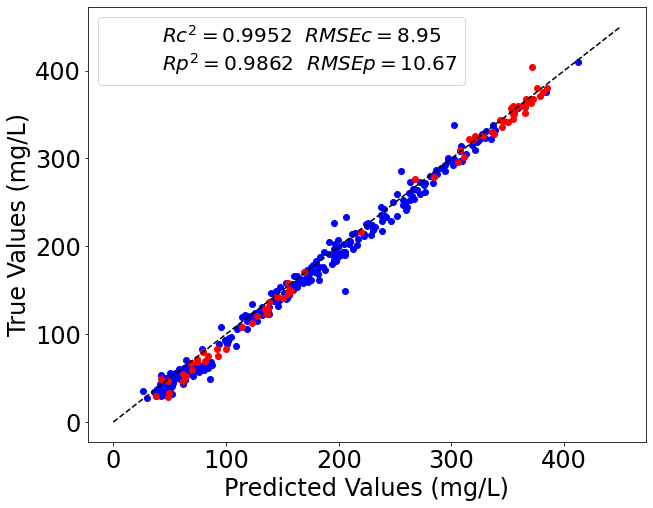

In [112]:
Cal_data = pd.read_excel('Cal-data.xlsx')
cal_features = Cal_data.iloc[:,:14]
cal_lables = Cal_data.iloc[:,14]


Test_data = pd.read_excel('Test-data.xlsx')
test_features = Test_data.iloc[:,:14]
test_lables = Test_data.iloc[:,14]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(cal_features)
cal_features=scaler.transform(cal_features)
test_features=scaler.transform(test_features)

cal_features_tensor = torch.tensor(cal_features, dtype=torch.float32).unsqueeze(1)
cal_lables_tensor = torch.tensor(cal_lables.values, dtype=torch.float32).unsqueeze(1)

test_features_tensor = torch.tensor(test_features, dtype=torch.float32).unsqueeze(1)
test_lables_tensor = torch.tensor(test_lables.values, dtype=torch.float32).unsqueeze(1)


import matplotlib.pyplot as plt
import numpy as np

model.eval()  
with torch.no_grad():
    predictions_cal = model(cal_features_tensor)

with torch.no_grad():
    predictions_test = model(test_features_tensor)
    

predictions_np_cal = predictions_cal.detach().numpy().flatten()
true_values_np_cal = cal_lables_tensor.detach().numpy().flatten()

predictions_np_test = predictions_test.detach().numpy().flatten()
true_values_np_test = test_lables_tensor.detach().numpy().flatten()

y_true_mean_cal = np.mean(true_values_np_cal)
r2_cal = 1 - (np.sum((true_values_np_cal - predictions_np_cal) ** 2) / np.sum((true_values_np_cal - y_true_mean_cal) ** 2))

rmse_cal = np.sqrt(np.mean((true_values_np_cal - predictions_np_cal) ** 2))

y_true_mean_test = np.mean(true_values_np_test)
r2_test = 1 - (np.sum((true_values_np_test - predictions_np_test) ** 2) / np.sum((true_values_np_test - y_true_mean_test) ** 2))


rmse_test = np.sqrt(np.mean((true_values_np_test - predictions_np_test) ** 2))



plt.figure(figsize=(10, 8))
plt.scatter(predictions_np_cal, true_values_np_cal, color='blue')
plt.scatter(predictions_np_test, true_values_np_test, color='red')


plt.plot([0, 450], [0, 450], 'k--')


plt.xlabel('Predicted Values (mg/L)',fontsize=24)
plt.ylabel('True Values (mg/L)',fontsize=24)
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$Rc^2={:.4f}$' + '  ' + r'$RMSEc={:.2f}$'+ '\n' + r'$Rp^2={:.4f}$'+ '  ' + r'$ RMSEp={:.2f}$').format(r2_test,rmse_test,r2_cal,rmse_cal)], 
           loc='upper left',fontsize=20)
plt.savefig('1DCNN-zscore.svg')

plt.show()

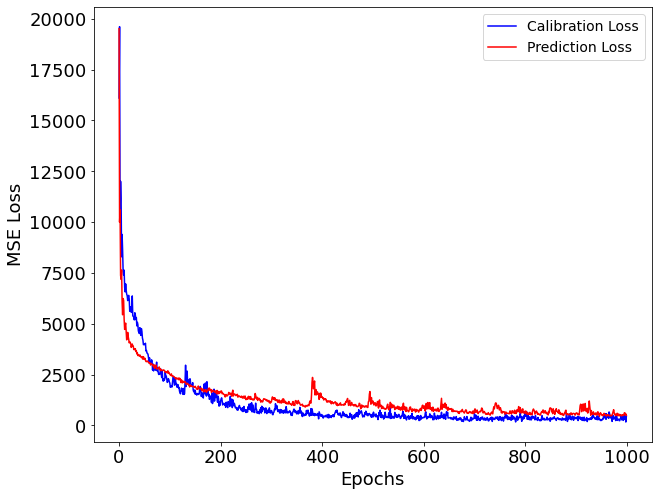

In [233]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(test_history, label='Calibration Loss',color='blue')
plt.plot(cal_history, label='Prediction Loss',color='red')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('MSE Loss',fontsize=18)
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
plt.savefig('1DCNN-minmax-trainloss.svg')
plt.show()

In [60]:
torch.save(model.state_dict(), 'model_1DCNN-minmax.pth')

#model.load_state_dict(torch.load('model_1DCNN-minmax.pth'))

## 在线验证

In [13]:
Cal_data = pd.read_excel('data-cdm.xlsx')
cal_features = Cal_data.iloc[:,:14]
cal_lables = Cal_data.iloc[:,14]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(cal_features)
cal_features=scaler.transform(cal_features)

cal_features_tensor = torch.tensor(cal_features, dtype=torch.float32).unsqueeze(1)
cal_lables_tensor = torch.tensor(cal_lables.values, dtype=torch.float32).unsqueeze(1)

import matplotlib.pyplot as plt
import numpy as np

model.eval() 
with torch.no_grad():
    predictions_cal = model(cal_features_tensor)



predictions_np_cal = predictions_cal.detach().numpy().flatten()
true_values_np_cal = cal_lables_tensor.detach().numpy().flatten()
y_true_mean_cal = np.mean(true_values_np_cal)
r2_cal = 1 - (np.sum((true_values_np_cal - predictions_np_cal) ** 2) / np.sum((true_values_np_cal - y_true_mean_cal) ** 2))


rmse_cal = np.sqrt(np.mean((true_values_np_cal - predictions_np_cal) ** 2))

print(predictions_cal)
print(r2_cal)
print(rmse_cal)

tensor([[ 259.9487],
        [ 352.1628],
        [ 430.4606],
        [ -17.9760],
        [1367.8263],
        [1141.8414]])
-144.51646423339844
660.95734


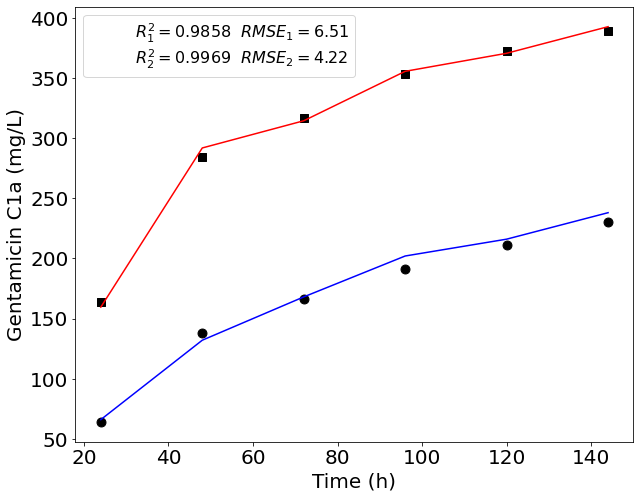

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

df_gm = pd.read_excel('data-flask.xlsx', sheet_name=0)  

time_series = df_gm['Time']  
y_ture = df_gm['Ture values']
y_predict = df_gm['Prediction values']

y_ture1 = df_gm['Ture values1']
y_predict1 = df_gm['Prediction values1']

y_true_mean_cal = np.mean(y_ture)
r2_cal = 1 - (np.sum((y_ture - y_predict) ** 2) / np.sum((y_ture - y_true_mean_cal) ** 2))
rmse_cal = np.sqrt(np.mean((y_ture - y_predict) ** 2))

y_true_mean_cal1 = np.mean(y_ture1)
r2_cal1 = 1 - (np.sum((y_ture1 - y_predict1) ** 2) / np.sum((y_ture1 - y_true_mean_cal1) ** 2))
rmse_cal1 = np.sqrt(np.mean((y_ture1 - y_predict1) ** 2))



plt.figure(figsize=(10, 8))
plt.plot(time_series, df_gm['Prediction values'], label='Prediction values', color='red')
plt.scatter(time_series, df_gm['Ture values'], marker='s', label='Ture values', color='black',s=80)
plt.plot(time_series, df_gm['Prediction values1'], label='Prediction values1', color='blue')
plt.scatter(time_series, df_gm['Ture values1'], label='Ture values1', color='black',s=80)


plt.xlabel('Time (h)',fontsize=20)
plt.ylabel('Gentamicin C1a (mg/L)',fontsize=20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$R_1^2={:.4f}$' + '  ' + r'$RMSE_1={:.2f}$'+ '\n' + r'$R_2^2={:.4f}$'+ '  ' + r'$ RMSE_2={:.2f}$').format(r2_cal1,rmse_cal1,r2_cal,rmse_cal)], 
           loc='best',fontsize=16)

plt.savefig('GM-flask.svg')  

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_gm = pd.read_excel('data-5L.xlsx', sheet_name=0)  

time_series = df_gm['Time']  
y_ture = df_gm['Ture values']
y_predict = df_gm['Prediction values']

y_ture1 = df_gm['Ture values1']
y_predict1 = df_gm['Prediction values1']

y_true_mean_cal = np.mean(y_ture)
r2_cal = 1 - (np.sum((y_ture - y_predict) ** 2) / np.sum((y_ture - y_true_mean_cal) ** 2))
rmse_cal = np.sqrt(np.mean((y_ture - y_predict) ** 2))

y_true_mean_cal1 = np.mean(y_ture1)
r2_cal1 = 1 - (np.sum((y_ture1 - y_predict1) ** 2) / np.sum((y_ture1 - y_true_mean_cal1) ** 2))
rmse_cal1 = np.sqrt(np.mean((y_ture1 - y_predict1) ** 2))



plt.figure(figsize=(10, 8))
plt.plot(time_series, df_gm['Prediction values'], label='Prediction values', color='red')
plt.scatter(time_series, df_gm['Ture values'], marker='s', label='Ture values', color='black',s=80)
plt.plot(time_series, df_gm['Prediction values1'], label='Prediction values1', color='blue')
plt.scatter(time_series, df_gm['Ture values1'], label='Ture values1', color='black',s=80)


plt.xlabel('Time (h)',fontsize=20)
plt.ylabel('Gentamicin C1a (mg/L)',fontsize=20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$R_1^2={:.4f}$' + '  ' + r'$RMSE_1={:.2f}$'+ '\n' + r'$R_2^2={:.4f}$'+ '  ' + r'$ RMSE_2={:.2f}$').format(r2_cal1,rmse_cal1,r2_cal,rmse_cal)], 
           loc='best',fontsize=16)

plt.savefig('GM-5L.svg')  

plt.show()